In [1]:
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
##Defining a function for coloring NaN and Non-NaN values
def color_style(value):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for value 
    greater than 5% NaNs, and green for safer values 
    and black for anything otherwise.
    """
    if value>0:
        color= 'red'
    elif value==0:
        color='green'
    else:
        color='black'
    return 'color: %s' % color

In [4]:
##Defining a function for missing value percentage dataframe: null_prcnt_df
def null_prcnt_df(data):
    df= data.copy()
    missing = pd.DataFrame(100*df.isnull().sum()/len(df.index))
    missing.rename(columns={0:'Null_Percentage'}, inplace=True)
    missing = pd.DataFrame(missing.Null_Percentage).sort_values(by='Null_Percentage',ascending=False).style.applymap(color_style)
    return missing

In [5]:
##Function to display content in 'bold' within print statement
from IPython.display import Markdown, display
def printbold(string):   
    return display(Markdown(string))

In [6]:
##Read the dataset
telecom_df = pd.read_csv('train.csv')
telecom_df.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7  ...  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  \
0   87.009  ...            0            0        NaN        NaN        NaN   
1  122.787  ...            0            0        NaN        1.0        NaN   
2  103.176  ...            0            0        NaN        NaN        NaN   
3  205.260  ...            0            0        NaN        NaN        NaN   
4  128.191  ...            1            0        1.0        1.0        1.0   

    aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  
0  1958         0.0         0.0         0.0                  0  
1   710         0.0         0.0         0.0                  0  
2   882         0.0         0.0         0.0                  0  
3   982         0.0         0.0         0.0                  0  
4   647         0.0         0.0         0.0                  0  

[5 rows x 172 columns]

In [7]:
##Creating a copy of the data incase it is required later
telecom_df_orig = telecom_df.copy()

In [8]:
##Check number of records and feature columns: 99999 records and 226 columns
telecom_df.shape

(69999, 172)

In [9]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [10]:
telecom_df.columns

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=172)

In [11]:
telecom_df.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   
25%               0.0     93.581000     86.714000     84.095000      7.410000   
50%               0.0    197.484000    191.588000    192.234000     34.110000   
75%               0.0    370.791000    365.369500    369.909000    119.390000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7  ...   sachet_3g_7   sachet_3g_8     fb_user_6  \
count  67312.000000  ...  69999.000000  69999.000000  17568.000000   
mean     133.894438  ...      0.081444      0.085487      0.916325   
std      311.277193  ...      0.634547      0.680035      0.276907   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        6.675000  ...      0.000000      0.000000      1.000000   
50%       32.280000  ...      0.000000      0.000000      1.000000   
75%      115.837500  ...      0.000000      0.000000      1.000000   
max     8157.780000  ...     33.000000     41.000000      1.000000   

          fb_user_7     fb_user_8           aon    aug_vbc_3g    jul_vbc_3g  \
count  17865.000000  18417.000000  69999.000000  69999.000000  69999.000000   
mean       0.909544      0.890319   1220.639709     68.108597     65.935830   
std        0.286842      0.312501    952.426321    269.328659    267.899034   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    468.000000      0.000000      0.000000   
50%        1.000000      1.000000    868.000000      0.000000      0.000000   
75%        1.000000      1.000000   1813.000000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

        jun_vbc_3g  churn_probability  
count  69999.00000       69999.000000  
mean      60.07674           0.101887  
std      257.22681           0.302502  
min        0.00000           0.000000  
25%        0.00000           0.000000  
50%        0.00000           0.000000  
75%        0.00000           0.000000  
max    11166.21000           1.000000  

[8 rows x 163 columns]

In [12]:
##Check null values in entire df
null_prcnt_df(telecom_df)

In [13]:
telecom_df['total_rech_data_6']

0        NaN
1        NaN
2        NaN
3        NaN
4        7.0
        ... 
69994    NaN
69995    NaN
69996    NaN
69997    1.0
69998    1.0
Name: total_rech_data_6, Length: 69999, dtype: float64

In [14]:
##Stripping off white_spaces from the column name(if any)
telecom_df = telecom_df.rename(columns= lambda x: x.strip(), inplace=False)

In [15]:
##Checking and dropping duplicated records(if any)
telecom_df = telecom_df.drop_duplicates()

In [16]:
telecom_df.shape

(69999, 172)

In [17]:
##List of Incorrect name columns (as data dictionary says RECH: Recharge)
last_day_rech_cols = list(telecom_df.columns[telecom_df.columns.str.contains('last_day_rch_amt')])
last_day_rech_cols

['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8']

In [18]:
##Correcting name of 'last_day_rch_amt_*' to 'last_day_rech_amt_*' columns (for months 6,7,and 8)
telecom_df = telecom_df.rename(columns= {'last_day_rch_amt_6':'last_day_rech_amt_6', 'last_day_rch_amt_7':'last_day_rech_amt_7',\
                                     'last_day_rch_amt_8':'last_day_rech_amt_8'})
correct_last_day_rech_amt_cols = list(telecom_df.columns[telecom_df.columns.str.contains('last_day')])
correct_last_day_rech_amt_cols

['last_day_rech_amt_6', 'last_day_rech_amt_7', 'last_day_rech_amt_8']

In [19]:
##Columns containing recharge amount 'rech_amt' or recharge data 'rech_data' details
rech_amt_data_cols = telecom_df.columns[telecom_df.columns.str.contains('rech_amt|rech_data', regex=True)]
rech_amt_data_cols

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'last_day_rech_amt_6', 'last_day_rech_amt_7', 'last_day_rech_amt_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8'],
      dtype='object')

> Observation: The above mentioned columns correspond to 'rech_amt' and 'rech_data' features across months 6, 7 and 8 respectively:

>(i) Total recharge amount (calling)

>(ii) Maximum recharge amount (calling)

>(iii) Last day recharge amount

>(iv) Last date of Recharging the data

>(v) Total recharge for data

>(vi) Maximum recharge for data

>(vii) Average recharge amount for data

In [20]:
##Check null values in above mentioned columns, if any(column wise: missing value percentage)
rech_amt_data_df = telecom_df[rech_amt_data_cols]
null_prcnt_df(rech_amt_data_df)

In [21]:
##Check stats of these columns in the dataframe
rech_amt_data_df.describe()

total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  \
count      69999.000000      69999.000000      69999.000000    69999.000000   
mean         328.139788        322.376363        323.846355      104.569265   
std          404.211068        411.070120        426.181405      121.407701   
min            0.000000          0.000000          0.000000        0.000000   
25%          110.000000        100.000000         90.000000       30.000000   
50%          229.000000        220.000000        225.000000      110.000000   
75%          438.000000        430.000000        436.000000      120.000000   
max        35190.000000      40335.000000      45320.000000     4010.000000   

       max_rech_amt_7  max_rech_amt_8  last_day_rech_amt_6  \
count    69999.000000    69999.000000         69999.000000   
mean       104.137573      107.540351            63.426949   
std        120.782543      124.396750            97.954876   
min          0.000000        0.000000             0.000000   
25%         30.000000       30.000000             0.000000   
50%        110.000000       98.000000            30.000000   
75%        128.000000      144.000000           110.000000   
max       3299.000000     4449.000000          4010.000000   

       last_day_rech_amt_7  last_day_rech_amt_8  total_rech_data_6  \
count         69999.000000         69999.000000       17568.000000   
mean             59.294218            62.489478           2.467612   
std              95.429492           101.996729           2.794610   
min               0.000000             0.000000           1.000000   
25%               0.000000             0.000000           1.000000   
50%              30.000000            30.000000           1.000000   
75%             110.000000           130.000000           3.000000   
max            3100.000000          4449.000000          61.000000   

       total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  \
count       17865.000000       18417.000000     17568.000000     17865.000000   
mean            2.679989           2.652441       126.500000       126.402071   
std             3.073472           3.101265       109.352573       109.459266   
min             1.000000           1.000000         1.000000         1.000000   
25%             1.000000           1.000000        25.000000        25.000000   
50%             2.000000           1.000000       145.000000       145.000000   
75%             3.000000           3.000000       177.000000       177.000000   
max            54.000000          60.000000      1555.000000      1555.000000   

       max_rech_data_8  av_rech_amt_data_6  av_rech_amt_data_7  \
count     18417.000000        17568.000000        17865.000000   
mean        125.374925          192.831096          201.455940   
std         109.648799          190.623115          198.346141   
min           1.000000            1.000000            1.000000   
25%          25.000000           82.000000           92.000000   
50%         145.000000          154.000000          154.000000   
75%         179.000000          252.000000          252.000000   
max        1555.000000         5920.000000         4365.000000   

       av_rech_amt_data_8  
count        18417.000000  
mean           196.815792  
std            192.280532  
min              1.000000  
25%             84.000000  
50%            154.000000  
75%            252.000000  
max           4076.000000

Observation: For columns like av_rech_amt_data_* and total_rech_data_* (months) the minimum value is 1. Hence, we can impute the missing values by 0. (Considering there were no recharges done by the customer).



In [22]:
##Imputation of 'av_rech_amt_data_* and total_rech_data_*' column NaNs with 0 (for all the months 6, 7, 8)

telecom_df['av_rech_amt_data_6']= telecom_df['av_rech_amt_data_6'].fillna(0)
telecom_df['av_rech_amt_data_7']= telecom_df['av_rech_amt_data_7'].fillna(0)
telecom_df['av_rech_amt_data_8']= telecom_df['av_rech_amt_data_8'].fillna(0)


telecom_df['total_rech_data_6']= telecom_df['total_rech_data_6'].fillna(0)
telecom_df['total_rech_data_7']= telecom_df['total_rech_data_7'].fillna(0)
telecom_df['total_rech_data_8']= telecom_df['total_rech_data_8'].fillna(0)


In [23]:


##Calculating total data recharge amt for all the months 6, 7, 8 .
telecom_df['total_rech_data_amt_6'] = (telecom_df['av_rech_amt_data_6'] * telecom_df['total_rech_data_6']) 
telecom_df['total_rech_data_amt_7'] = (telecom_df['av_rech_amt_data_7'] * telecom_df['total_rech_data_7']) 
telecom_df['total_rech_data_amt_8'] = (telecom_df['av_rech_amt_data_8'] * telecom_df['total_rech_data_8'])

EDA
1. Dealing with features with constant value (constant variance), dealing with datatypes and handling missing values for rest of the features, etc.

In [24]:
##Removing columns that show constant variance (i.e. all values are constant or 0)
def remove_single_val_uniq_col(df):
    df_newsingle = df.copy()
    
    uniq_svcol = df_newsingle.nunique() ==1
    list_uniq_svcol = list(uniq_svcol[uniq_svcol.values== True].index)
    df_newsingle.drop(list_uniq_svcol, axis=1, inplace=True)
    print('Columns that are dropped are:\n{0}'.format(list_uniq_svcol))
    print('\nNumber of columns dropped:\n{0}'.format(len(list_uniq_svcol)))
    return df_newsingle

telecom_df= remove_single_val_uniq_col(telecom_df)

Columns that are dropped are:
['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']

Number of columns dropped:
13


In [25]:
##Since this is not a time-series based analysis, we might also eliminate date columns as they won't be useful for our analysis
date_columns_list= list(telecom_df.columns[telecom_df.columns.str.contains('date')])
date_columns_list

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [26]:
##Dropping the date columns
telecom_df.drop(date_columns_list, axis=1, inplace=True)
telecom_df.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   0   31.277   87.009    7.527        48.58       124.38         1.29   
1   1    0.000  122.787   42.953         0.00         0.00         0.00   
2   2   60.806  103.176    0.000         0.53        15.93         0.00   
3   3  156.362  205.260  111.095         7.26        16.01         0.00   
4   4  240.708  128.191  101.565        21.28         4.83         6.13   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  ...  fb_user_7  fb_user_8   aon  \
0         32.24         96.68          2.33  ...        NaN        NaN  1958   
1          0.00         25.99         30.89  ...        1.0        NaN   710   
2         53.99         82.05          0.00  ...        NaN        NaN   882   
3         68.76         78.48         50.23  ...        NaN        NaN   982   
4         56.99         38.11          9.63  ...        1.0        1.0   647   

   aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  \
0         0.0         0.0         0.0                  0   
1         0.0         0.0         0.0                  0   
2         0.0         0.0         0.0                  0   
3         0.0         0.0         0.0                  0   
4         0.0         0.0         0.0                  0   

   total_rech_data_amt_6  total_rech_data_amt_7  total_rech_data_amt_8  
0                    0.0                    0.0                    0.0  
1                    0.0                  145.0                    0.0  
2                    0.0                    0.0                    0.0  
3                    0.0                    0.0                    0.0  
4                 1225.0                 1337.0                  852.0  

[5 rows x 156 columns]

In [27]:
telecom_df.shape

(69999, 156)

In [28]:
def df_categorical_cols_unique(data):
    df = data.copy()
    
    unique_count = []
    unique_val = []
    col_list = []
    data_type = []
    
    for col in df.columns:
        if len(df[col].unique()) < 20:  # Check for columns with fewer than 20 unique values
            col_list.append(col)
            data_type.append(df[col].dtype)
            unique_count.append(len(df[col].unique()))
            unique_val.append(df[col].unique().tolist())  # Convert to list to avoid issues with np.array
    
    unique_df = pd.DataFrame({
        'Features': col_list,
        'Data Type': data_type,
        'Unique Count': unique_count,
        'Unique Values': unique_val  # Keep this as a list
    })
    
    unique_df.set_index('Features', inplace=True)
    sorted_df = unique_df.sort_values(by='Unique Count', ascending=True)
    return sorted_df

# Example usage
printbold("**Checking for potential categorical datatype columns:**")  
df_categorical_cols_unique(data=telecom_df)


**Checking for potential categorical datatype columns:**

Data Type  Unique Count  \
Features                                    
churn_probability     int64             2   
night_pck_user_6    float64             3   
night_pck_user_7    float64             3   
night_pck_user_8    float64             3   
fb_user_6           float64             3   
fb_user_7           float64             3   
fb_user_8           float64             3   
monthly_2g_6          int64             5   
monthly_2g_7          int64             6   
monthly_2g_8          int64             6   
monthly_3g_6          int64            10   
monthly_3g_8          int64            12   
monthly_3g_7          int64            13   

                                                Unique Values  
Features                                                       
churn_probability                                      [0, 1]  
night_pck_user_6                              [nan, 0.0, 1.0]  
night_pck_user_7                              [nan, 0.0, 1.0]  
night_pck_user_8                              [nan, 0.0, 1.0]  
fb_user_6                                     [nan, 1.0, 0.0]  
fb_user_7                                     [nan, 1.0, 0.0]  
fb_user_8                                     [nan, 1.0, 0.0]  
monthly_2g_6                                  [0, 1, 2, 3, 4]  
monthly_2g_7                               [0, 1, 2, 4, 3, 5]  
monthly_2g_8                               [0, 1, 2, 4, 3, 5]  
monthly_3g_6                   [0, 1, 2, 4, 3, 5, 6, 8, 7, 9]  
monthly_3g_8           [0, 1, 2, 3, 4, 8, 5, 6, 9, 7, 16, 10]  
monthly_3g_7       [0, 1, 2, 3, 5, 4, 8, 6, 7, 16, 14, 9, 10]

In [29]:
telecom_df.describe(percentiles= [0,0.01,0.1,0.25,0.5,0.75,0.9,0.95,0.99,0.999])

id        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count  69999.000000  69999.000000  69999.000000  69999.000000  67231.000000   
mean   34999.000000    283.134365    278.185912    278.858826    133.153275   
std    20207.115084    334.213918    344.366927    351.924315    299.963093   
min        0.000000  -2258.709000  -1289.715000   -945.808000      0.000000   
0%         0.000000  -2258.709000  -1289.715000   -945.808000      0.000000   
1%       699.980000      0.000000      0.000000      0.000000      0.000000   
10%     6999.800000     32.248600     29.761200     18.210600      0.260000   
25%    17499.500000     93.581000     86.714000     84.095000      7.410000   
50%    34999.000000    197.484000    191.588000    192.234000     34.110000   
75%    52498.500000    370.791000    365.369500    369.909000    119.390000   
90%    62998.200000    619.993800    615.661400    614.994600    345.080000   
95%    66498.100000    832.022700    823.236700    828.464700    617.185000   
99%    69298.020000   1400.276640   1414.891380   1445.054800   1447.098000   
99.9%  69928.002000   2683.990142   2645.732588   2702.137226   3186.105400   
max    69998.000000  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  67312.000000  66296.000000  67231.000000  67312.000000  66296.000000   
mean     133.894438    132.978257    198.874771    197.153383    196.543577   
std      311.277193    311.896596    316.818355    322.482226    324.089234   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
0%         0.000000      0.000000      0.000000      0.000000      0.000000   
1%         0.000000      0.000000      0.000000      0.000000      0.000000   
10%        0.150000      0.000000      7.260000      6.431000      5.690000   
25%        6.675000      6.410000     34.860000     32.240000     31.575000   
50%       32.280000     32.100000     96.480000     91.885000     91.800000   
75%      115.837500    115.060000    232.990000    227.630000    229.345000   
90%      347.908000    343.695000    482.030000    482.071000    486.980000   
95%      628.437500    620.240000    735.985000    747.558000    738.017500   
99%     1478.540900   1472.480500   1546.471000   1545.104000   1522.474000   
99.9%   3234.329570   3254.837600   3223.180400   3211.228580   3189.322000   
max     8157.780000  10752.560000   8362.360000   7043.980000  14007.340000   

       ...     fb_user_7     fb_user_8           aon    aug_vbc_3g  \
count  ...  17865.000000  18417.000000  69999.000000  69999.000000   
mean   ...      0.909544      0.890319   1220.639709     68.108597   
std    ...      0.286842      0.312501    952.426321    269.328659   
min    ...      0.000000      0.000000    180.000000      0.000000   
0%     ...      0.000000      0.000000    180.000000      0.000000   
1%     ...      0.000000      0.000000    188.000000      0.000000   
10%    ...      1.000000      0.000000    286.000000      0.000000   
25%    ...      1.000000      1.000000    468.000000      0.000000   
50%    ...      1.000000      1.000000    868.000000      0.000000   
75%    ...      1.000000      1.000000   1813.000000      0.000000   
90%    ...      1.000000      1.000000   2792.000000    160.444000   
95%    ...      1.000000      1.000000   3108.000000    464.277000   
99%    ...      1.000000      1.000000   3651.000000   1226.659800   
99.9%  ...      1.000000      1.000000   3821.000000   2882.718780   
max    ...      1.000000      1.000000   4337.000000  12916.220000   

         jul_vbc_3g   jun_vbc_3g  churn_probability  total_rech_data_amt_6  \
count  69999.000000  69999.00000       69999.000000           69999.000000   
mean      65.935830     60.07674           0.101887             148.479217   
std      267.899034    257.22681           0.302502             749.012768   
min        0.000000      0.00000           0.000000   

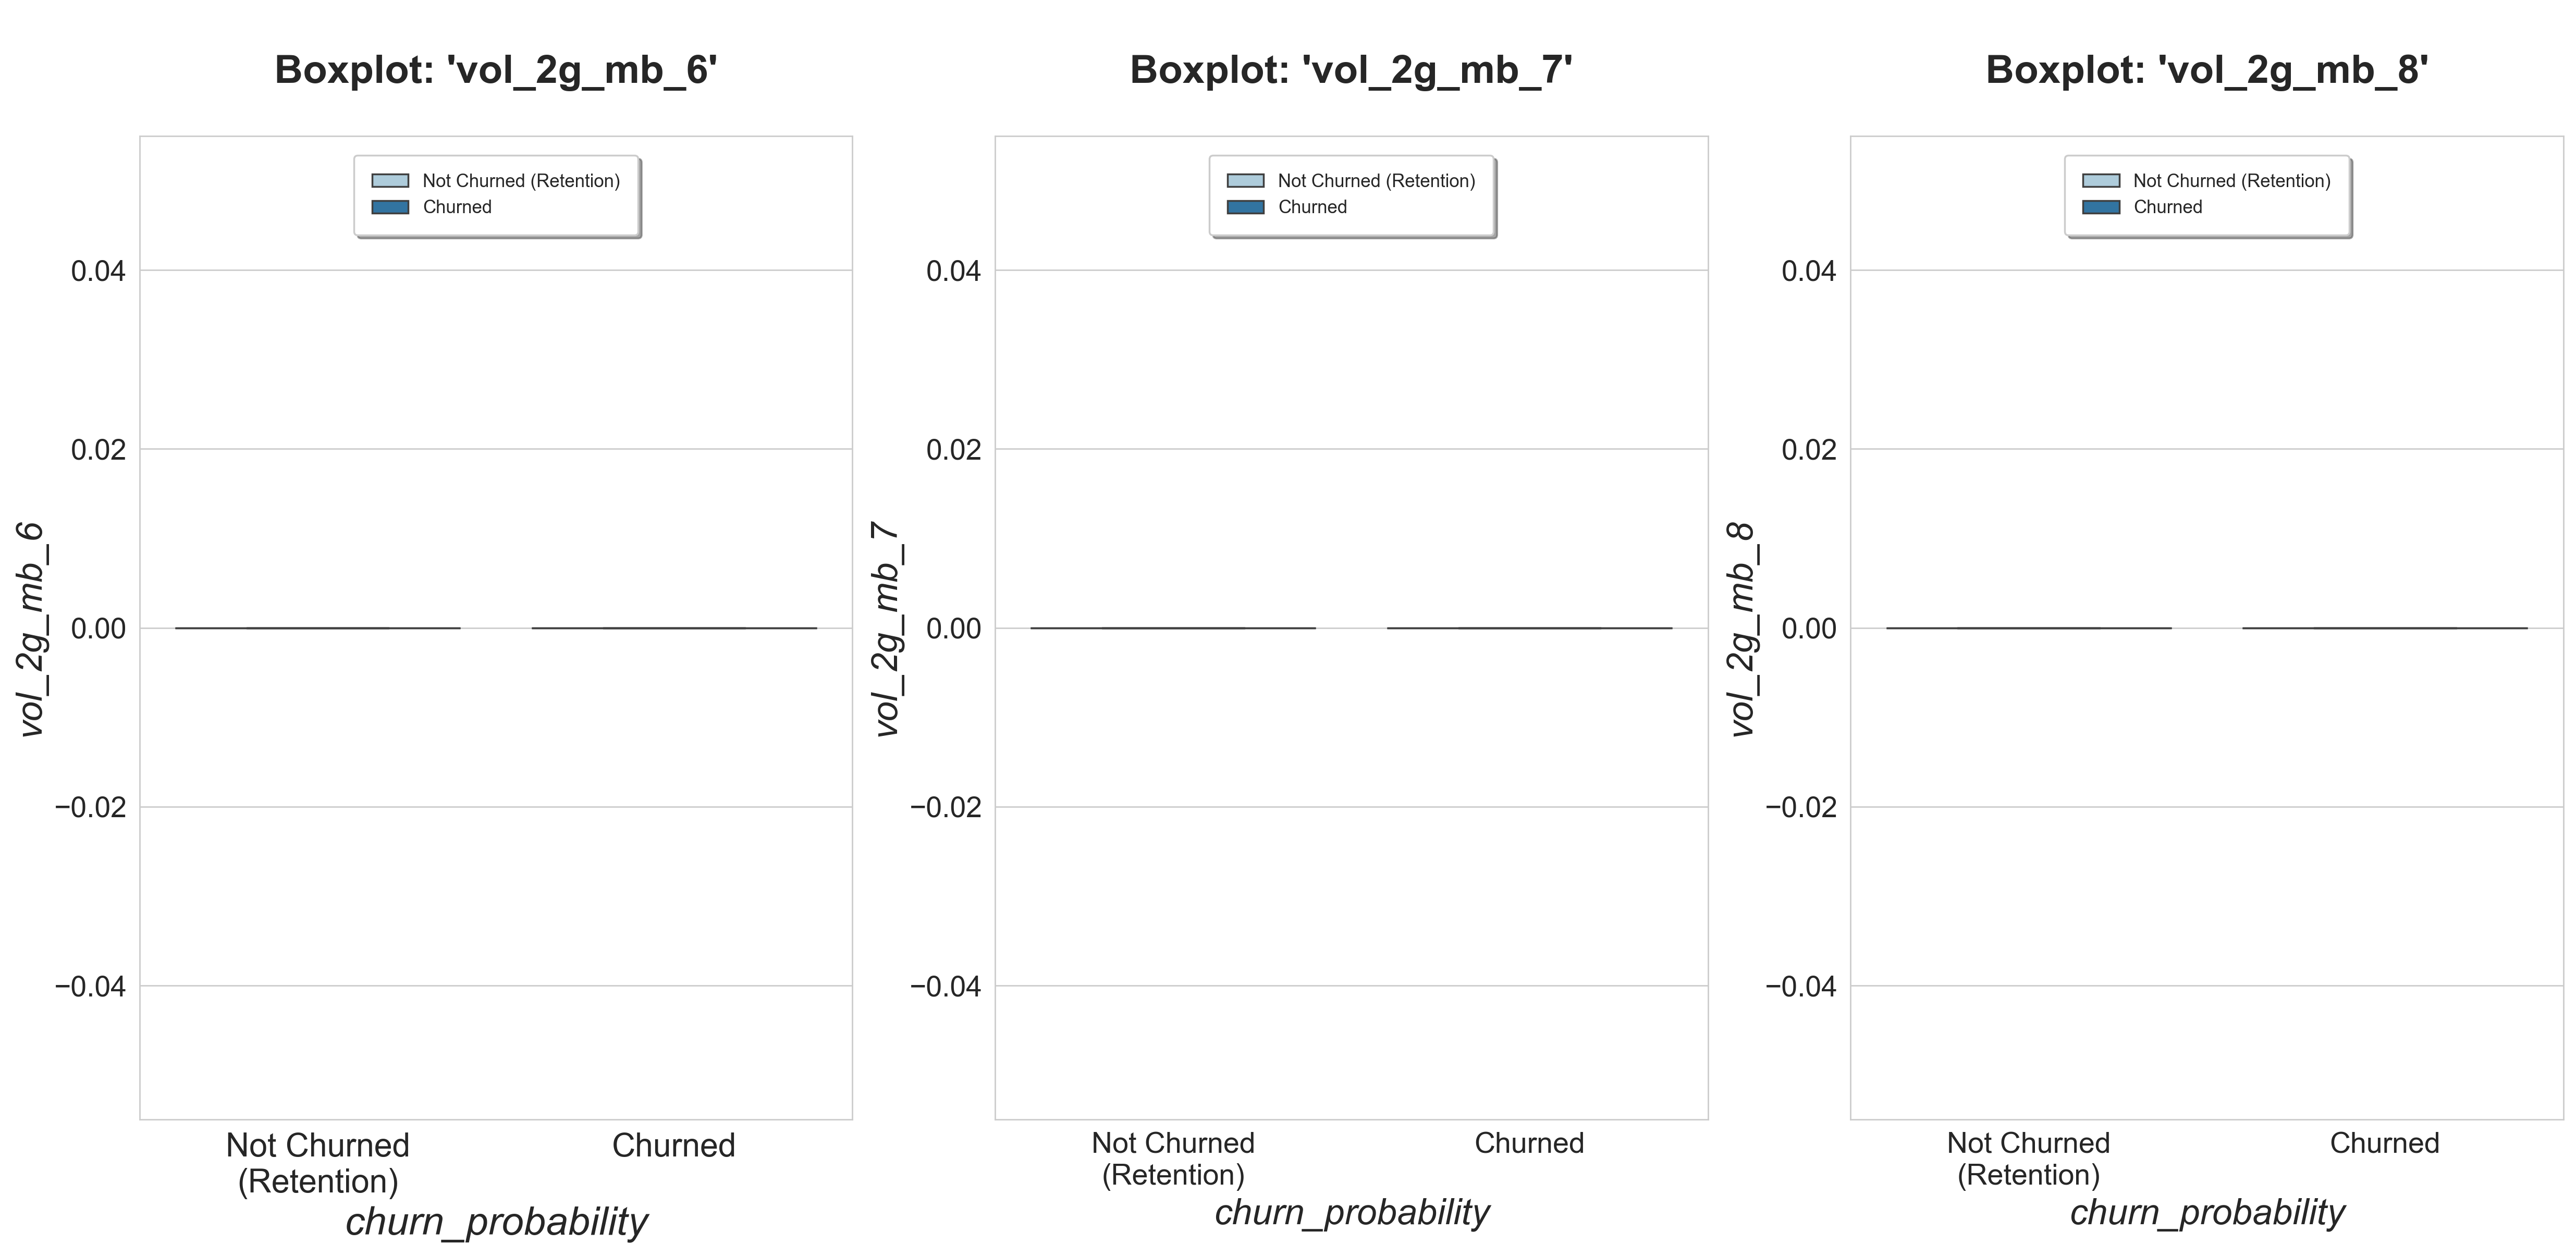

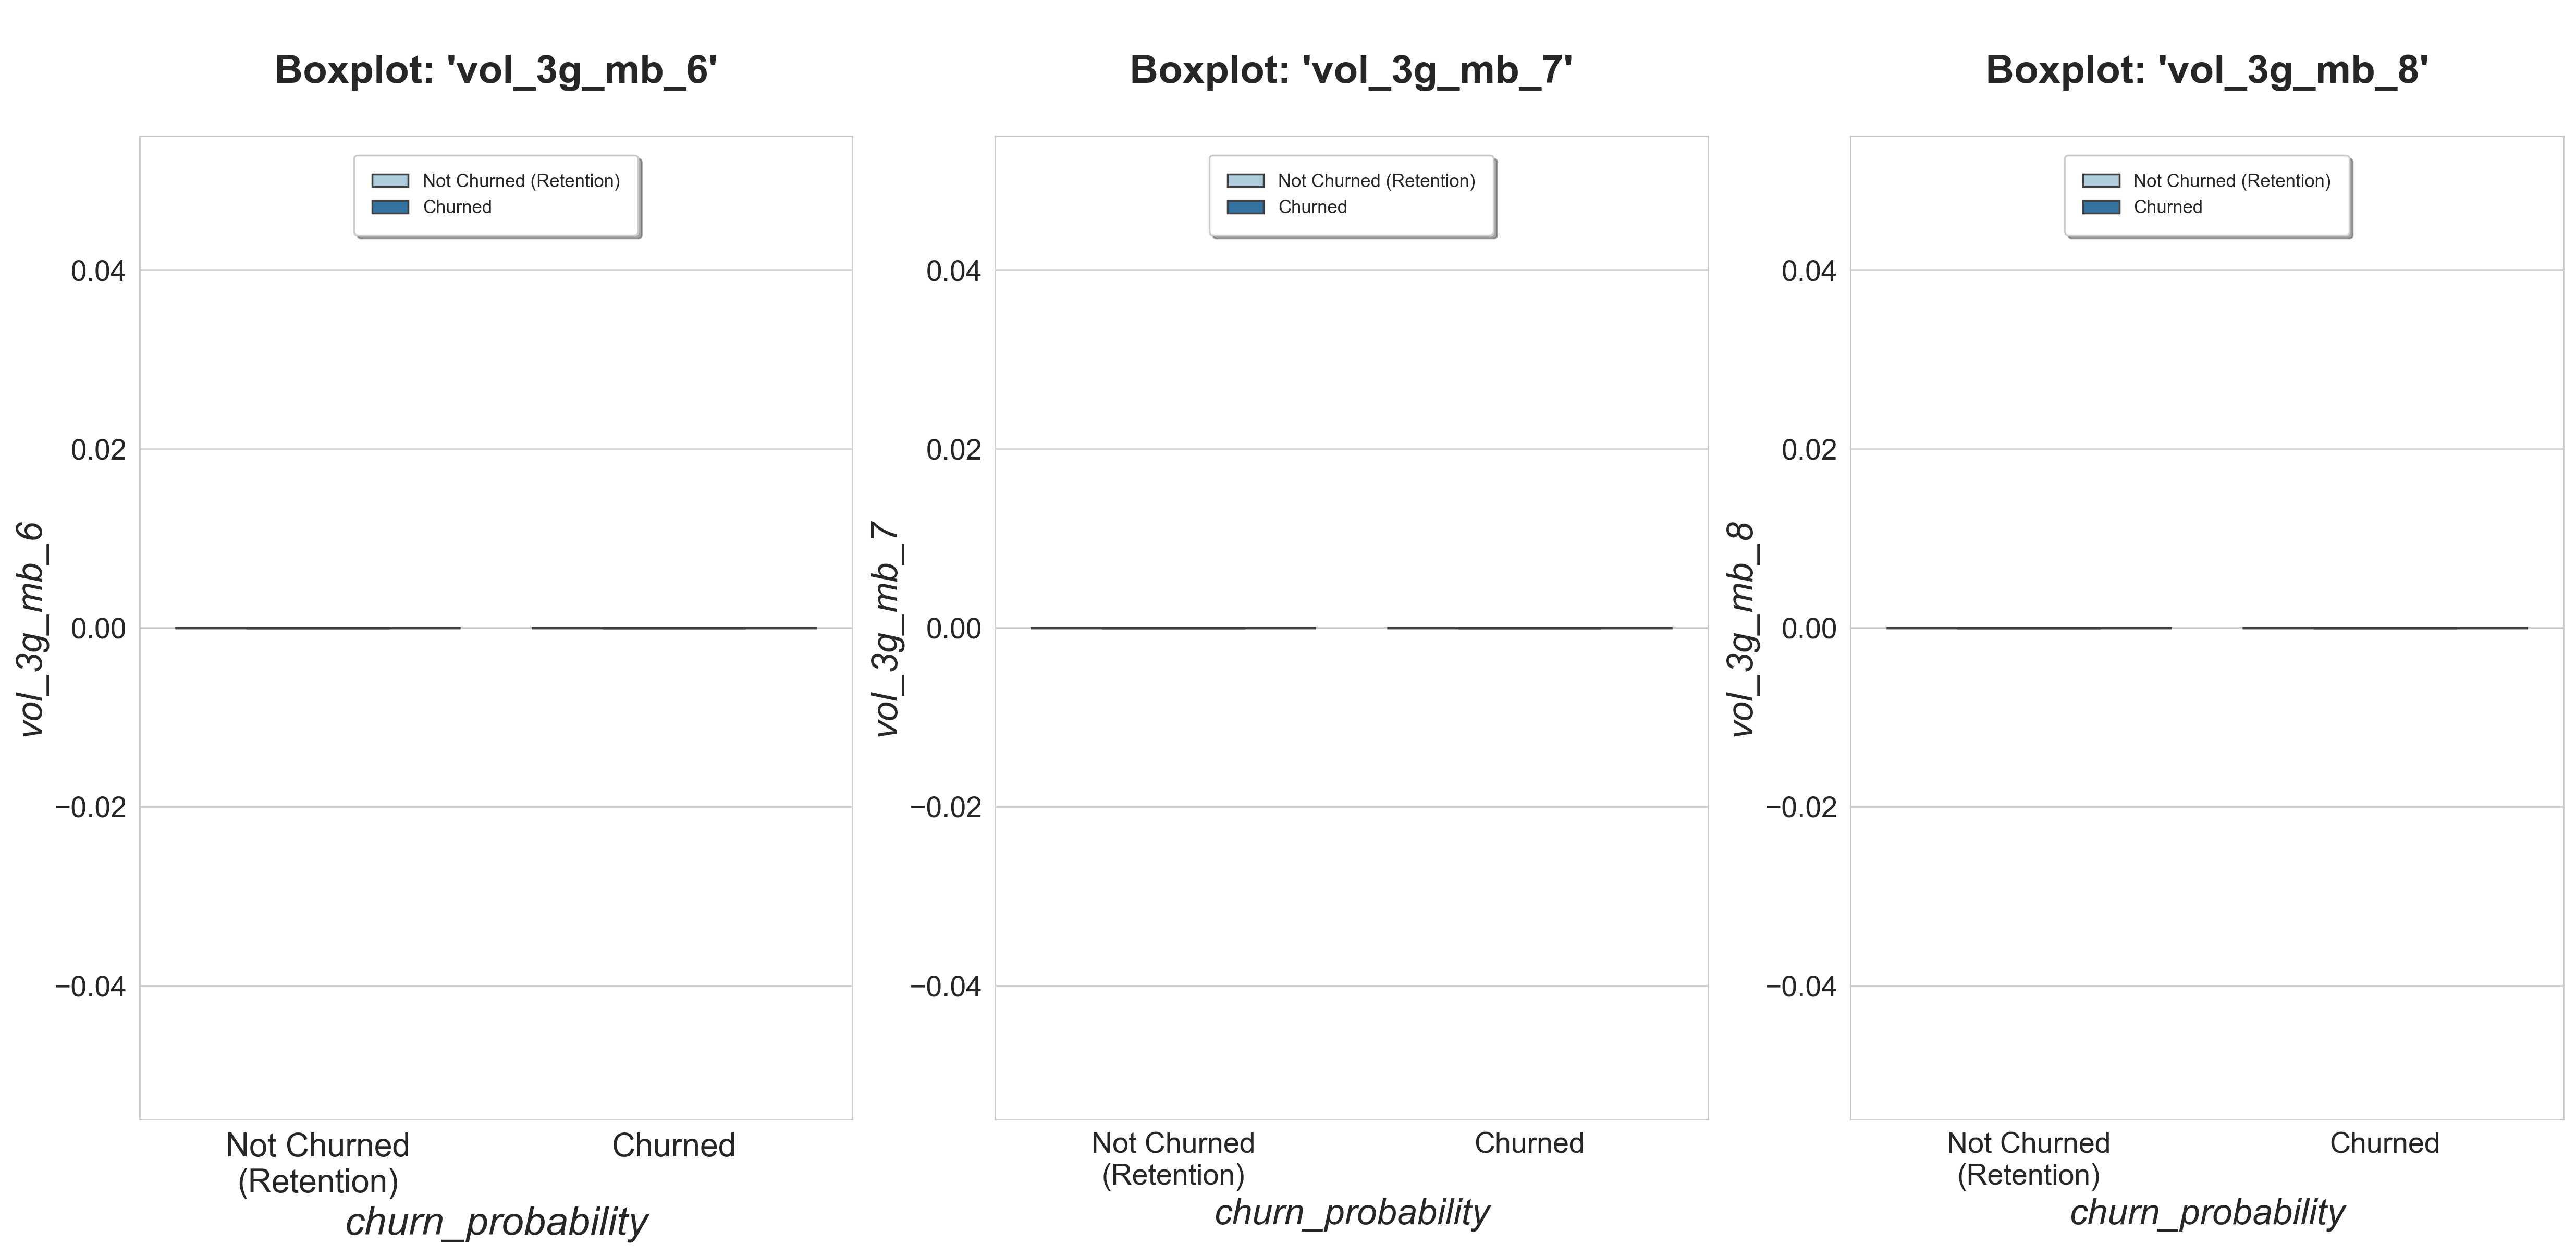

In [30]:
def plot_boxplots_6_7_8(feature):  
    plt.figure(figsize=(24,10), dpi=250)
    sns.set_style("whitegrid")
    
    # Copy the DataFrame
    df = telecom_df.copy()
    
    # Check if feature columns exist
    for month in ['6', '7', '8']:
        col_name = f'{feature}_{month}'
        if col_name not in df.columns:
            print(f"Warning: Column '{col_name}' does not exist in the DataFrame.")
            return
    
    # Check data types
    for col in [f'{feature}_6', f'{feature}_7', f'{feature}_8']:
        if not pd.api.types.is_numeric_dtype(df[col]):
            print(f"Warning: Column '{col}' is not numeric.")
            return
    
    # Check for NaN values
    for col in [f'{feature}_6', f'{feature}_7', f'{feature}_8']:
        if df[col].isnull().sum() > 0:
            print(f"Warning: Column '{col}' contains NaN values.")
    
    # Create plots
    plt.subplot(1,3,1)
    ax_11 = sns.boxplot(data=df, y=f'{feature}_6', x='churn_probability', hue='churn_probability', showfliers=False, palette='Paired')
    ax_11.set_xticklabels(labels=['Not Churned\n(Retention)', 'Churned'], fontsize=18)
    plt.title(f"\nBoxplot: '{feature}_6'\n", fontsize=22, fontweight='bold')
    plt.ylabel(f'{feature}_6', fontsize=20, fontstyle='italic')
    plt.xlabel("churn_probability", fontsize=22, fontstyle='italic')
    plt.yticks(fontsize=16)
    
    # Legend for subplot_131
    T1 = ax_11.legend(loc='center', bbox_to_anchor=(0.5, 0.94), fancybox=True, framealpha=1, shadow=True, borderpad=1)
    T1.get_texts()[0].set_text('Not Churned (Retention)')
    T1.get_texts()[1].set_text('Churned')
    
    plt.subplot(1,3,2)
    ax_22 = sns.boxplot(data=df, y=f'{feature}_7', x='churn_probability', hue='churn_probability', showfliers=False, palette='Paired')
    ax_22.set_xticklabels(labels=['Not Churned\n(Retention)', 'Churned'], fontsize=18)
    plt.title(f"\nBoxplot: '{feature}_7'\n", fontsize=22, fontweight='bold')
    plt.ylabel(f'{feature}_7', fontsize=20, fontstyle='italic')
    plt.xlabel("churn_probability", fontsize=20, fontstyle='italic')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    # Legend for subplot_132
    T2 = ax_22.legend(loc='center', bbox_to_anchor=(0.5, 0.94), fancybox=True, framealpha=1, shadow=True, borderpad=1)
    T2.get_texts()[0].set_text('Not Churned (Retention)')
    T2.get_texts()[1].set_text('Churned')
    
    plt.subplot(1,3,3)
    ax_33 = sns.boxplot(data=df, y=f'{feature}_8', x='churn_probability', hue='churn_probability', showfliers=False, palette='Paired')
    ax_33.set_xticklabels(labels=['Not Churned\n(Retention)', 'Churned'], fontsize=18)
    plt.title(f"\nBoxplot: '{feature}_8'\n", fontsize=22, fontweight='bold')
    plt.ylabel(f'{feature}_8', fontsize=20, fontstyle='italic')
    plt.xlabel("churn_probability", fontsize=20, fontstyle='italic')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    # Legend for subplot_133
    T3 = ax_33.legend(loc='center', bbox_to_anchor=(0.5, 0.94), fancybox=True, framealpha=1, shadow=True, borderpad=1)
    T3.get_texts()[0].set_text('Not Churned (Retention)')
    T3.get_texts()[1].set_text('Churned')
    
    plt.show()

# Plotting volume of 2G data usage features:
plot_boxplots_6_7_8('vol_2g_mb')

# Plotting volume of 3G data usage features:
plot_boxplots_6_7_8('vol_3g_mb')


In [31]:
rech_amt_cols = telecom_df.columns[telecom_df.columns.str.contains('rech_amt|rech_data_amt')]  ##For 6, 7 and 8 months
rech_amt_cols

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'last_day_rech_amt_6', 'last_day_rech_amt_7', 'last_day_rech_amt_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'total_rech_data_amt_6', 'total_rech_data_amt_7',
       'total_rech_data_amt_8'],
      dtype='object')

In [32]:
##Recheck for null values for the above mentioned recharge amount (calling and dataplan) features

rech_amt_df = telecom_df[rech_amt_cols]
null_prcnt_df(rech_amt_df)

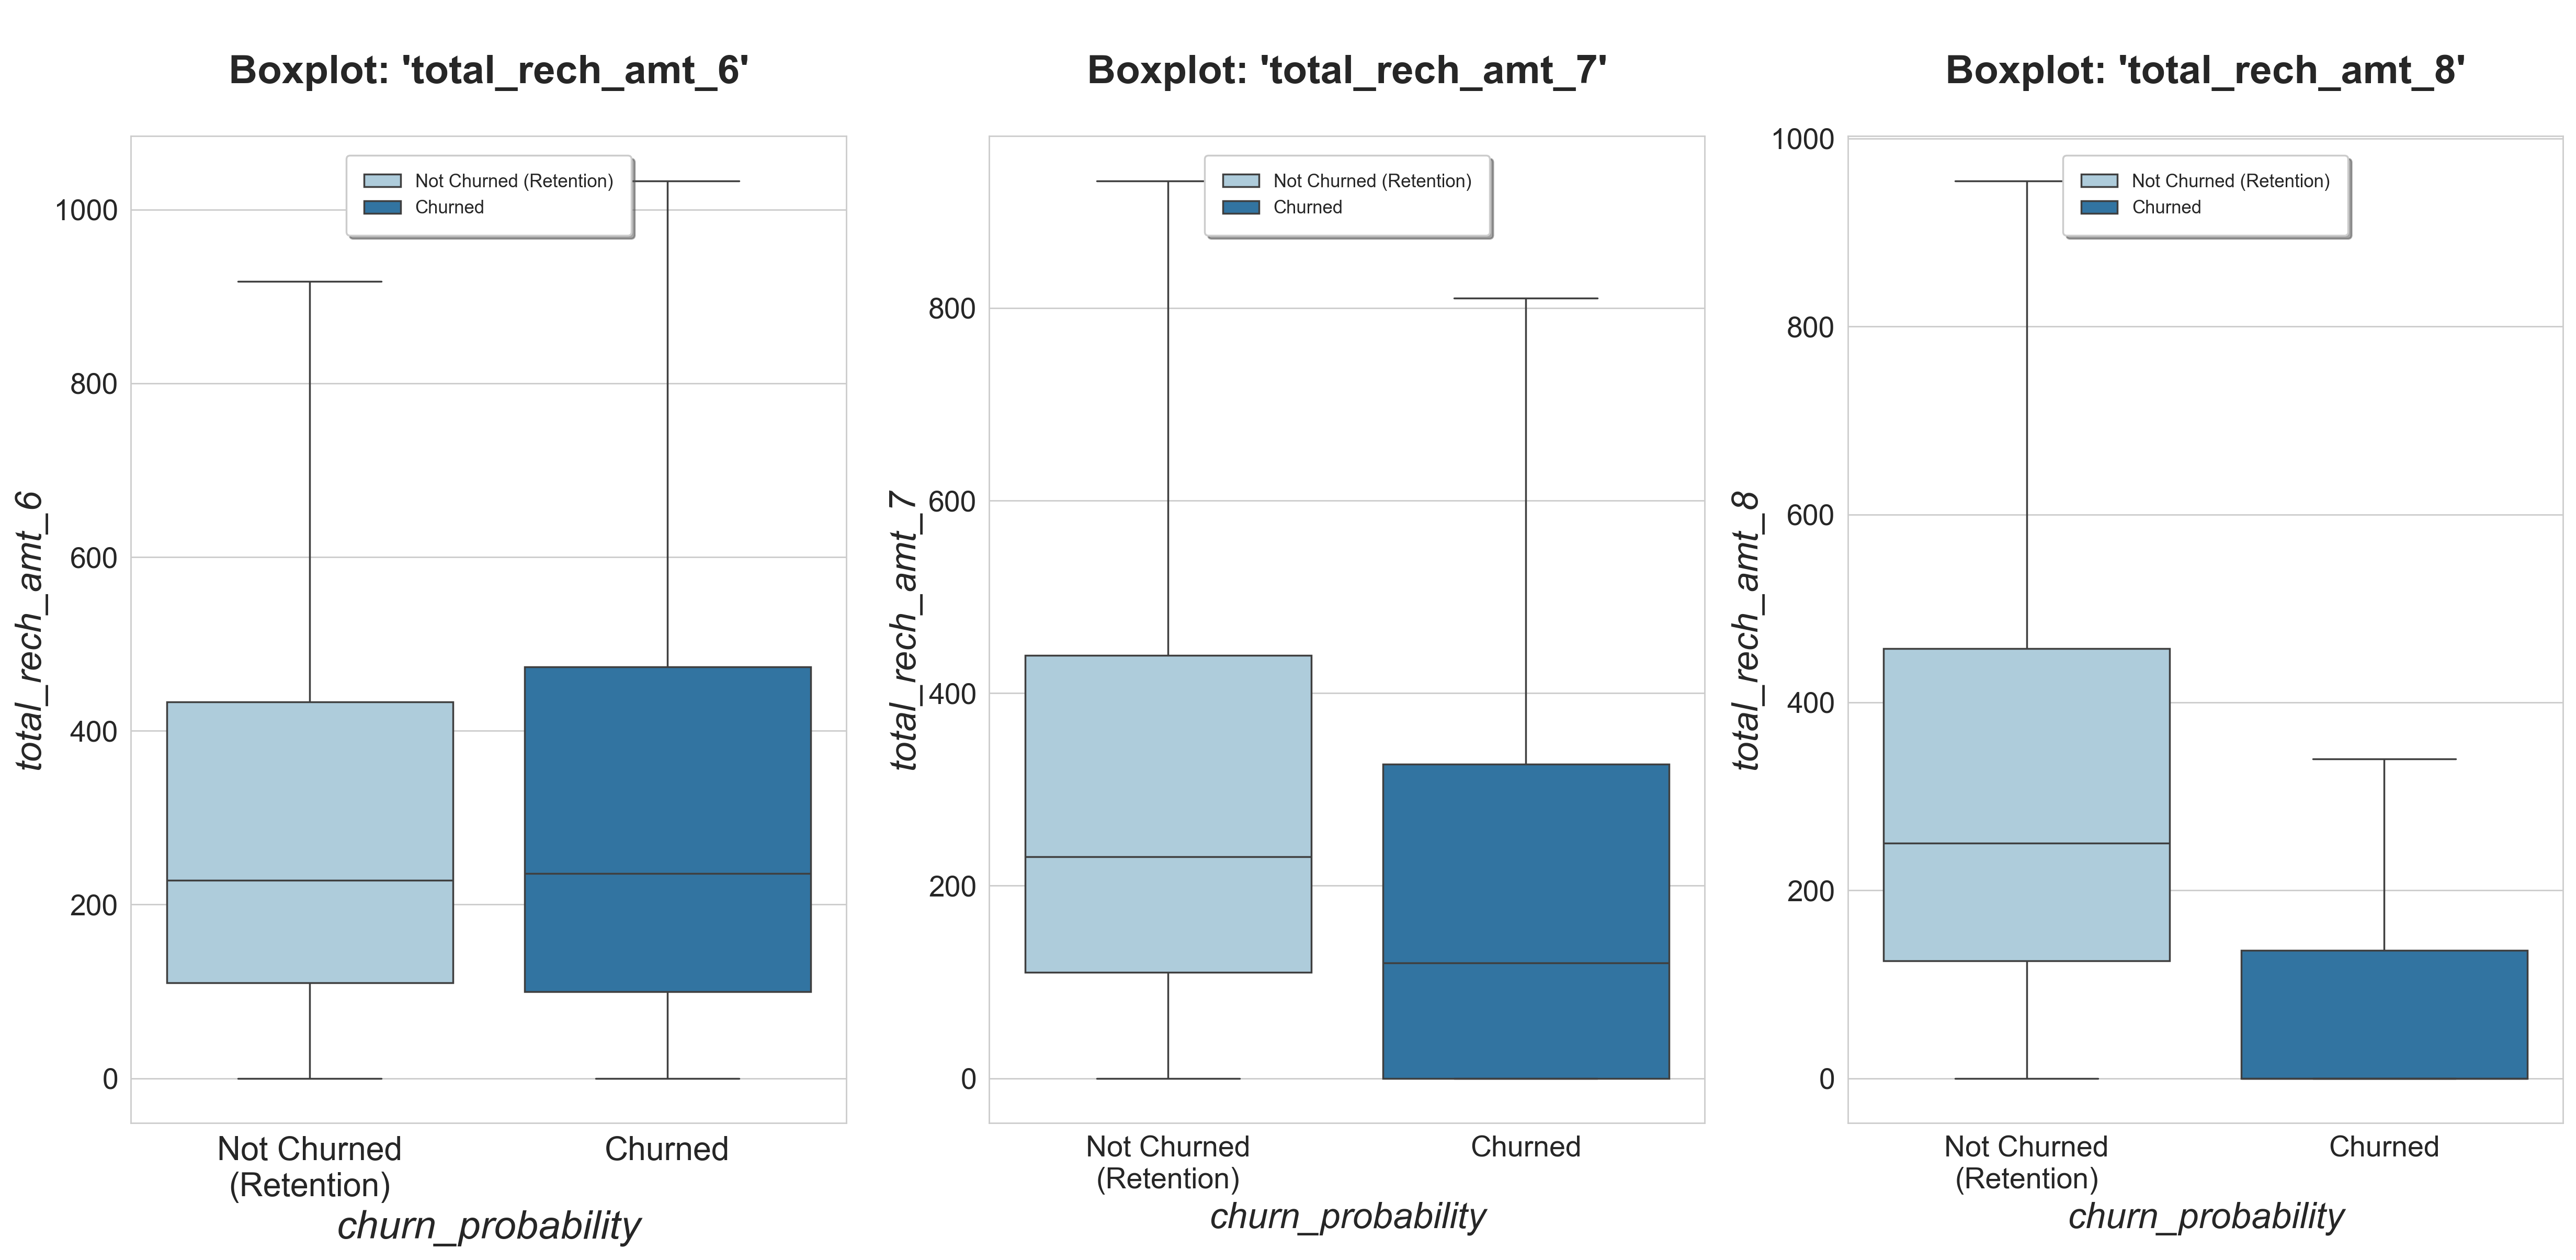

In [33]:
##Plotting boxplots for 'total_rech_amt' (calling plan recharges)
plot_boxplots_6_7_8('total_rech_amt')

In [34]:
##Let's check other 'rech_num' and 'max_rech_data' variables
other_rech = telecom_df.columns[telecom_df.columns.str.contains('rech_num|max_rech_data',regex=True)]
other_rech

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8'],
      dtype='object')

In [35]:
##Let's check for missing values in 'total_rech_num' and 'max_rech_data' features

other_rech_df = telecom_df[other_rech]
null_prcnt_df(other_rech_df)

In [36]:
telecom_df[['max_rech_data_6','max_rech_data_7','max_rech_data_8']].describe()

max_rech_data_6  max_rech_data_7  max_rech_data_8
count     17568.000000     17865.000000     18417.000000
mean        126.500000       126.402071       125.374925
std         109.352573       109.459266       109.648799
min           1.000000         1.000000         1.000000
25%          25.000000        25.000000        25.000000
50%         145.000000       145.000000       145.000000
75%         177.000000       177.000000       179.000000
max        1555.000000      1555.000000      1555.000000

In [37]:
##Imputing 'max_rech_data_*' columns with 0 (*columns: all 3 months - month 6, 7 and 8)
telecom_df[['max_rech_data_6','max_rech_data_7','max_rech_data_8']] = telecom_df[['max_rech_data_6','max_rech_data_7',\
                                                                                  'max_rech_data_8']].replace(np.nan, 0)

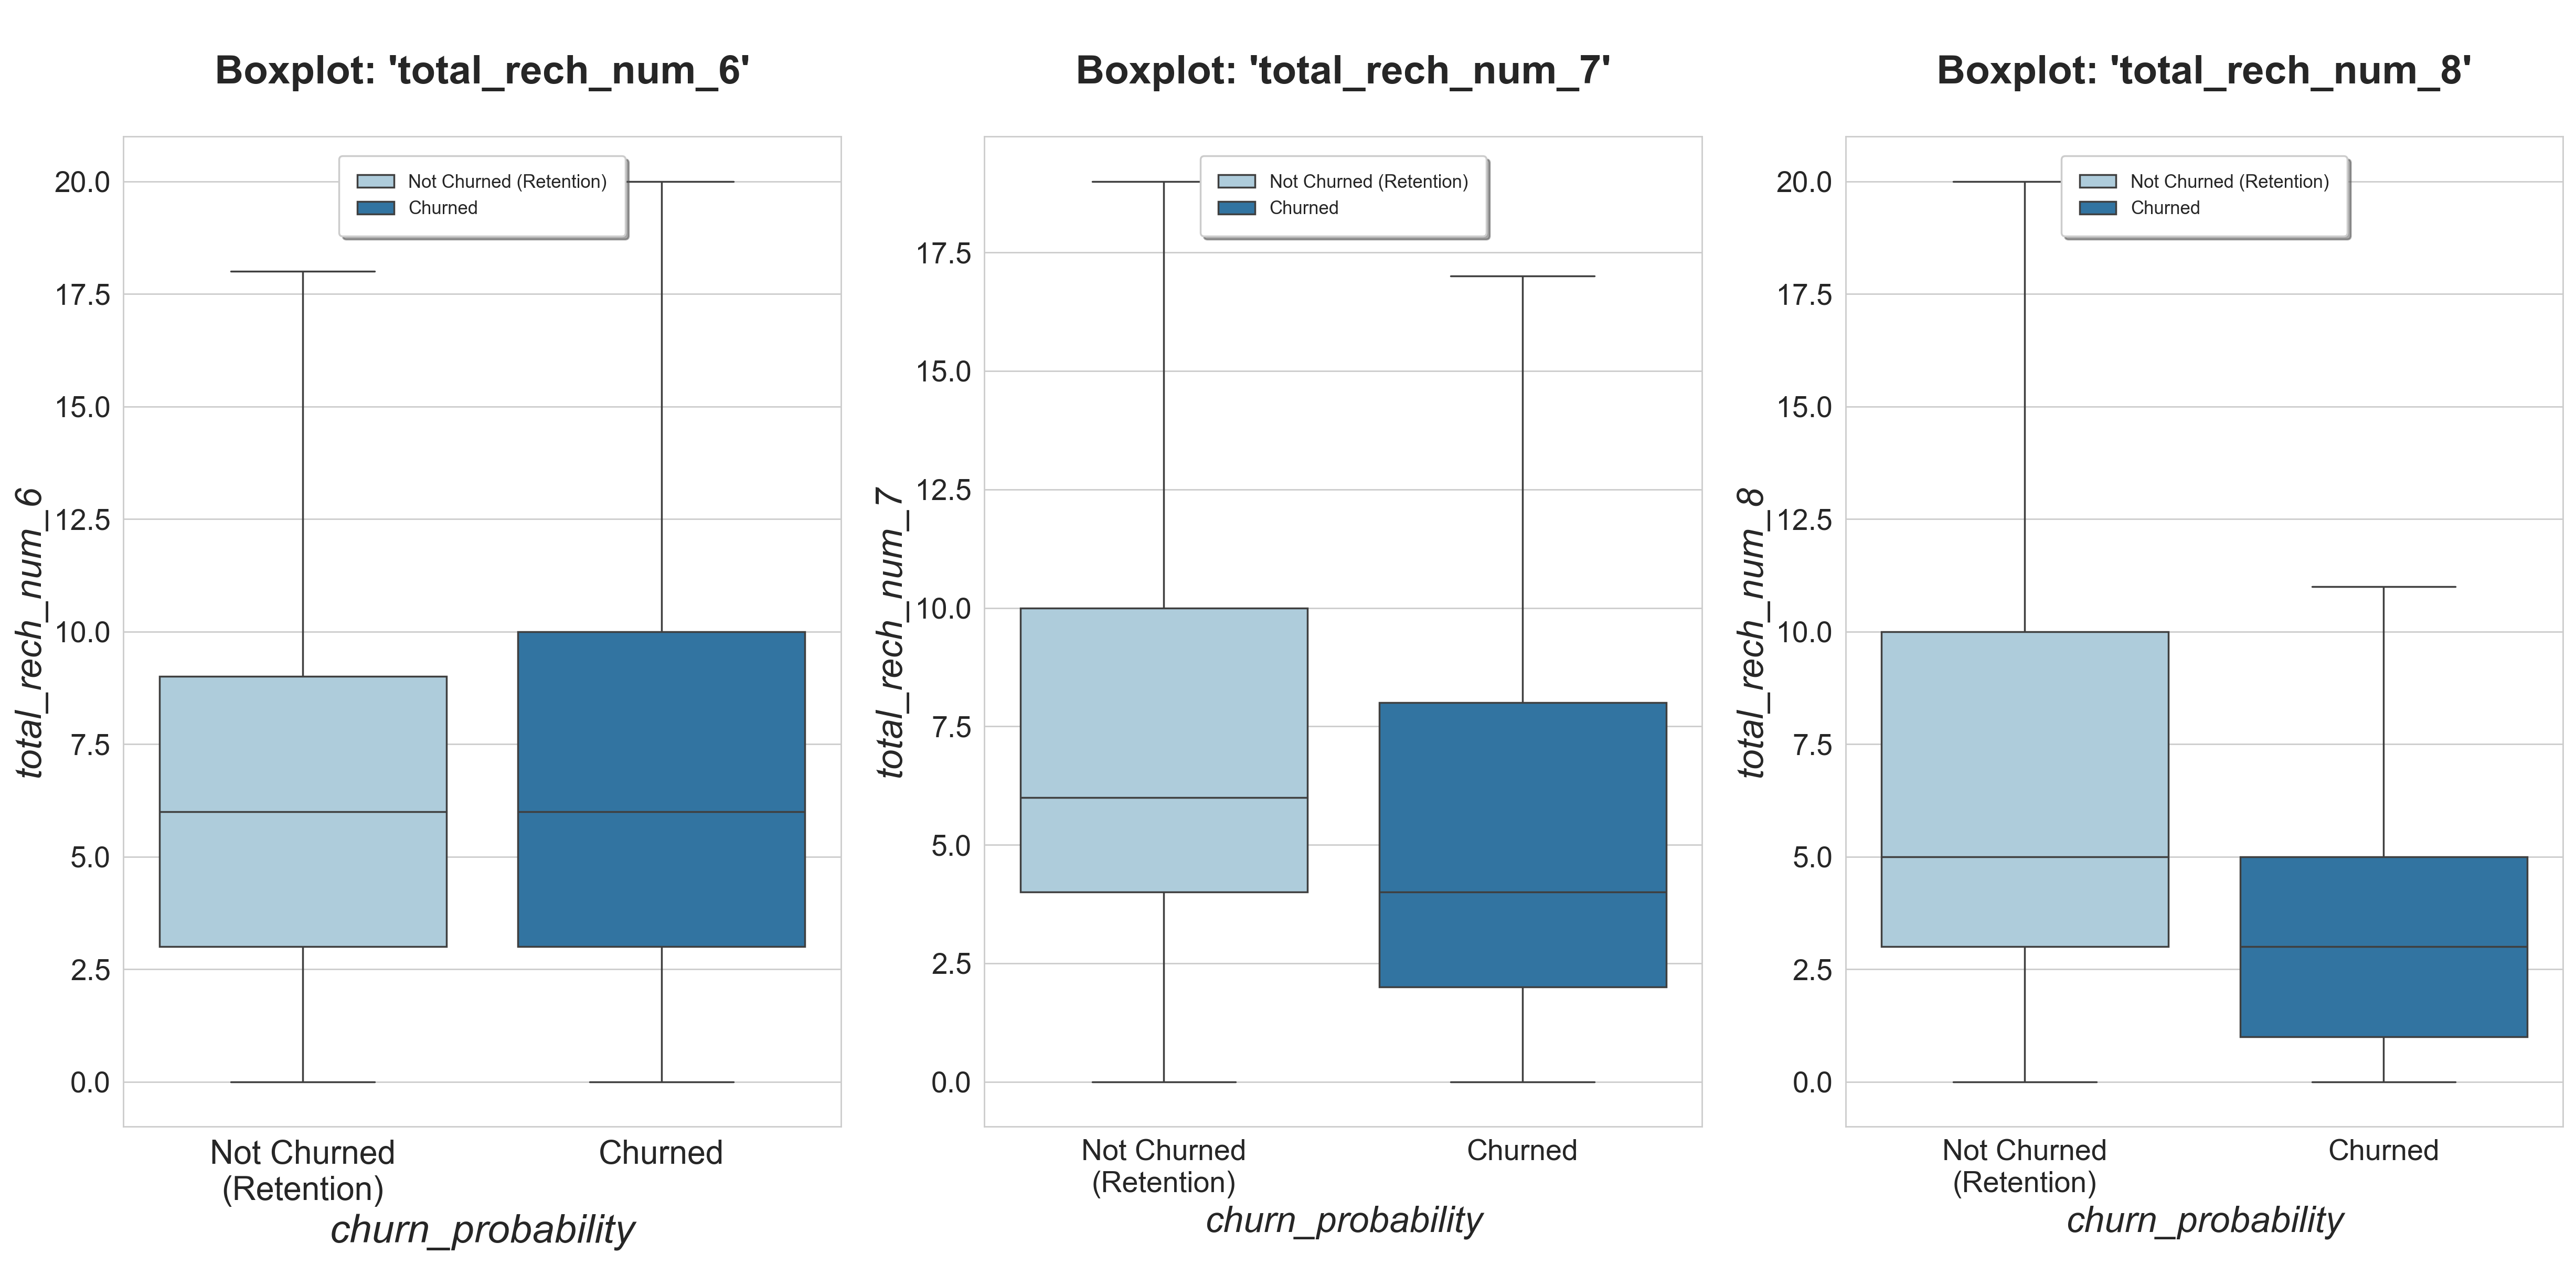

In [38]:
##Plotting boxplots for 'total_rech_num' 
plot_boxplots_6_7_8('total_rech_num')

In [39]:
##Recheck for missing values in 'recharge' plans for calling and data features
all_rech_vars = list(telecom_df.columns[telecom_df.columns.str.contains('rech_amt|rech_data_amt|rech_num|max_rech_data')])  ##Excluding 2g_3g
all_rech = telecom_df[all_rech_vars]
null_prcnt_df(all_rech)

In [40]:
usage_2g_3g_vars = list(telecom_df.columns[telecom_df.columns.str.contains('2g|3g',regex=True)])
usage_2g_3g_vars

['count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g']

In [41]:
##Check for missing values
usage_2g_3g = telecom_df[usage_2g_3g_vars]
null_prcnt_df(usage_2g_3g)

In [42]:
##Dropping 'arpu_2g', 'arpu_3g', 'count_rech_2g' and 'count_rech_3g' based features (revenue_based)
drop_vars = list(telecom_df.columns[telecom_df.columns.str.contains('arpu_2g|arpu_3g|count_rech_2g_|count_rech_3g')])
telecom_df.drop(drop_vars, axis=1, inplace=True)

In [44]:
##Since the range is very small and no trend can be seen, let's use barplot

##Defining a function for barplots for features belonging to months (6), (7) and (8) respectively with churn and no churn hue.
##(0: Not Churned (Retention), 1: Churned)

def plot_barplots_6_7_8(feature):  ##Note: Showfliers: False (Suppresses the effect of outliers on the graphs.)
    plt.figure(figsize=(24,10), dpi=250)
    sns.set_style("whitegrid")
    df = telecom_df.copy()
    
    plt.subplot(1,3,1)
    ax_11= sns.barplot(data=df, y=feature+"_6", x=df["churn_probability"], hue="churn_probability", palette=("Paired"))
    ax_11.set_xticklabels(labels=['Not Churned\n(Retention)','Churned'], fontsize=18)
    plt.title(f"\nBarplot: '{feature}_6'\n", fontsize=22, fontweight='bold')
    plt.ylabel(feature+"_6", fontsize=20, fontstyle='italic')
    plt.xlabel("churn", fontsize=22, fontstyle='italic')
    plt.yticks(fontsize=16)
    
    #legend subplot_131
    T1= ax_11.legend(loc='center', bbox_to_anchor=(0.5, 0.94), fancybox=True, framealpha=1, shadow=True, borderpad=1)
    T1.get_texts()[0].set_text('Not Churned (Retention)')
    T1.get_texts()[1].set_text('Churned')
    
    plt.subplot(1,3,2)
    ax_22= sns.barplot(data=df, y=feature+"_7", x=df["churn_probability"], hue="churn_probability", palette=("Paired"))
    ax_22.set_xticklabels(labels=['Not Churned\n(Retention)','Churned'], fontsize=18)
    plt.title(f"\nBarplot: '{feature}_7'\n", fontsize=22, fontweight='bold')
    plt.ylabel(feature+"_7", fontsize=20, fontstyle='italic')
    plt.xlabel("churn", fontsize=20, fontstyle='italic')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    #legend subplot_132
    T2= ax_22.legend(loc='center', bbox_to_anchor=(0.5, 0.94), fancybox=True, framealpha=1, shadow=True, borderpad=1)
    T2.get_texts()[0].set_text('Not Churned (Retention)')
    T2.get_texts()[1].set_text('Churned')

    plt.subplot(1,3,3)
    ax_33= sns.barplot(data=df, y=feature+"_8", x=df["churn_probability"], hue="churn_probability", palette=("Paired"))
    ax_33.set_xticklabels(labels=['Not Churned\n(Retention)','Churned'], fontsize=18)
    plt.title(f"\nBarplot: '{feature}_8'\n", fontsize=22, fontweight='bold')
    plt.ylabel(feature+"_8", fontsize=20, fontstyle='italic')
    plt.xlabel("churn", fontsize=20, fontstyle='italic')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    #legend subplot_133
    T3= ax_33.legend(loc='center', bbox_to_anchor=(0.5, 0.94), fancybox=True, framealpha=1, shadow=True, borderpad=1)
    T3.get_texts()[0].set_text('Not Churned (Retention)')
    T3.get_texts()[1].set_text('Churned')
    
    plt.show()

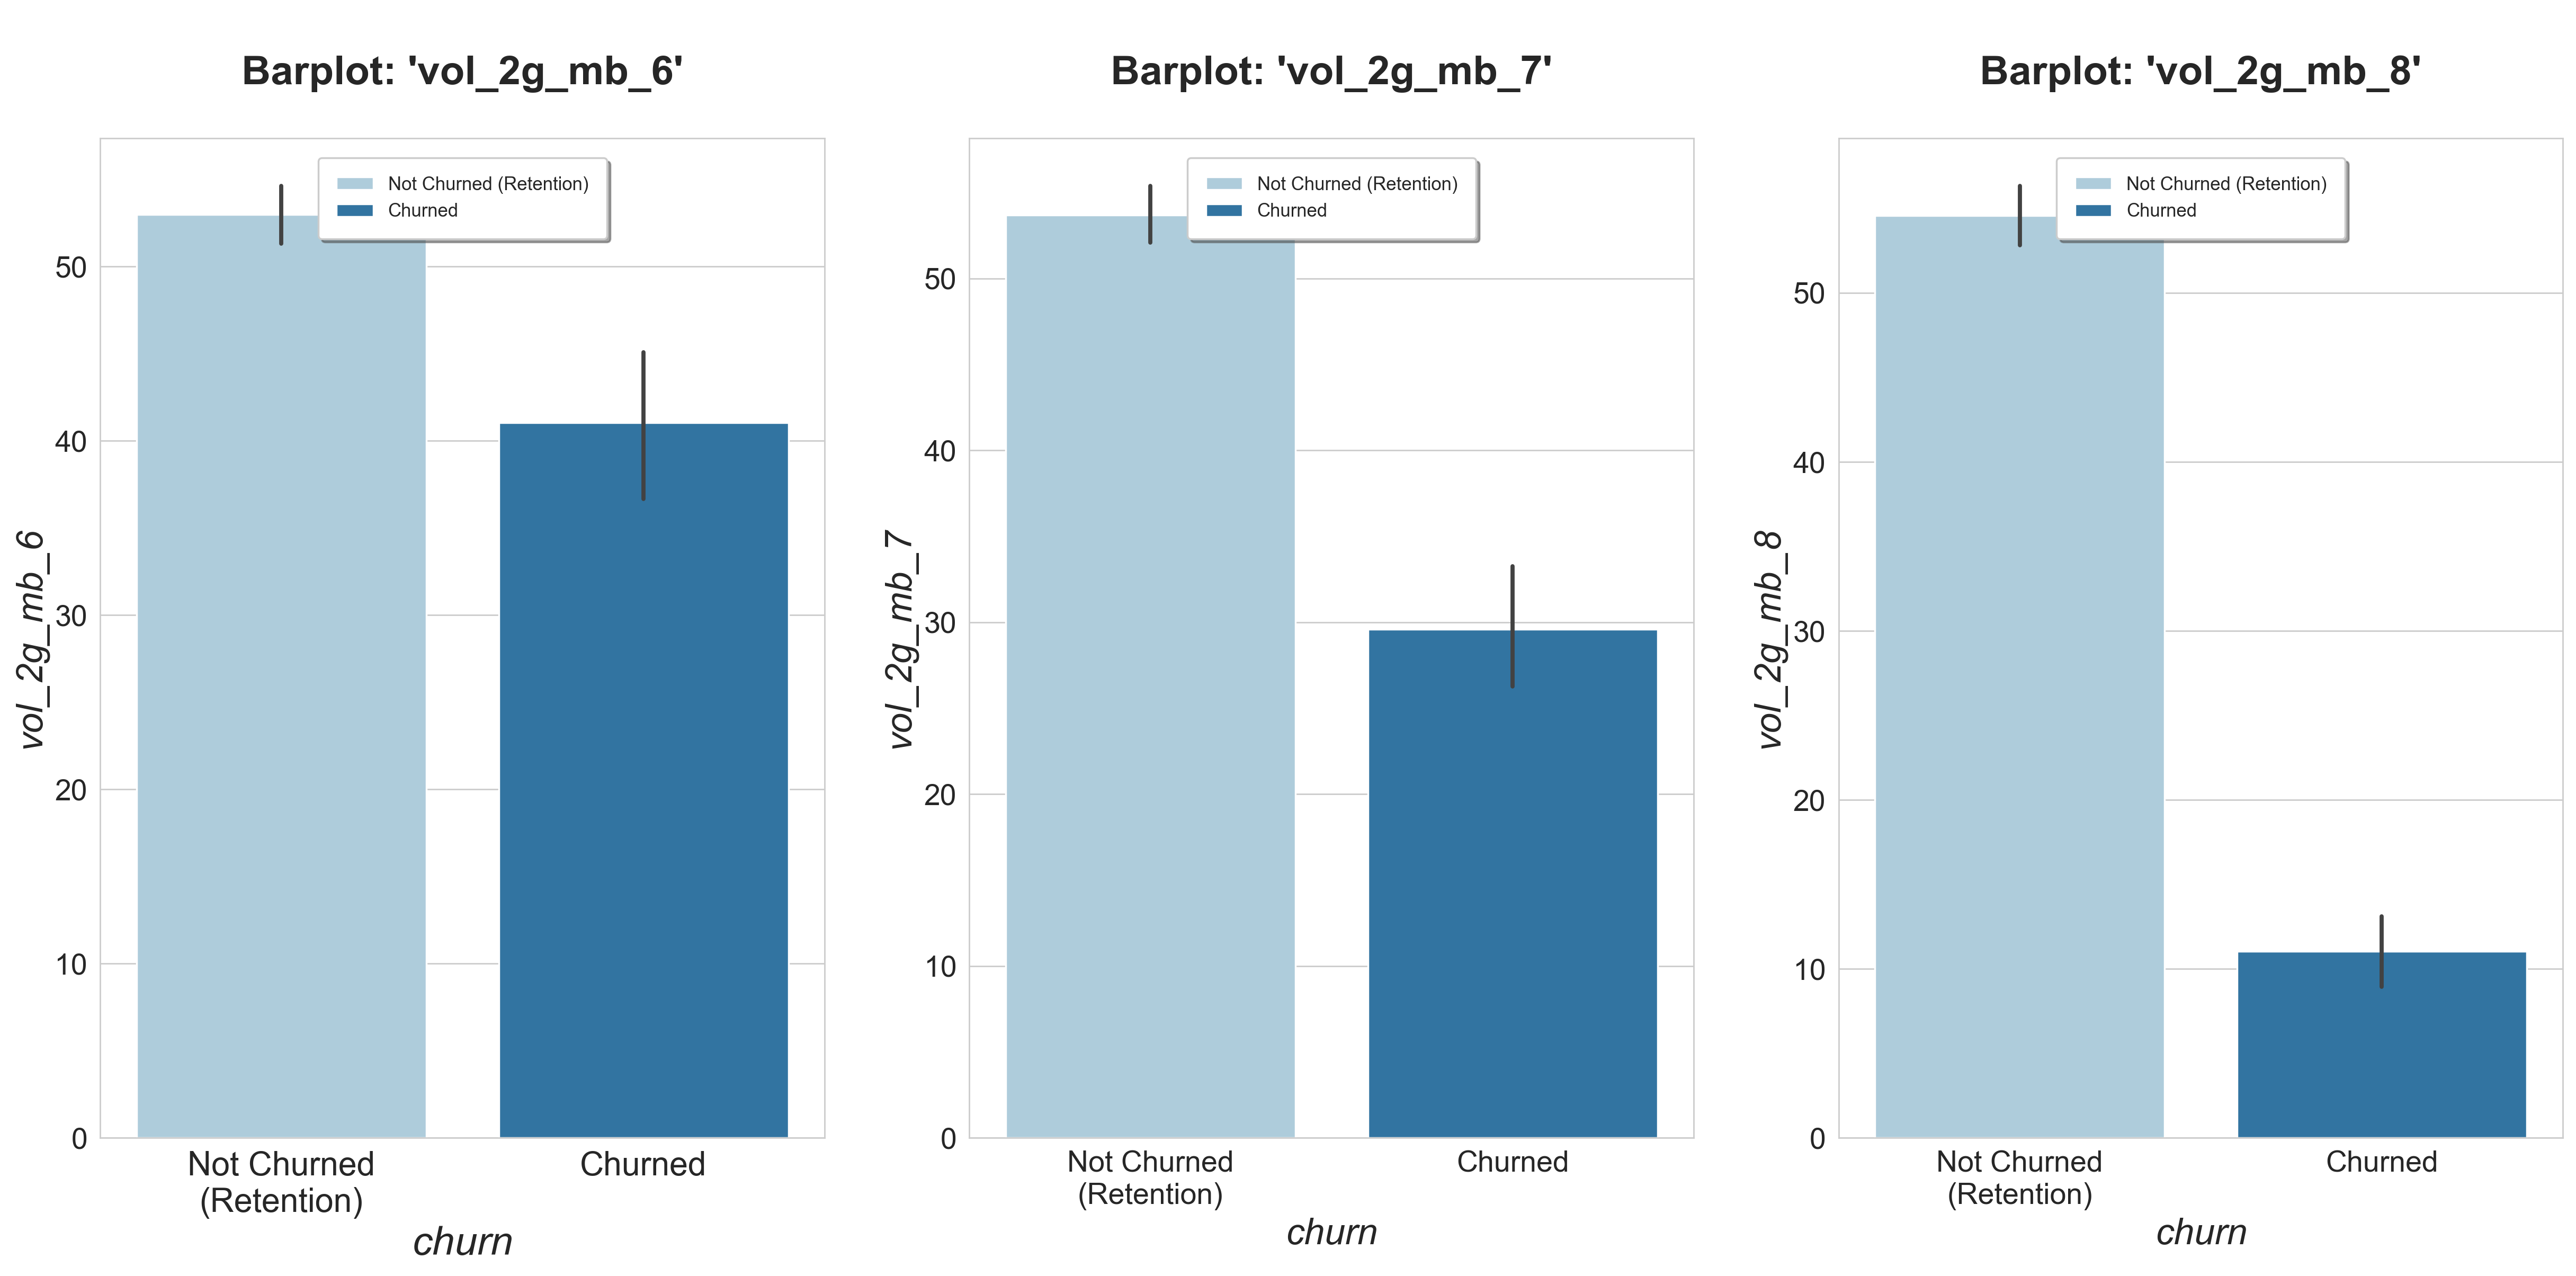

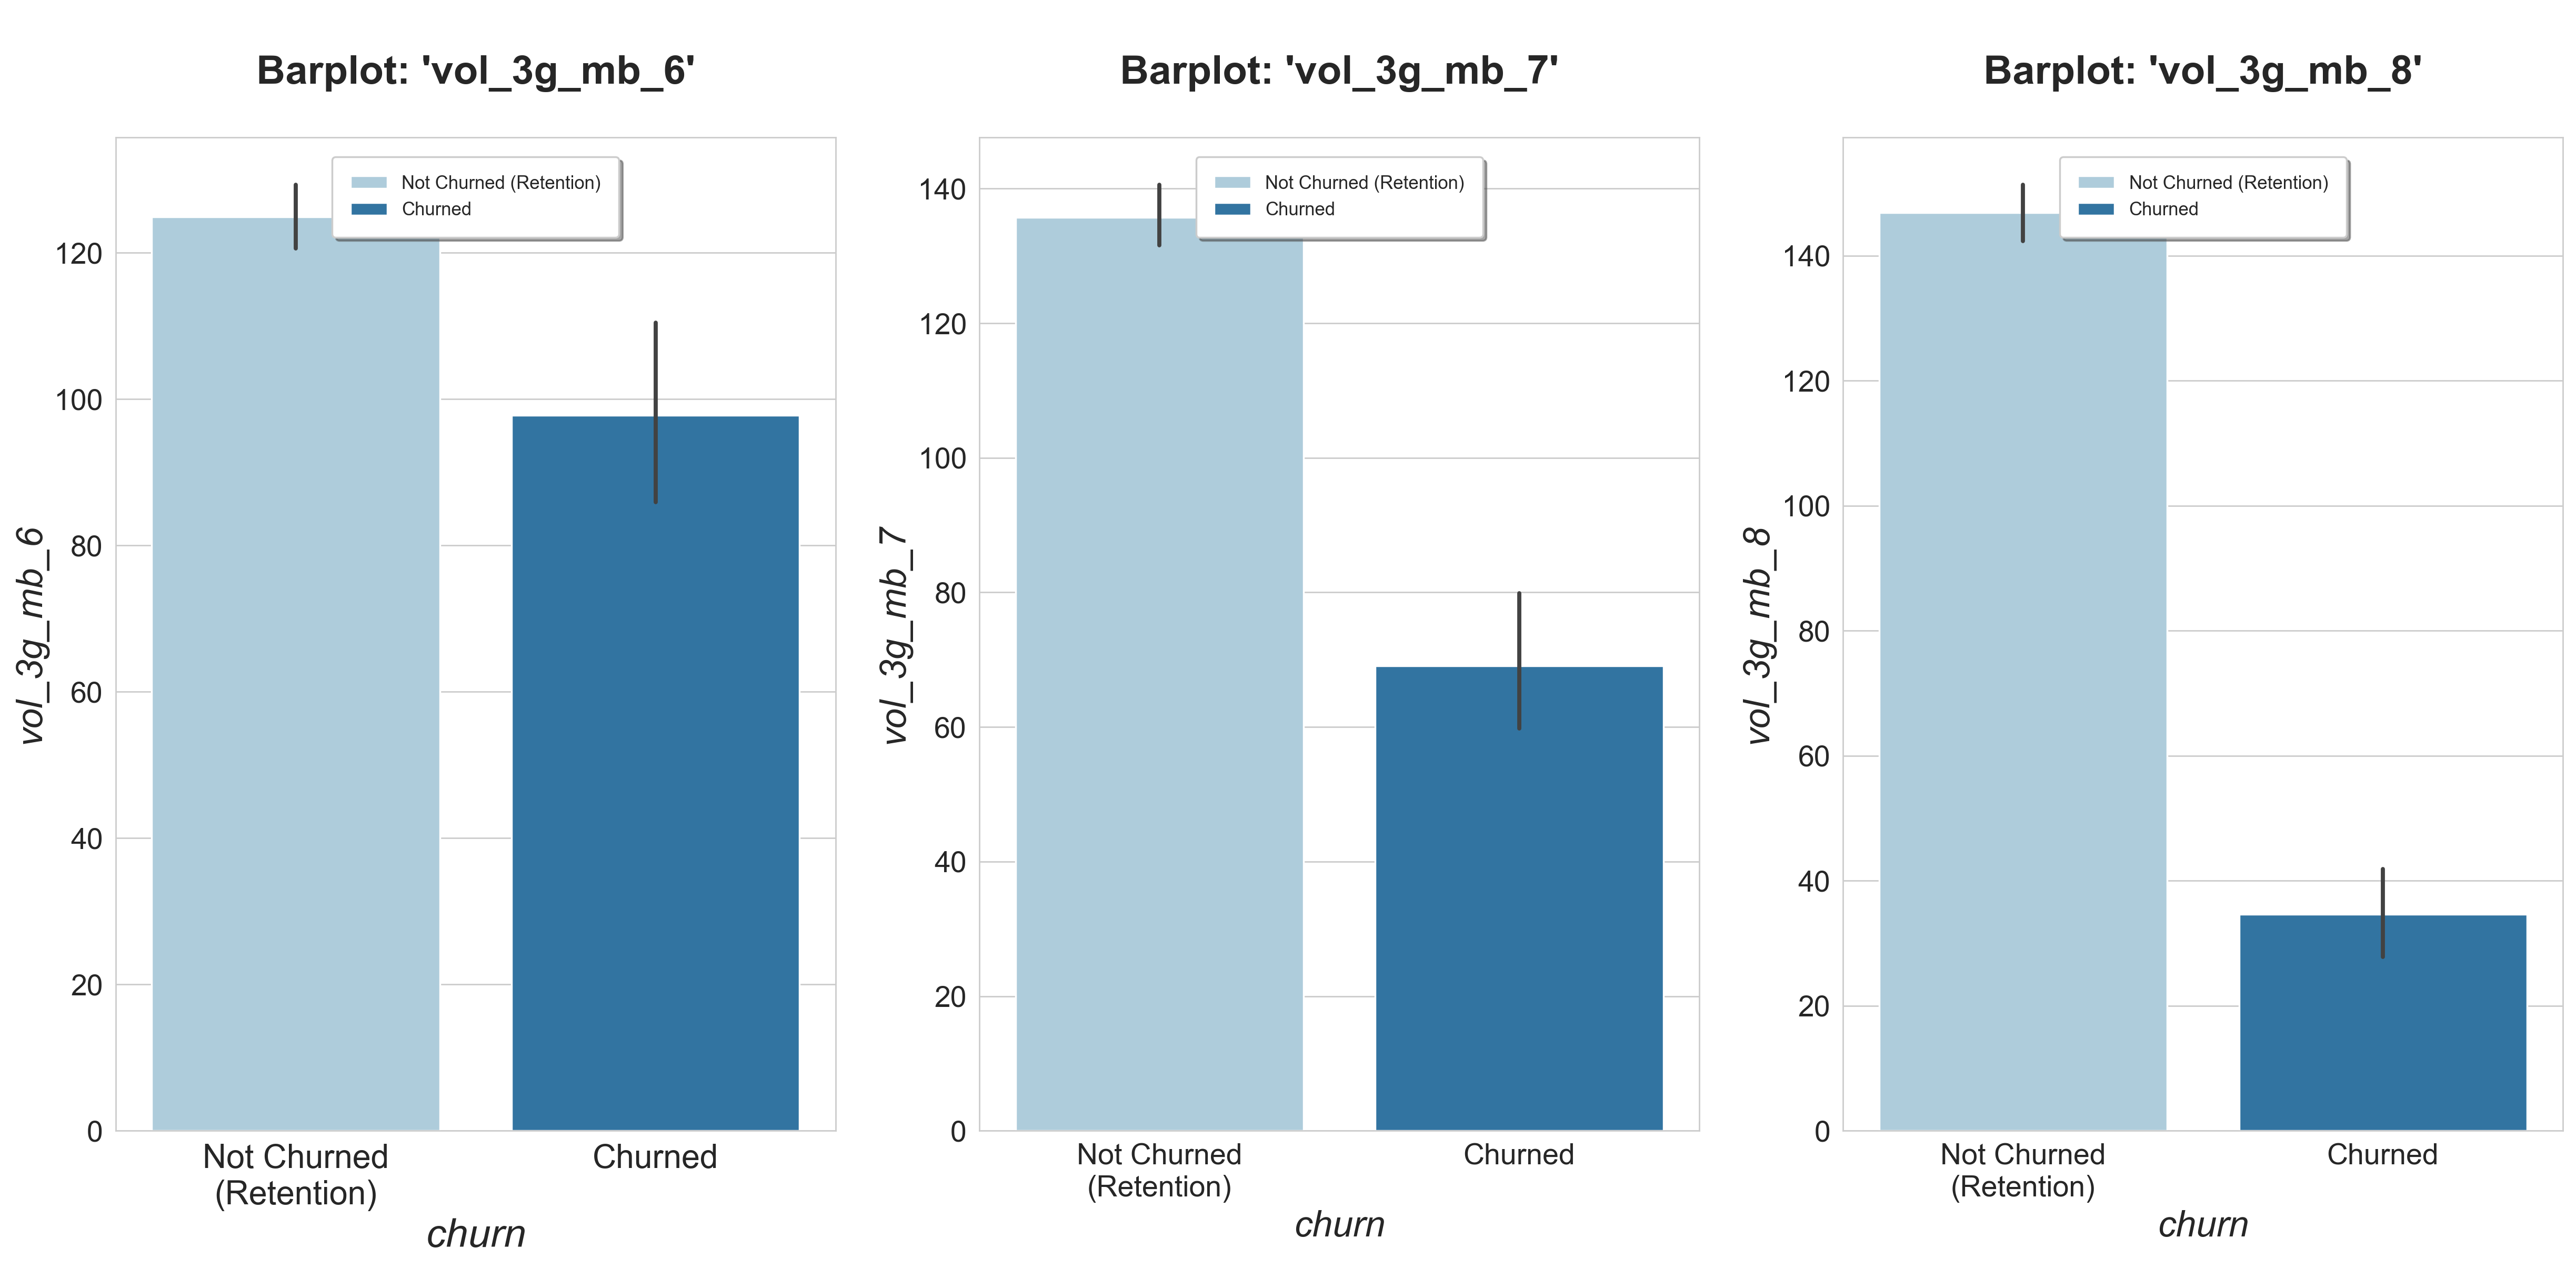

In [45]:
##Plotting volume of data usage:  

##Plotting volume of 2G data usage features:
plot_barplots_6_7_8('vol_2g_mb')

##Plotting volume of 3G data usage features:
plot_barplots_6_7_8('vol_3g_mb')

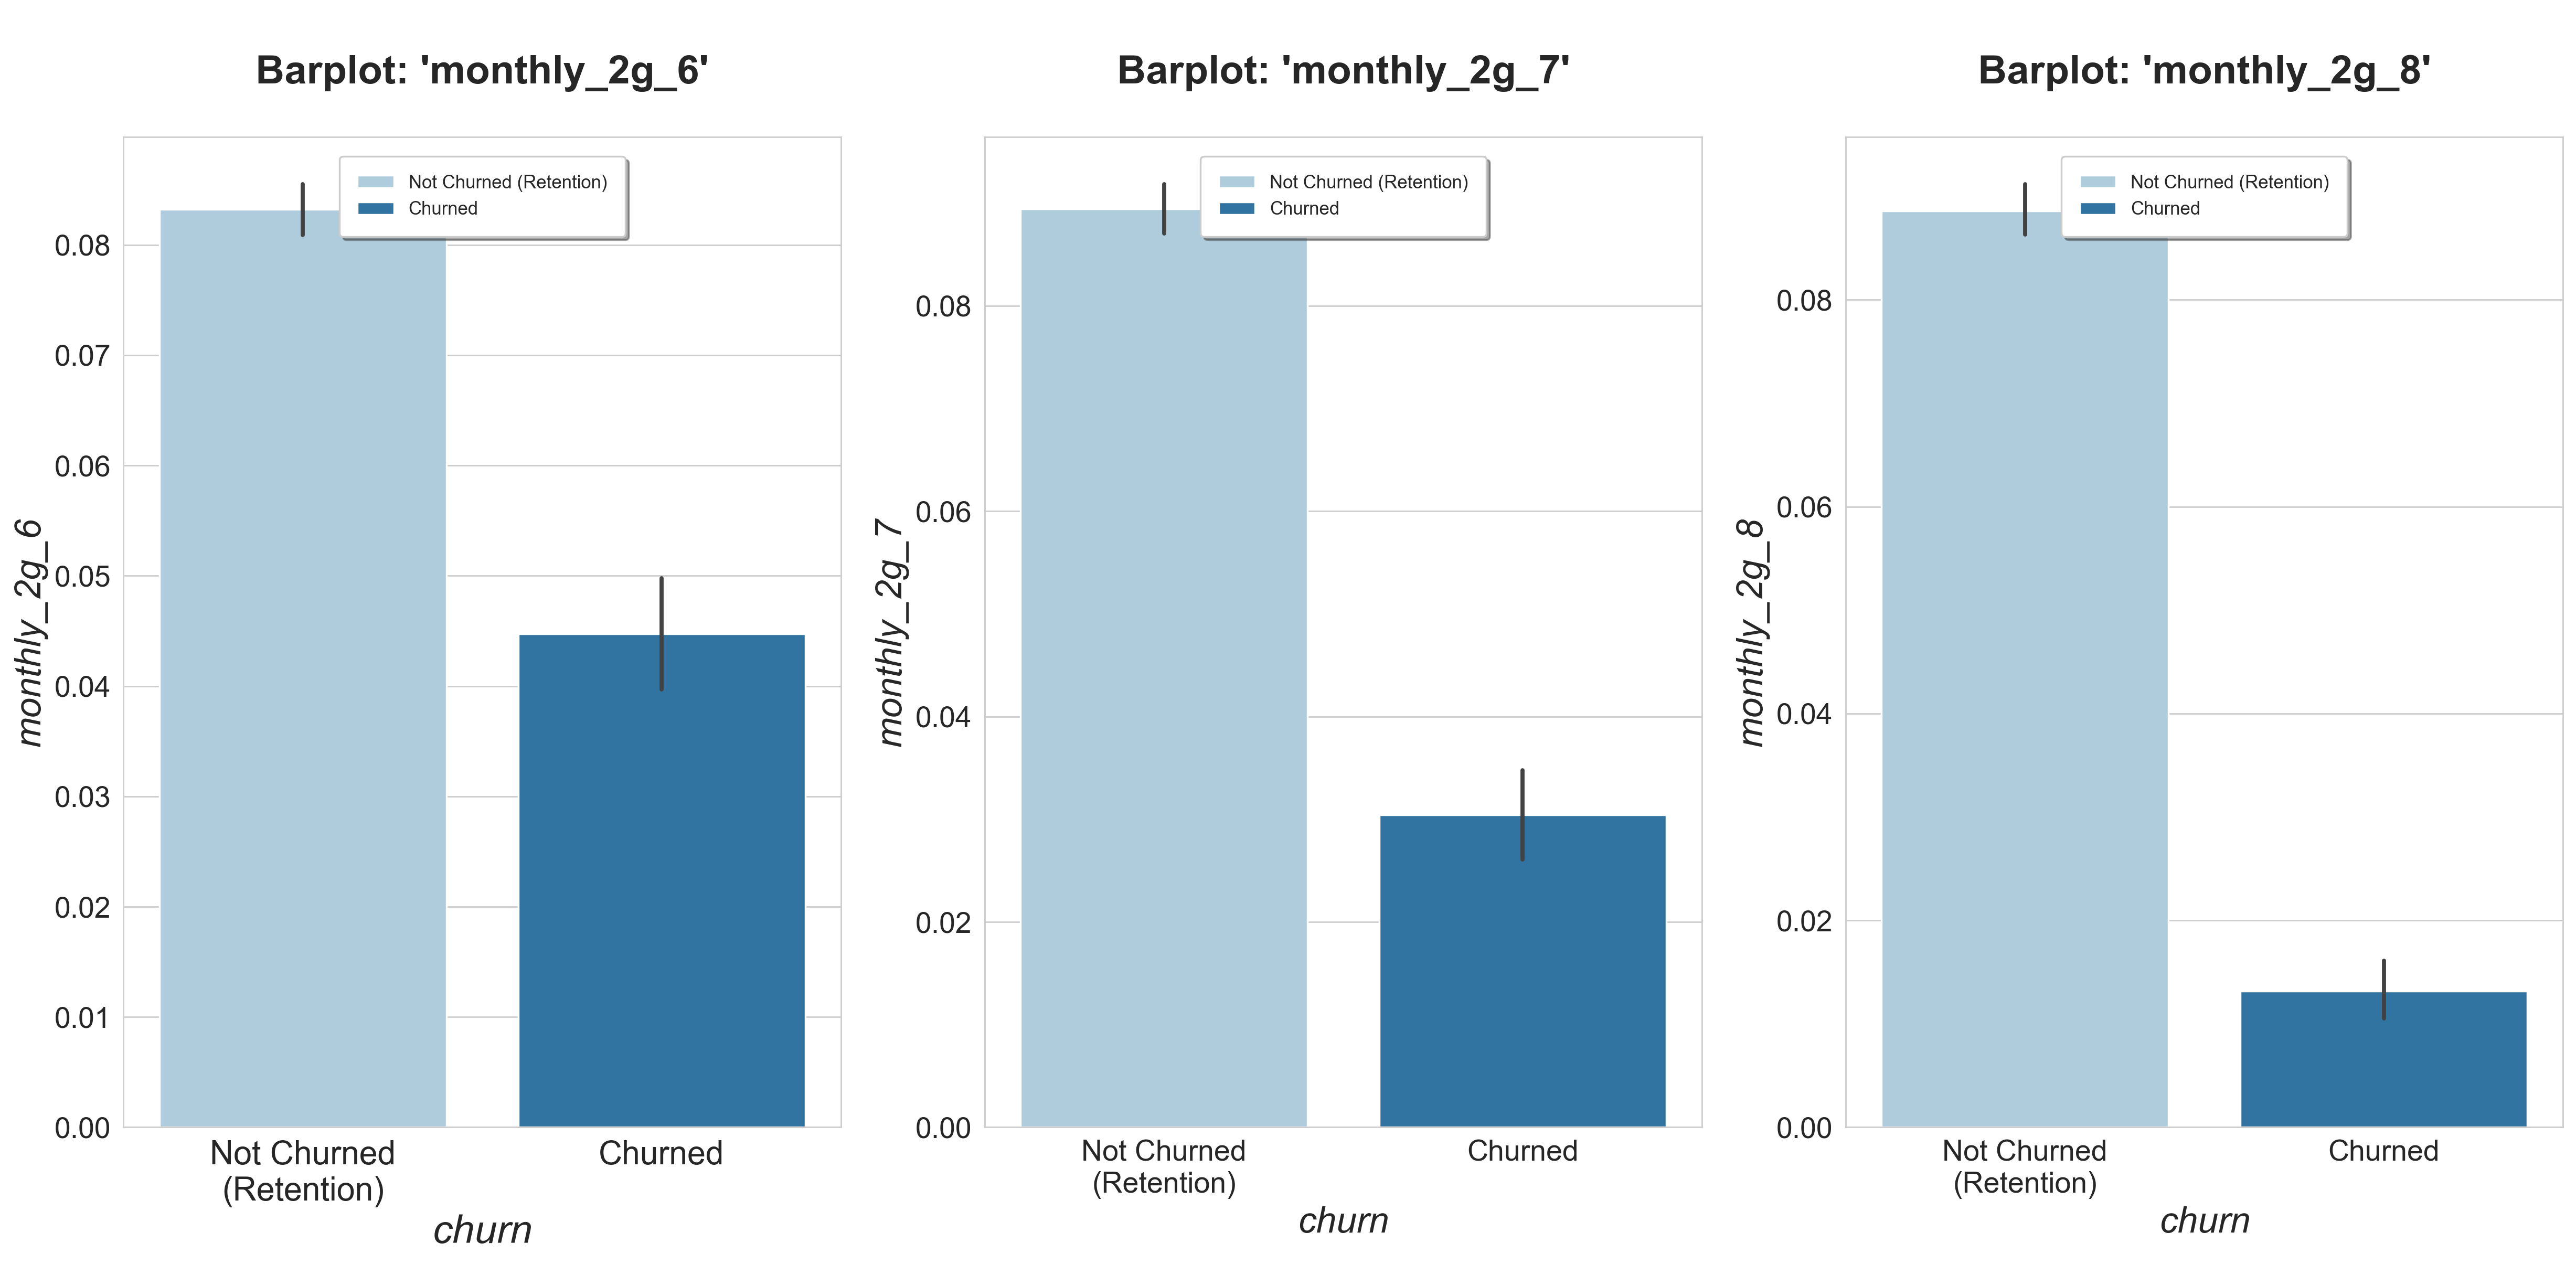

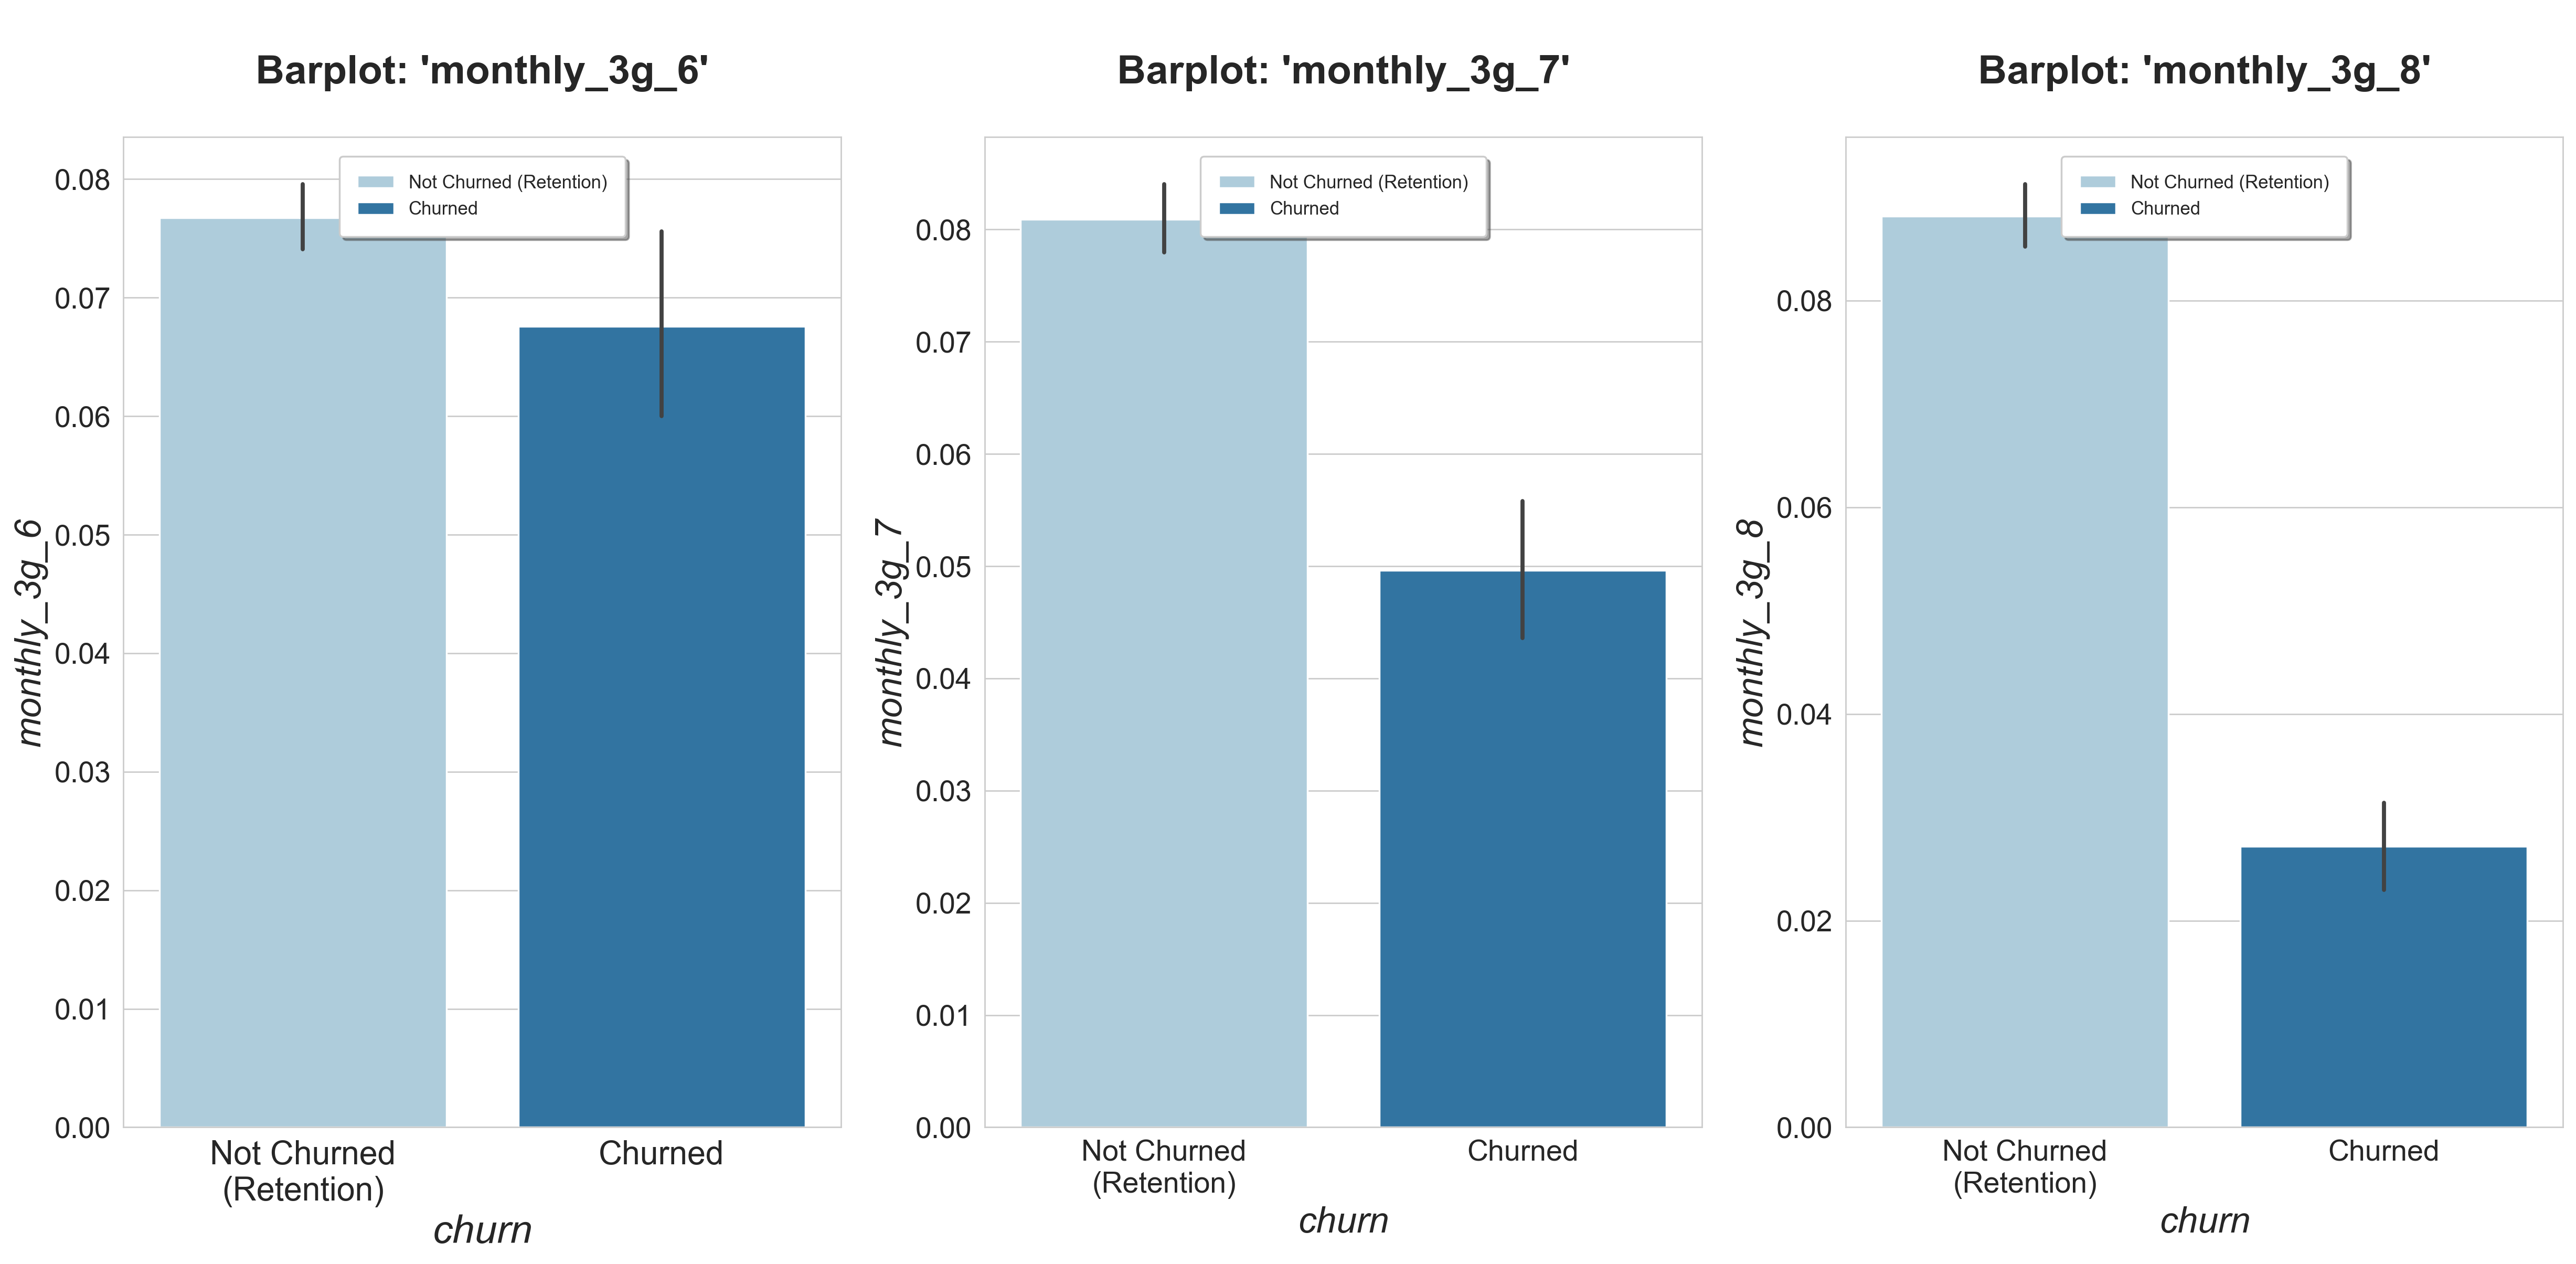

In [46]:
#Barplots for 'monthly_2g' and 'monthly_3g' usage check
plot_barplots_6_7_8('monthly_2g')  #monthly_2g for all 3 months
plot_barplots_6_7_8('monthly_3g')   #monthly_3g for all 3 months

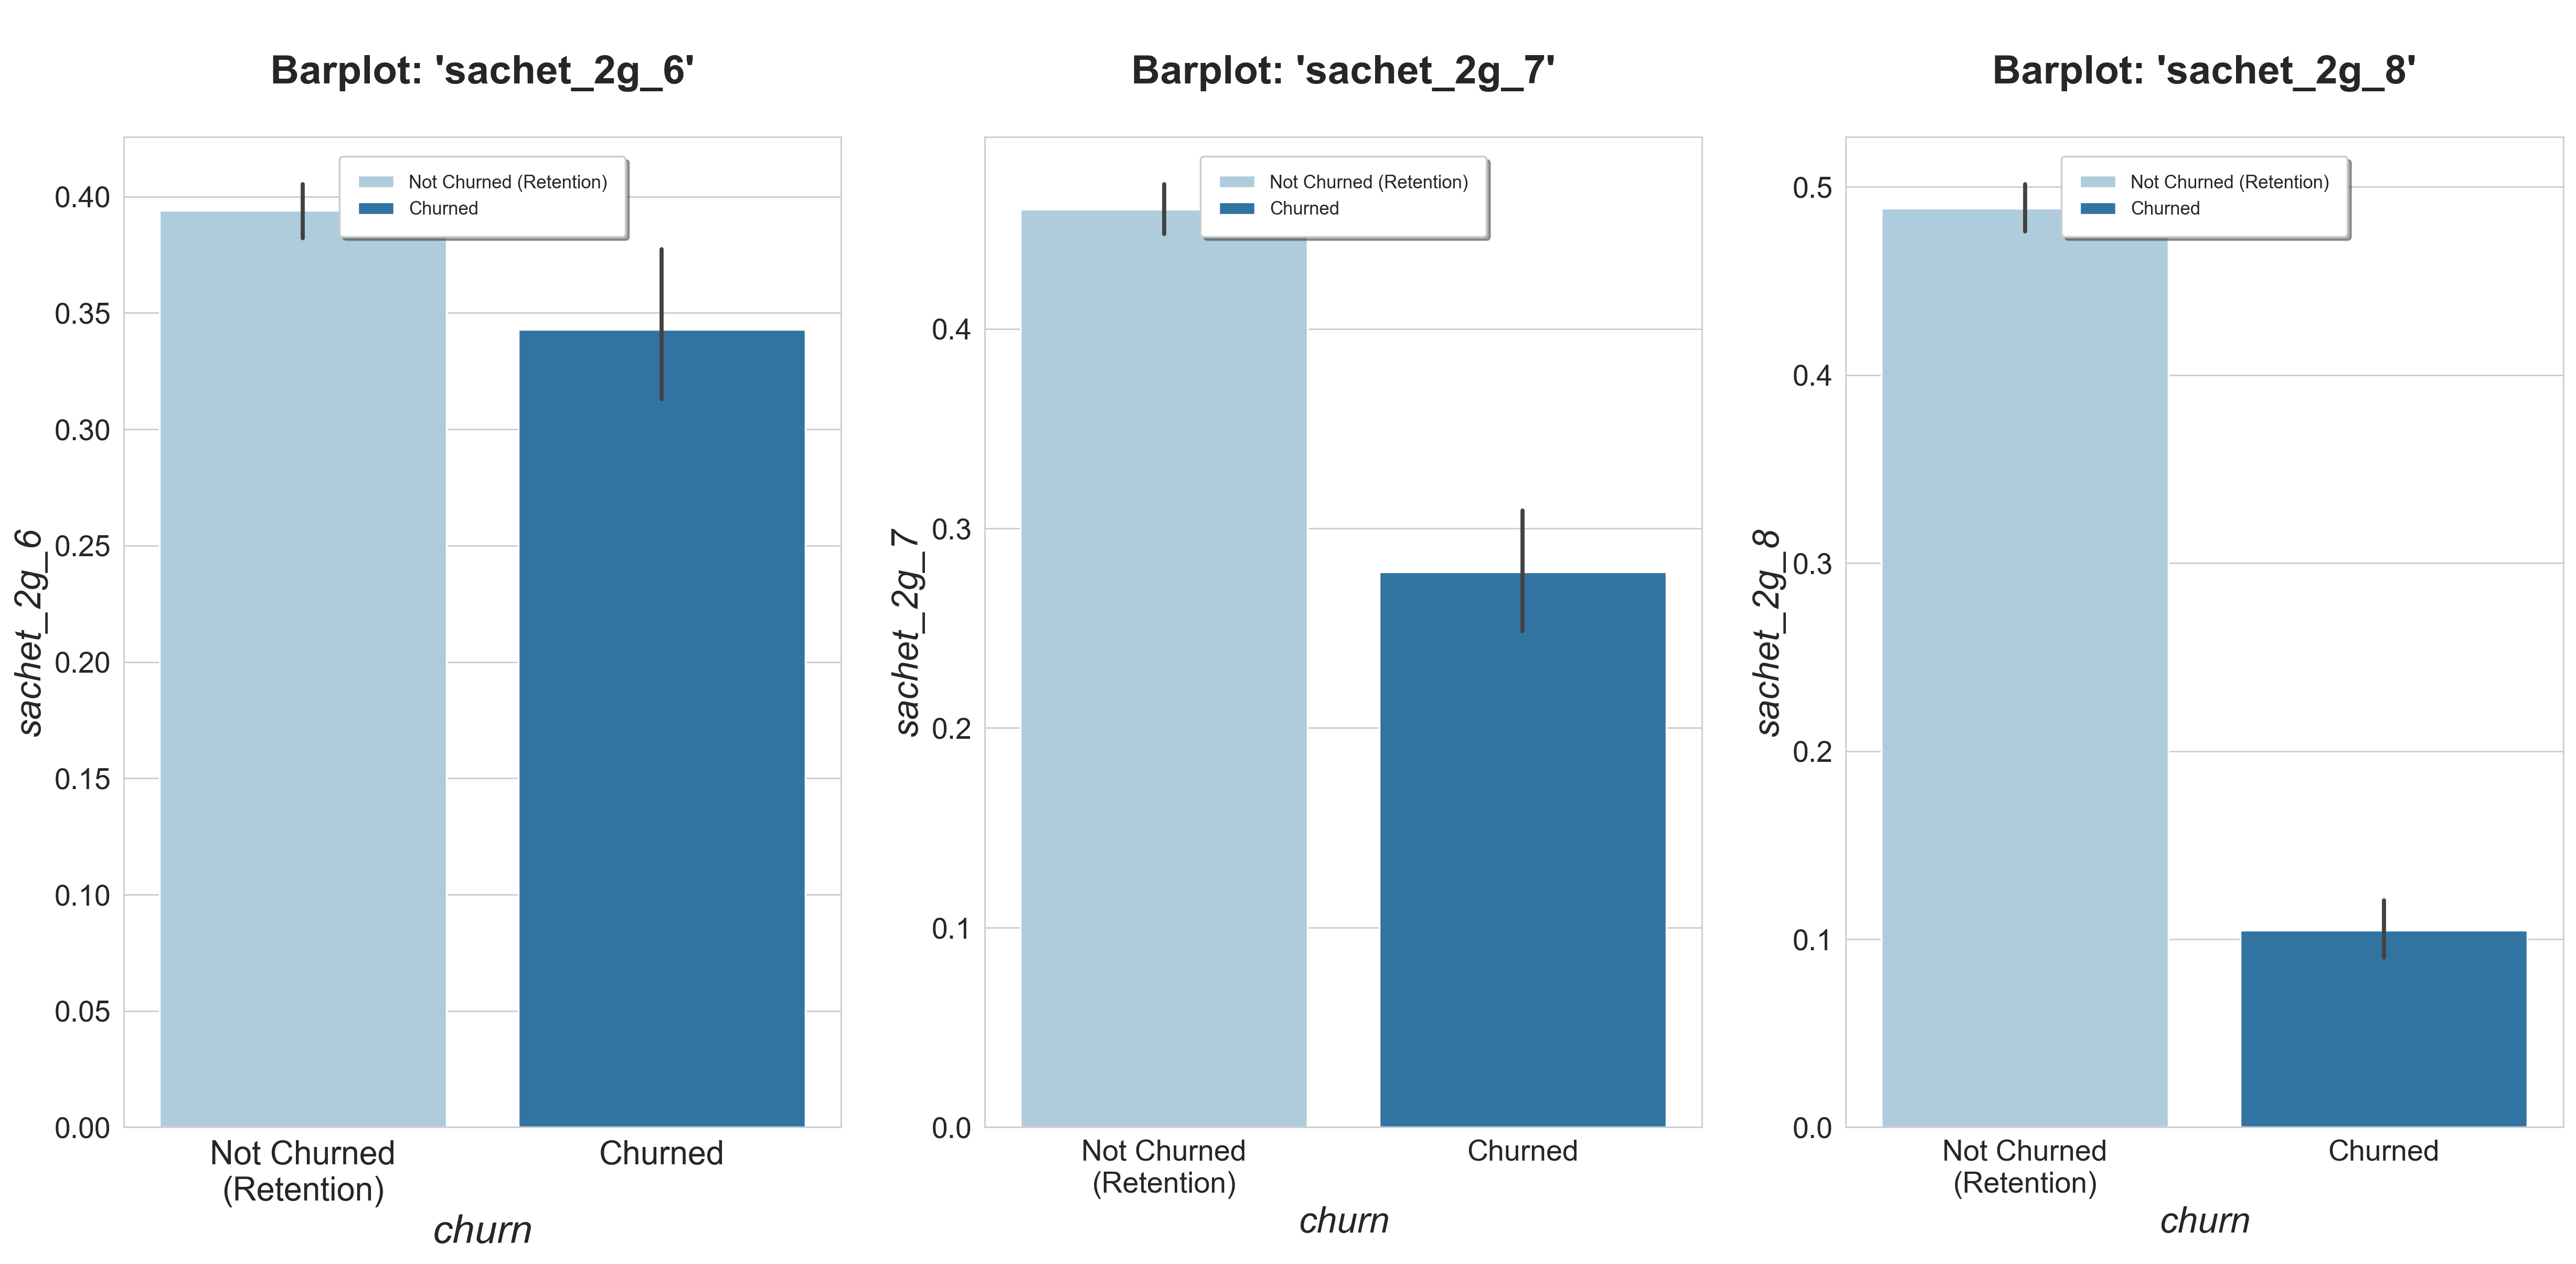

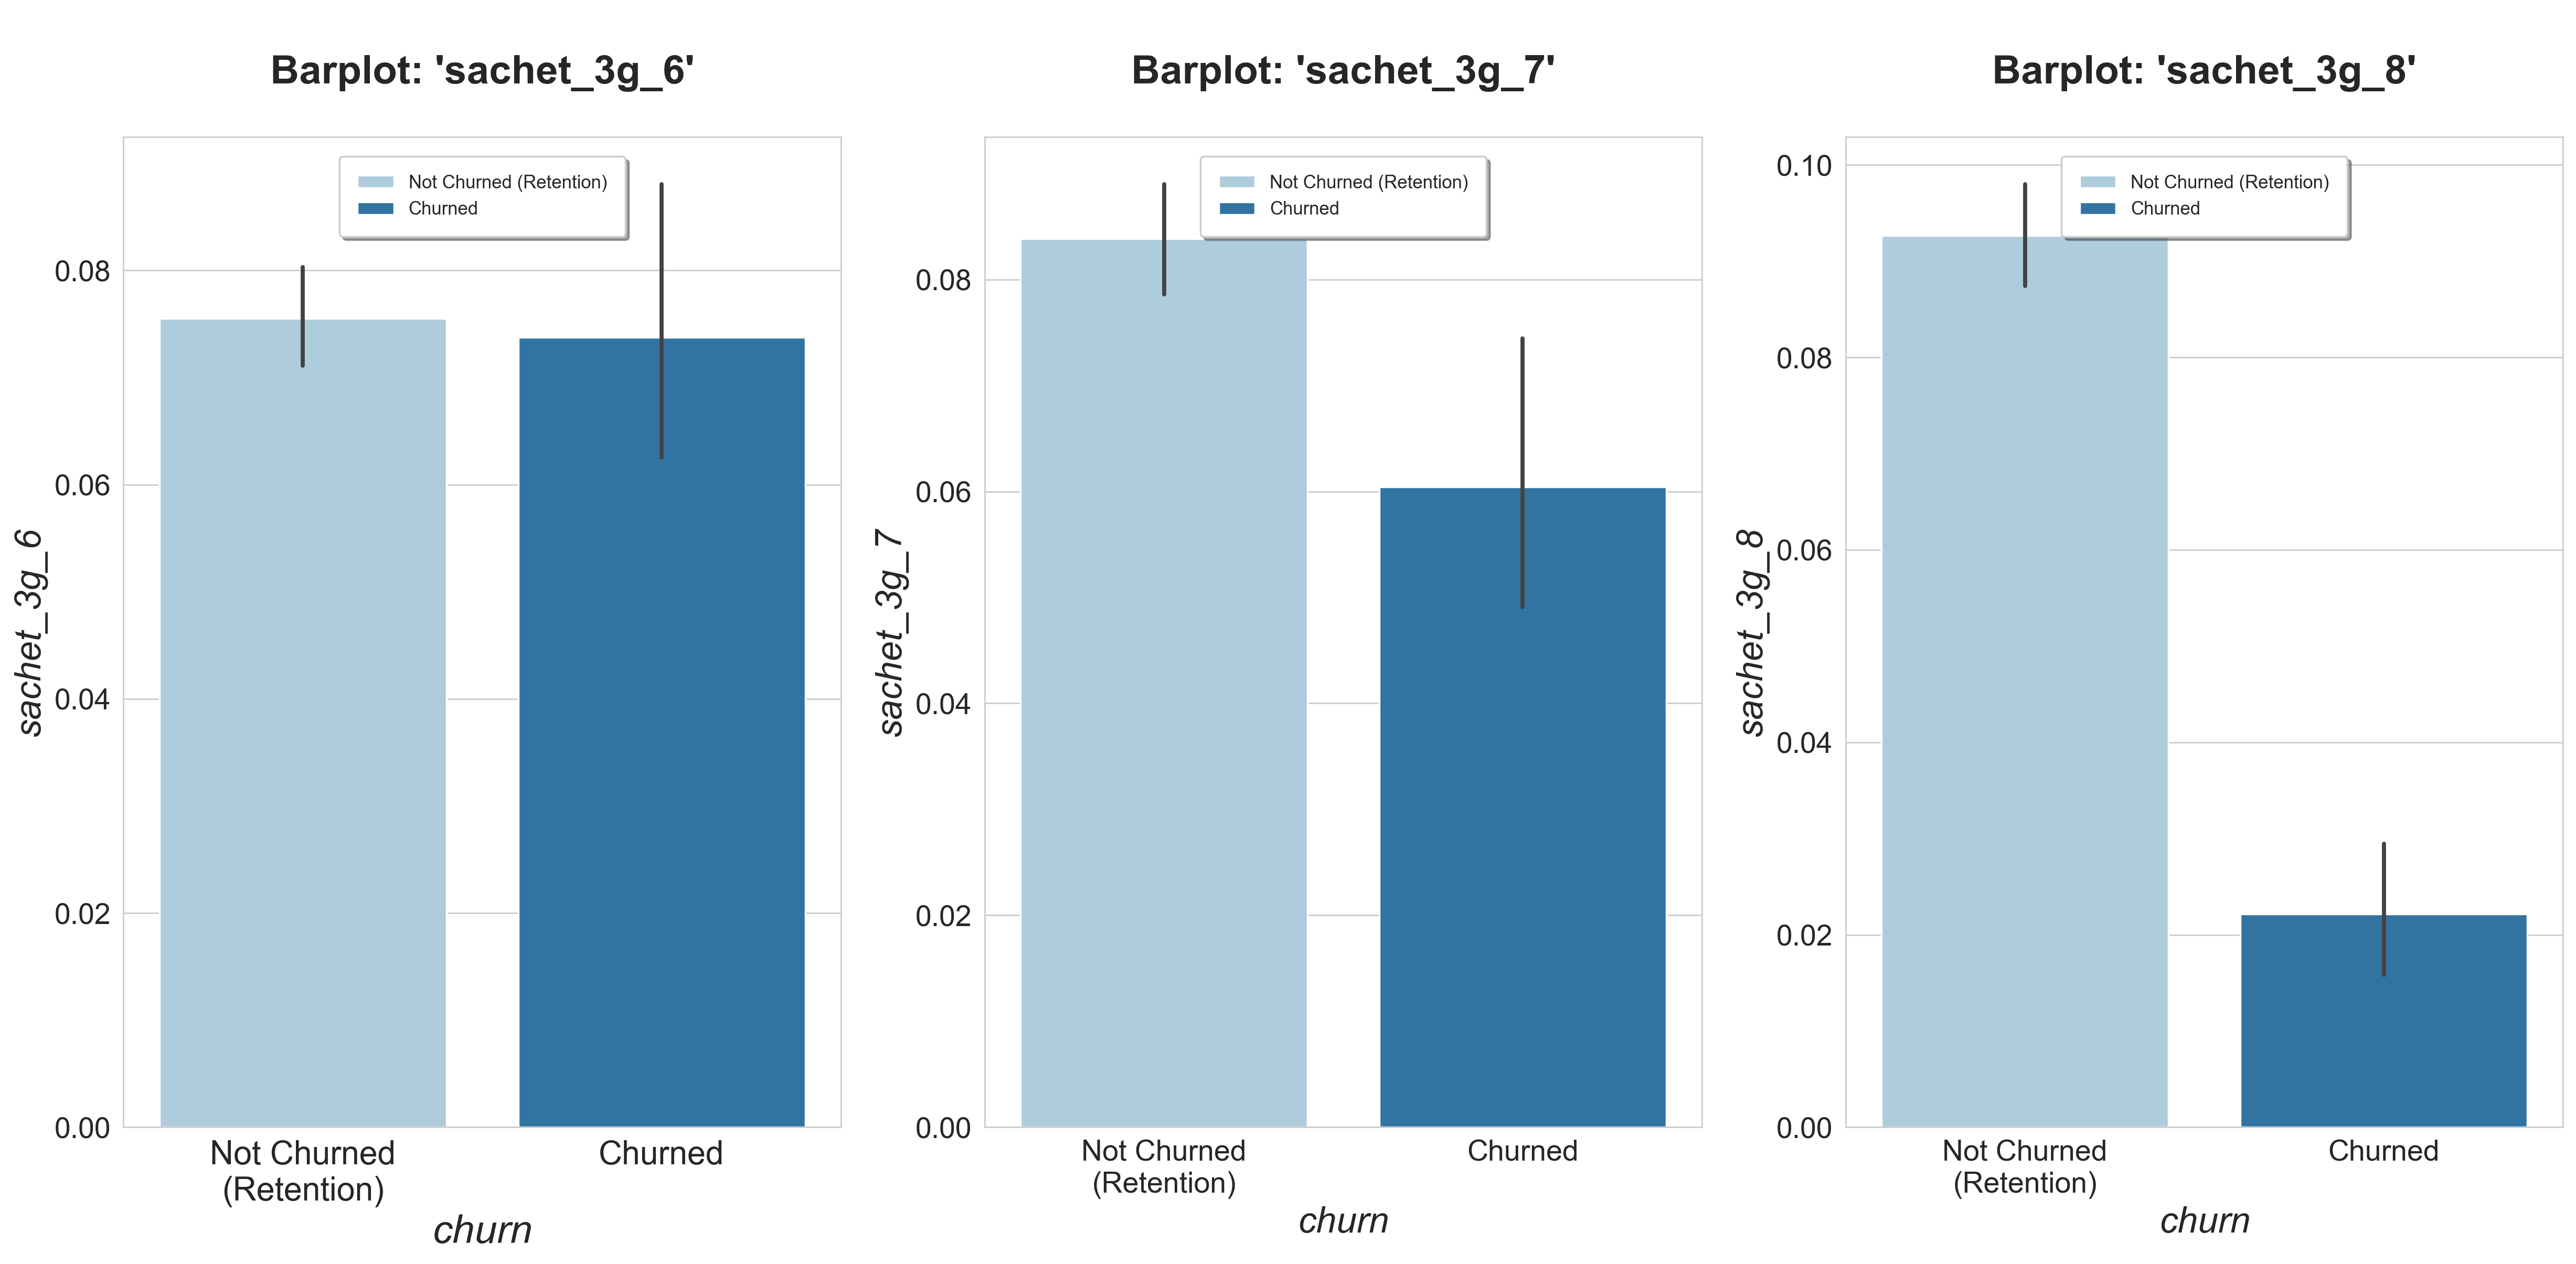

In [47]:
##Checking service schemes with validity smaller than a month for 2G/3G (sachet_2g') and ('sachet_3g') features

plot_barplots_6_7_8('sachet_2g')  #sachet_2g (service schemes with validity smaller than a month): for all 3 months
plot_barplots_6_7_8('sachet_3g')   #sachet_3g (service schemes with validity smaller than a month): for all 3 months

In [48]:
##Volume Based Cost (vbc) based features
vbc_cols_list = list(telecom_df.columns[telecom_df.columns.str.contains('vbc')])
vbc_cols_list

['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g']

In [49]:
##Rename vbc features to the desired format ending with month number
telecom_df.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8'}, inplace=True)

In [50]:
##Recheck rename Volume Based Cost (vbc) based features
vbc_cols_list = list(telecom_df.columns[telecom_df.columns.str.contains('vbc')])
vbc_cols_list

['vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6']

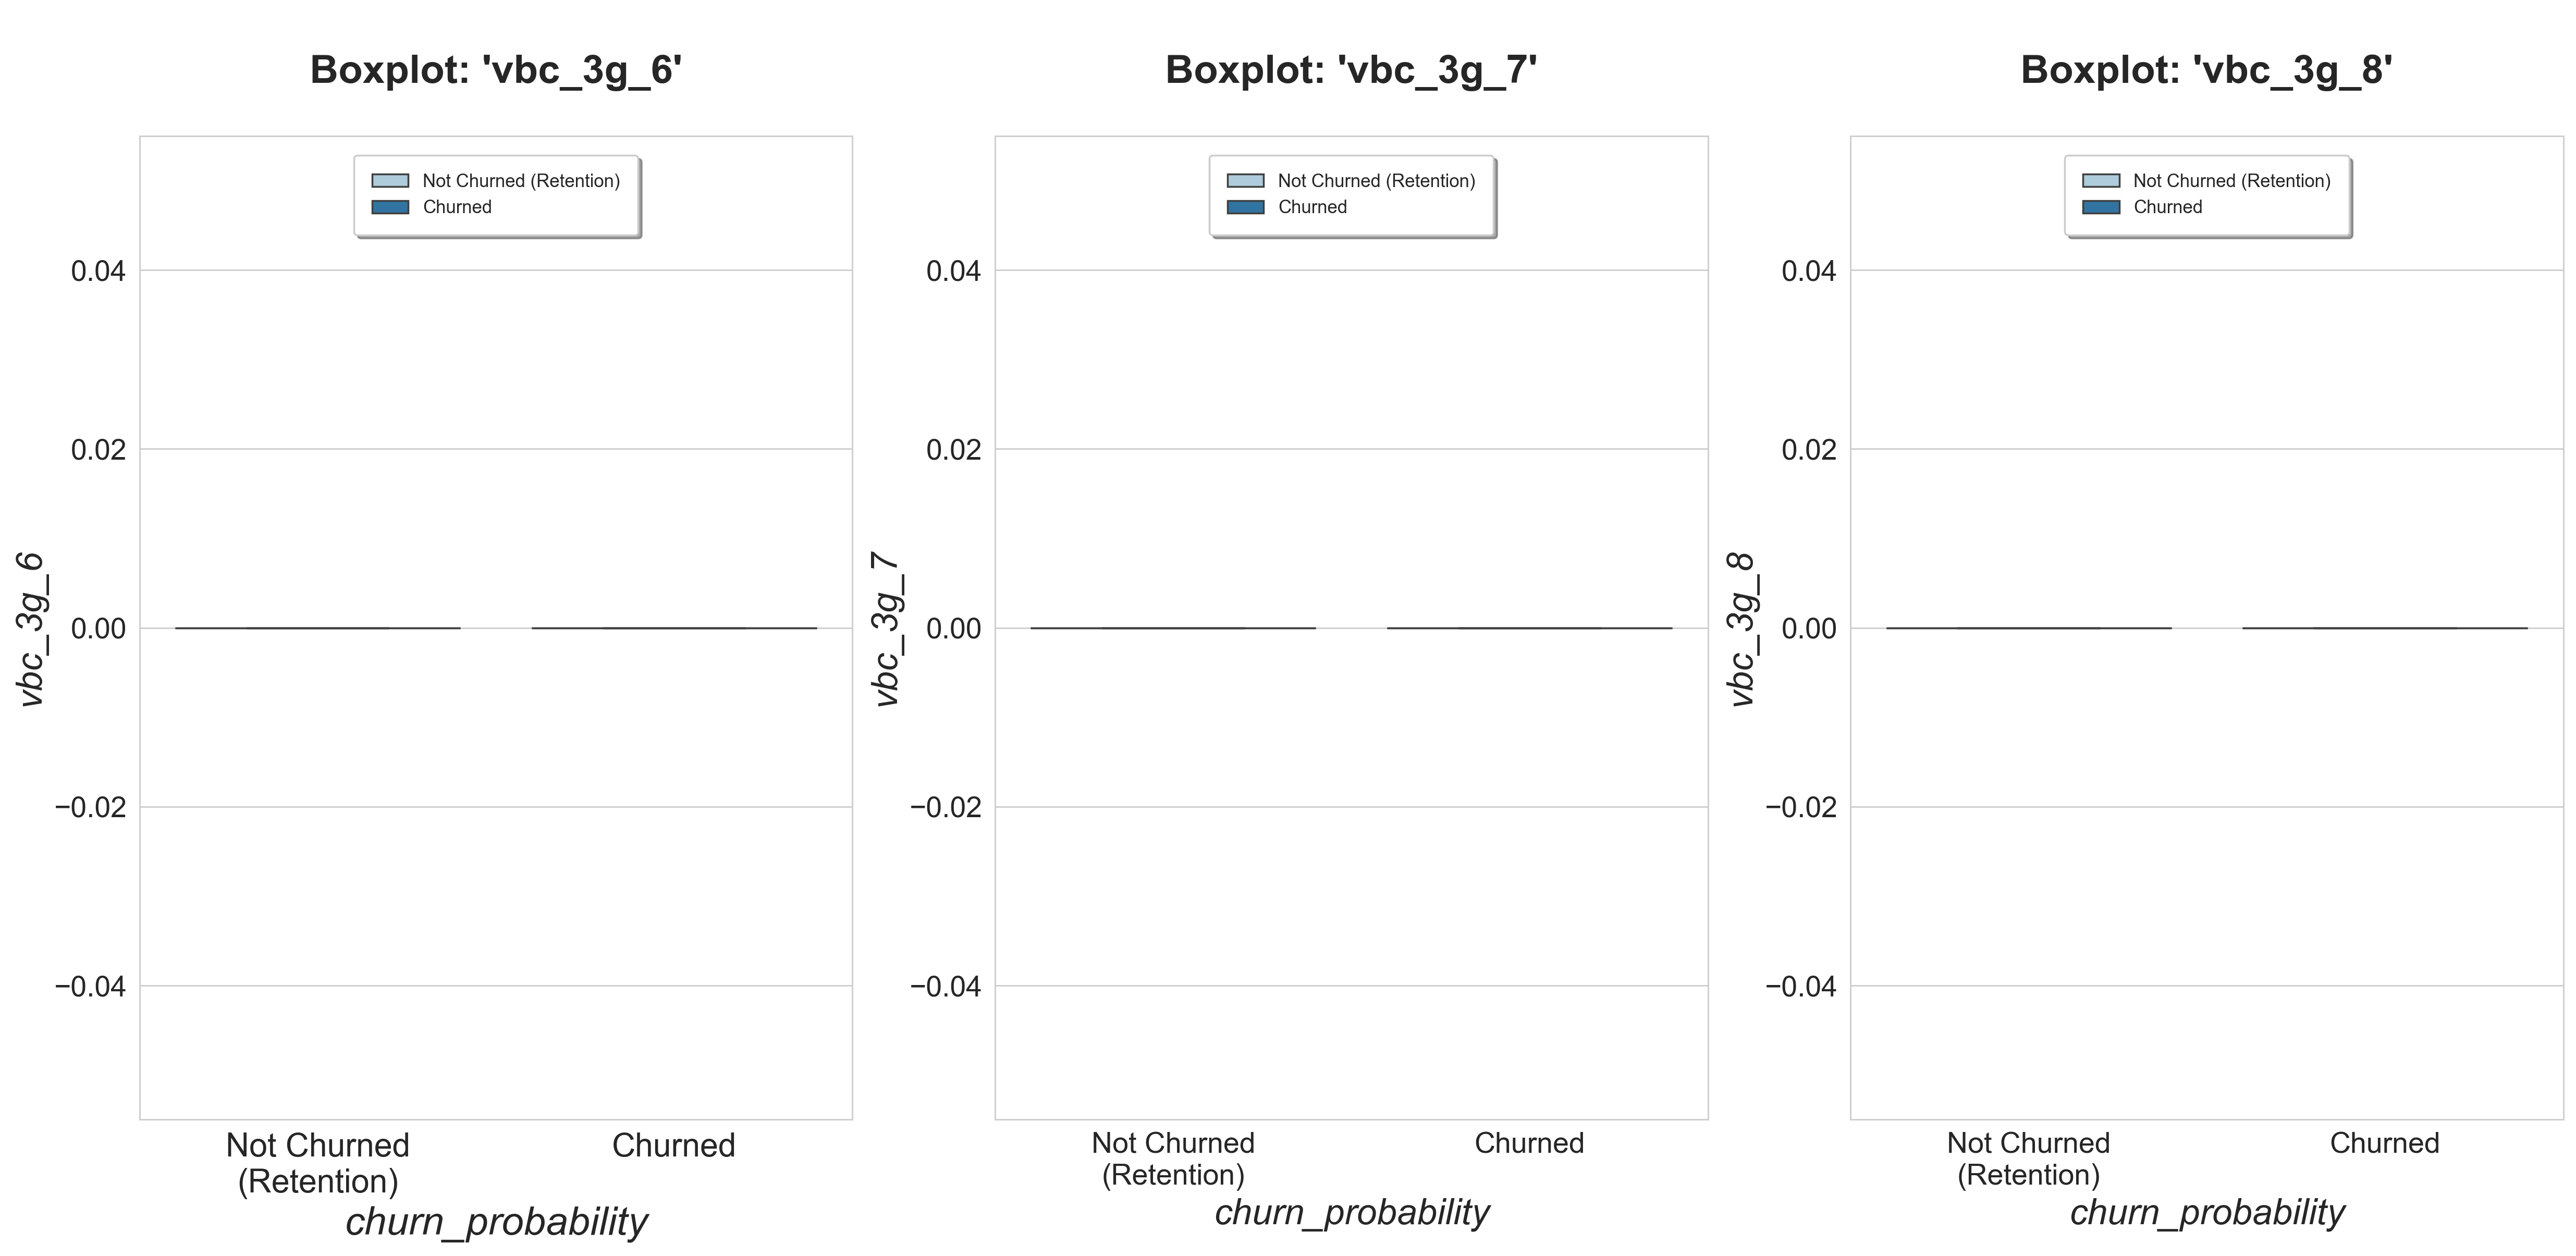

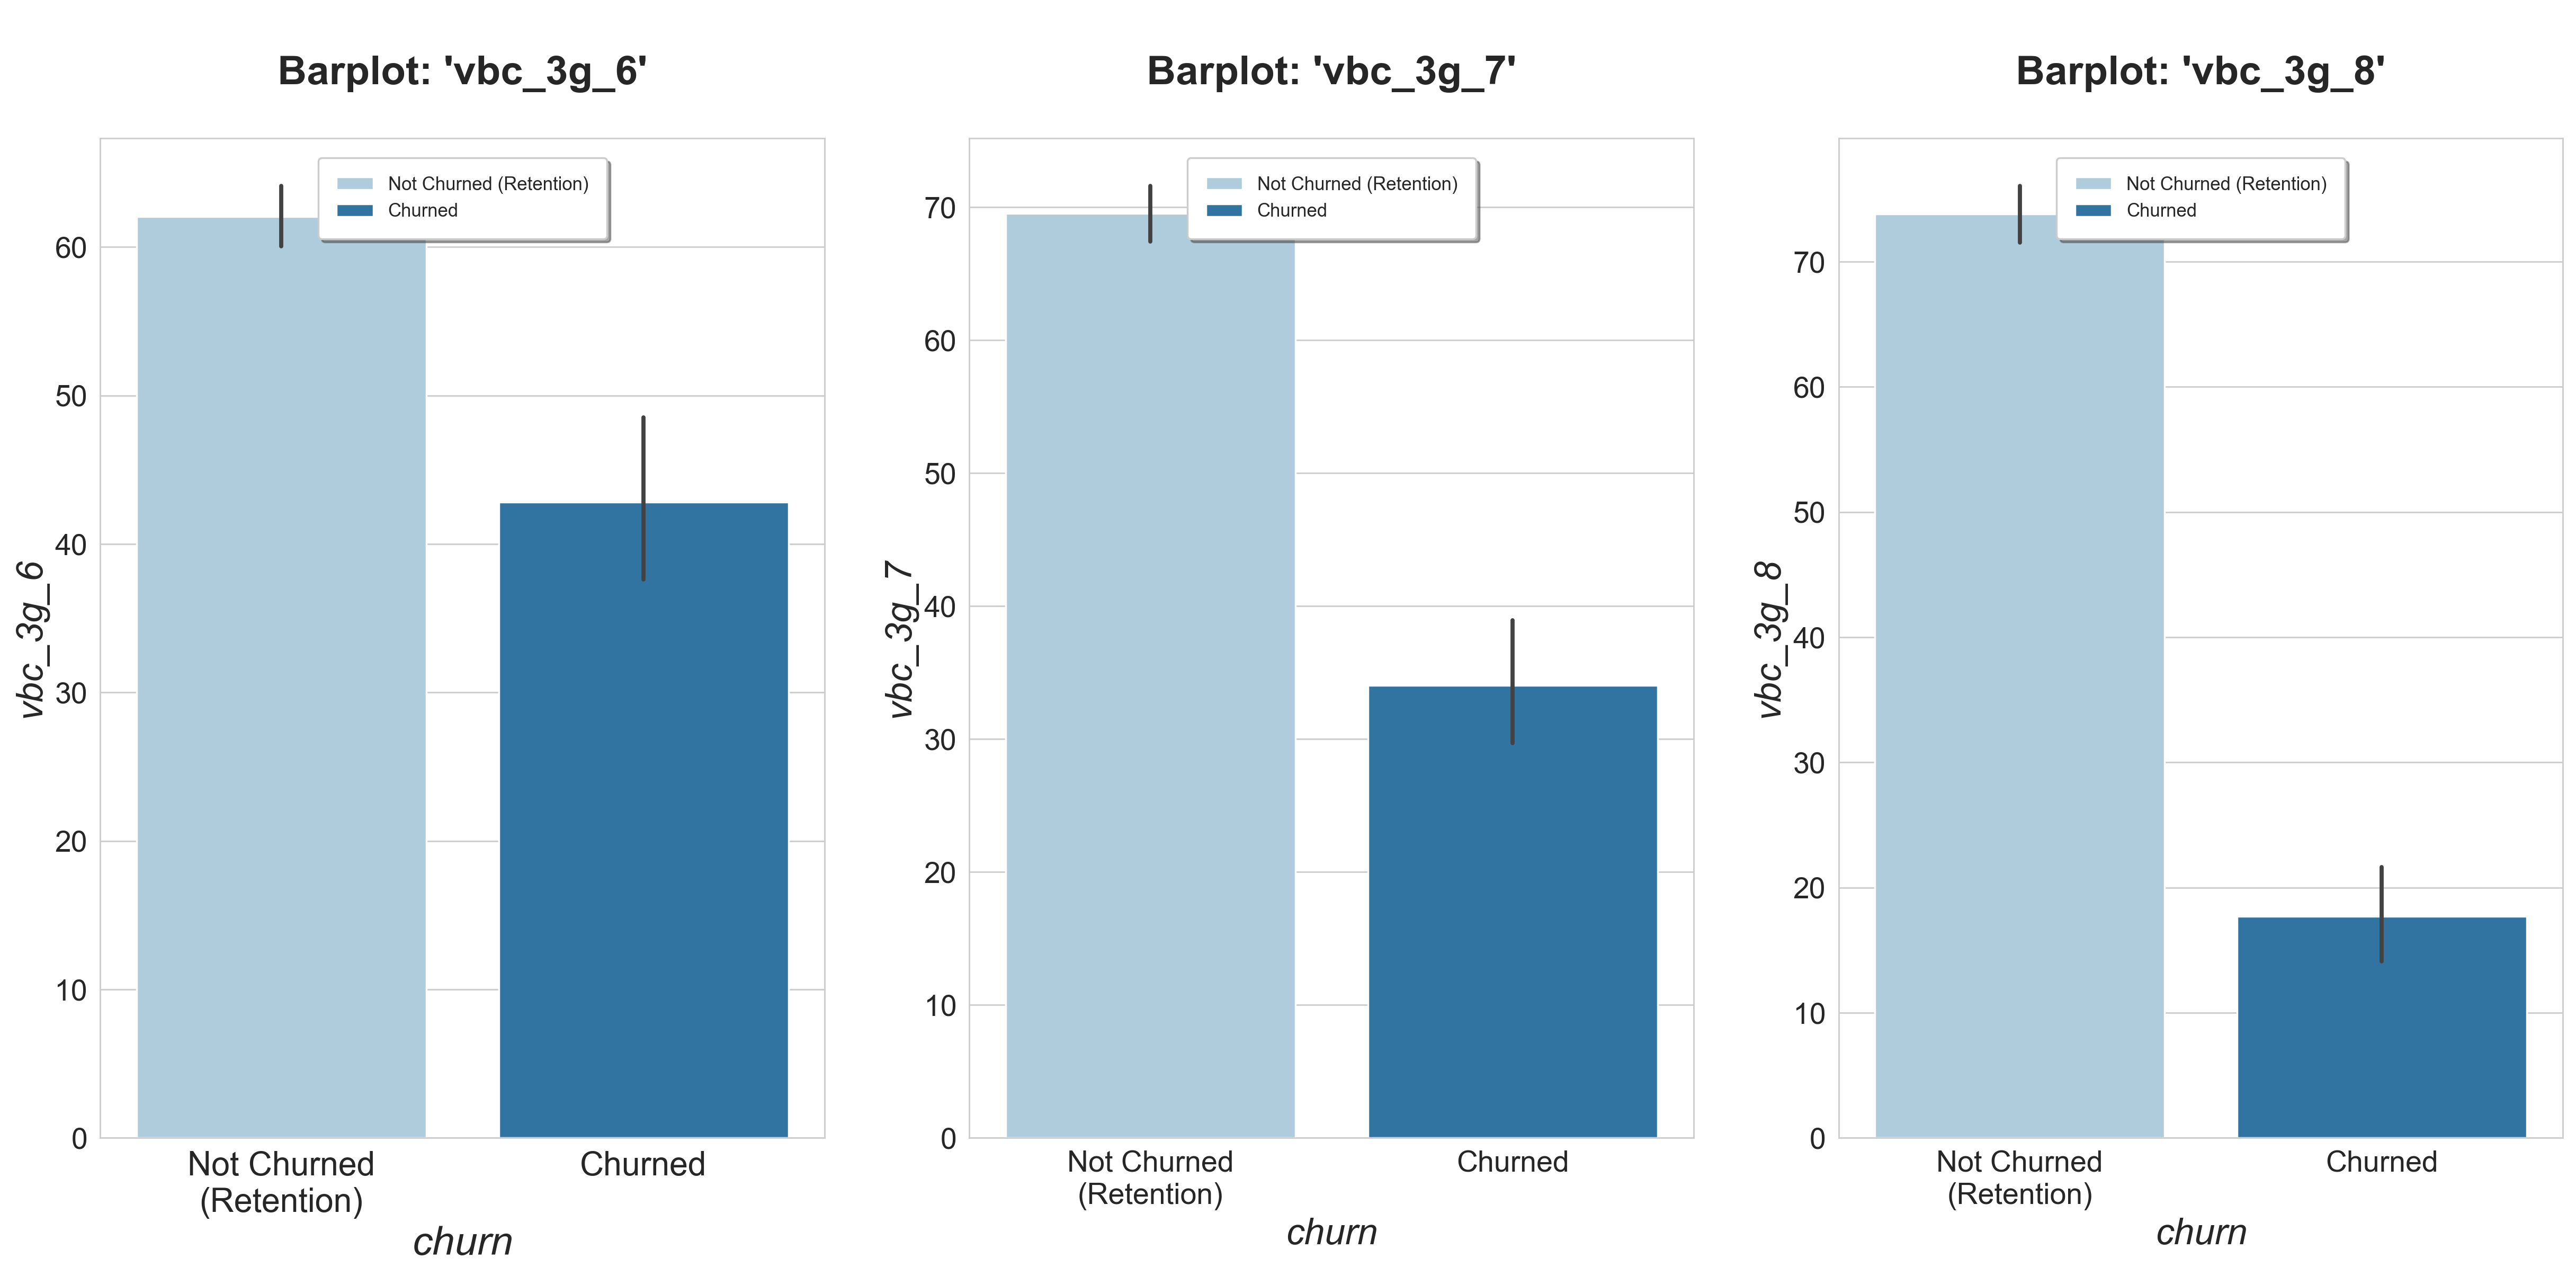

In [51]:
##Plotting boxplots and barplots for vbc based features
plot_boxplots_6_7_8('vbc_3g')
plot_barplots_6_7_8('vbc_3g')

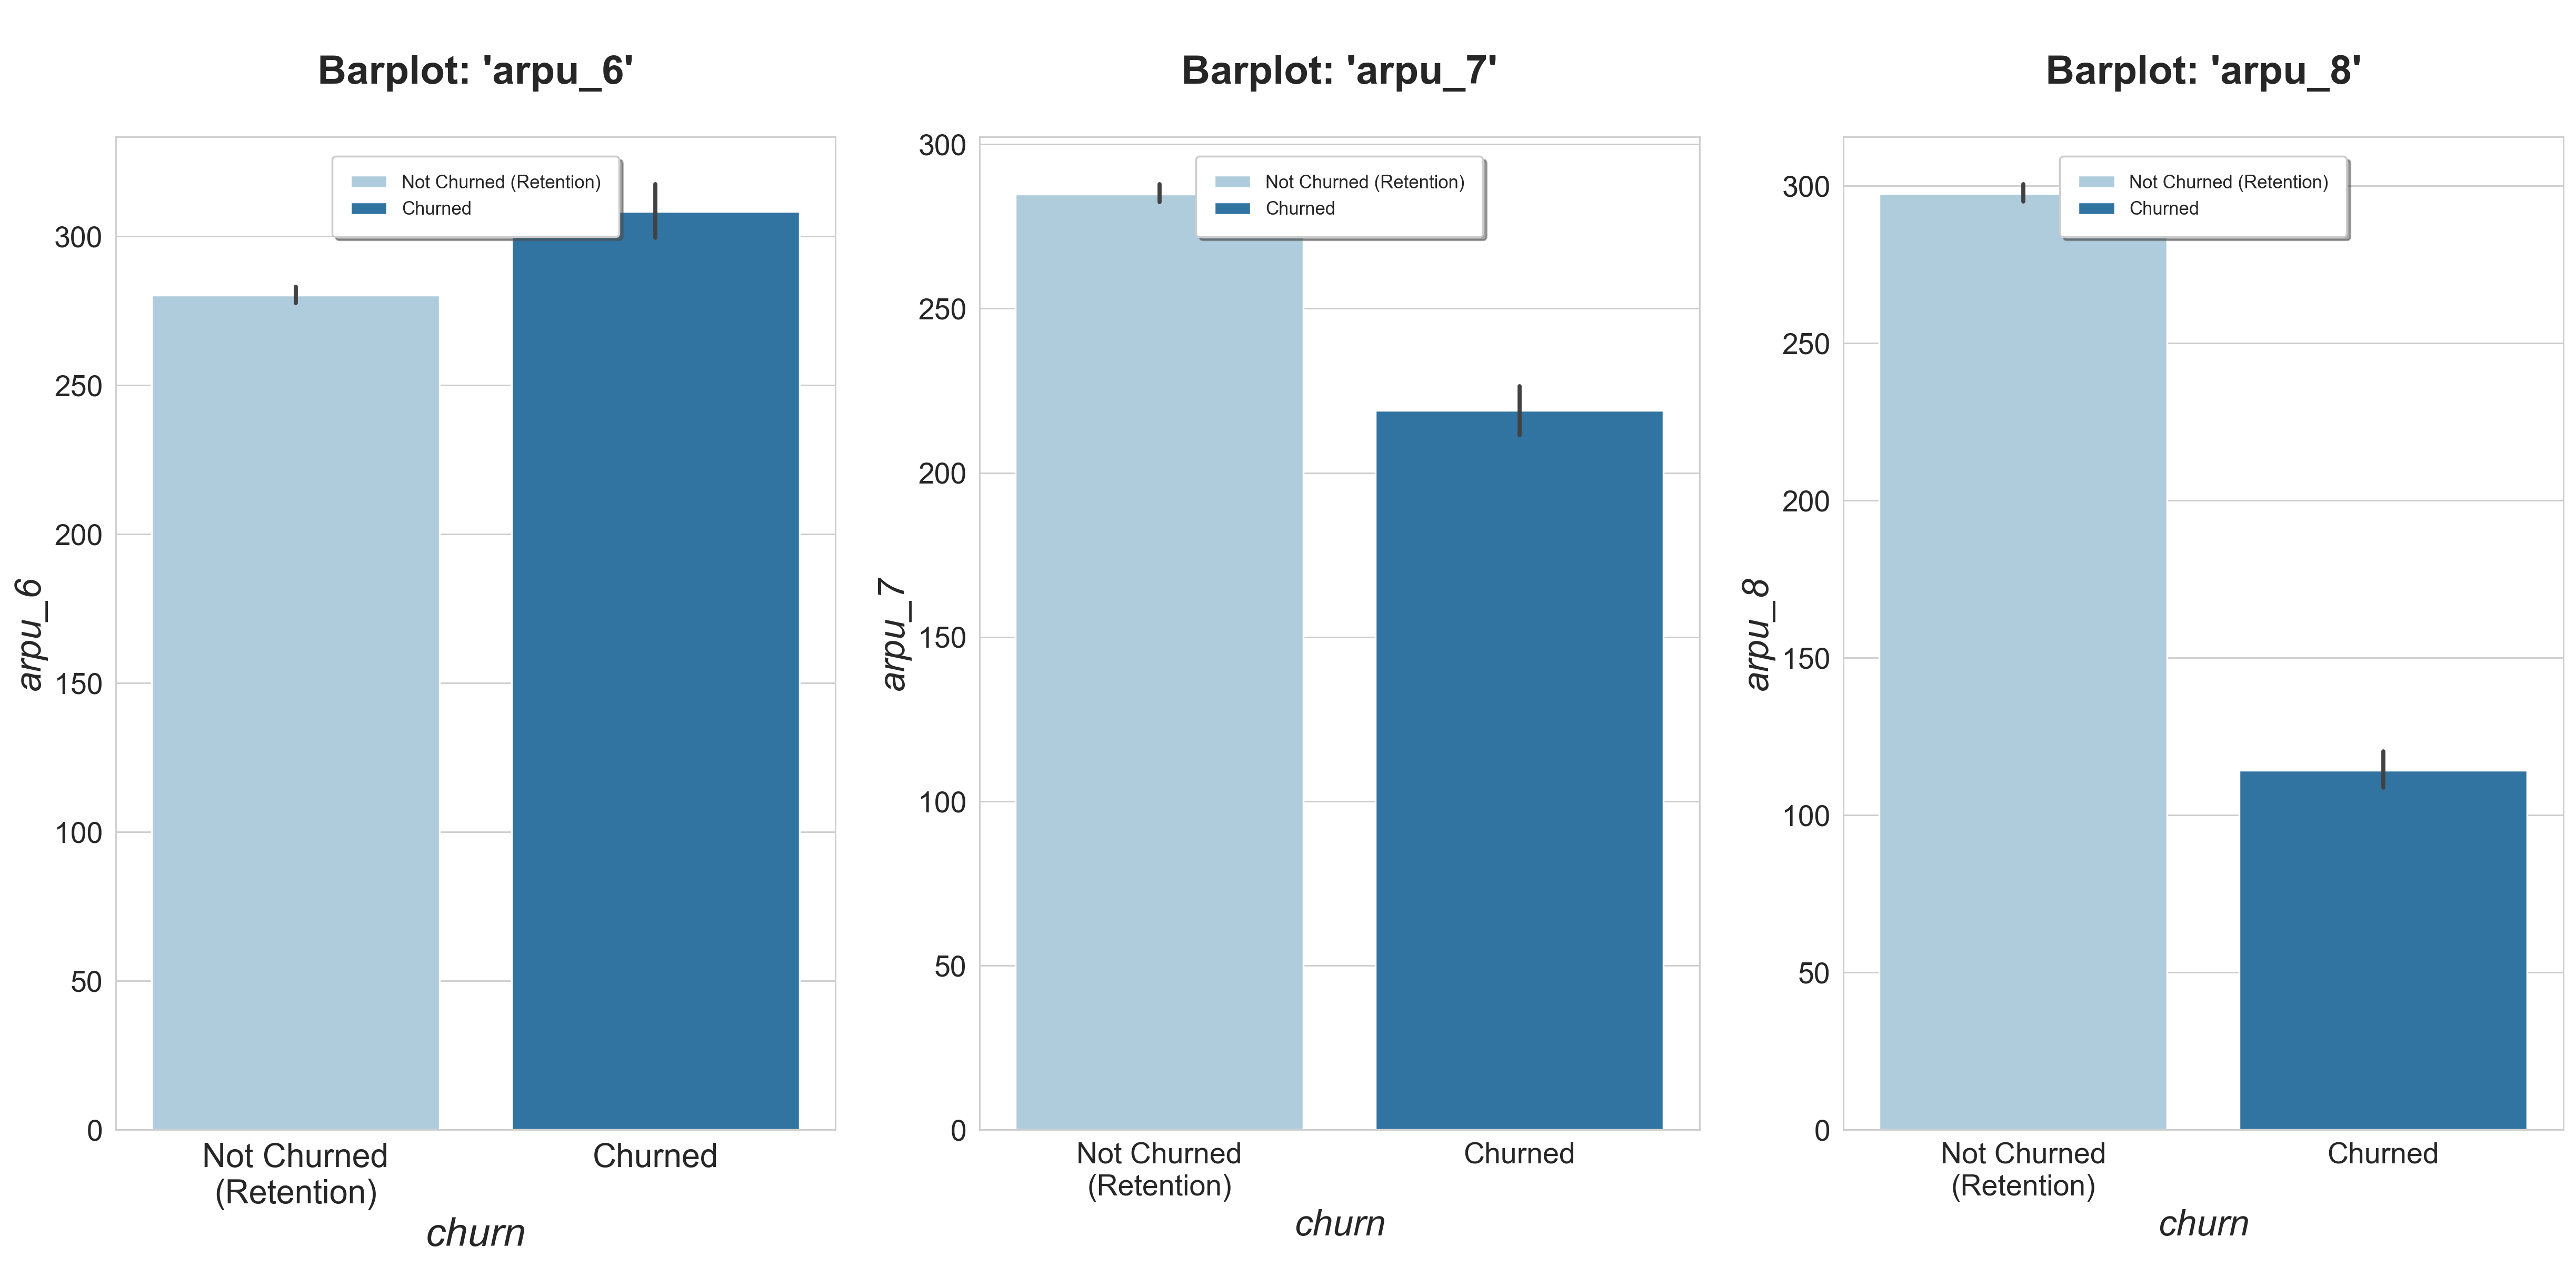

In [52]:
##Checking columns: average revenue per user
arpu_cols = telecom_df.columns[telecom_df.columns.str.contains('arpu_')]

##Plotting 'arpu_' barplots
plot_barplots_6_7_8('arpu')

In [53]:
##Check minutes of usage 'mou' columns
mou_cols = telecom_df.columns[telecom_df.columns.str.contains('mou')]
mou_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mo

In [54]:
##Check for missing value percentages in 'mou_cols'

mou_cols_df = telecom_df[mou_cols]
null_prcnt_df(mou_cols_df)

In [55]:
##Imputing minutes of usage (mou) attributes with 0
telecom_df[mou_cols] = telecom_df[mou_cols].replace(np.nan, 0)

In [56]:
##Reheck for missing value percentages in 'mou_cols'

mou_cols_df = telecom_df[mou_cols]
null_prcnt_df(mou_cols_df)

In [57]:
##Check for incoming(ic) mou features (just for 6th month)
ic_mou_features = list(telecom_df.columns[telecom_df.columns.str.contains('.*_ic_.*mou_6')])
ic_mou_features

['roam_ic_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6']

In [58]:
telecom_df[ic_mou_features].describe()

roam_ic_mou_6  loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  loc_ic_t2f_mou_6  \
count   69999.000000      69999.000000      69999.000000      69999.000000   
mean        9.379276         46.143461        102.915265         11.574147   
std        56.260778        138.011740        166.407161         38.700206   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          2.110000         13.860000          0.000000   
50%         0.000000         14.240000         52.290000          0.660000   
75%         0.000000         44.760000        127.280000          7.530000   
max      2850.980000       5315.590000       4450.740000       1872.340000   

       loc_ic_mou_6  std_ic_t2t_mou_6  std_ic_t2m_mou_6  std_ic_t2f_mou_6  \
count  69999.000000      69999.000000      69999.000000      69999.000000   
mean     160.641286          9.102206         19.914931          2.061402   
std      249.668829         50.666333         78.794332         16.197661   
min        0.000000          0.000000          0.000000          0.000000   
25%       24.860000          0.000000          0.000000          0.000000   
50%       86.310000          0.000000          1.590000          0.000000   
75%      200.690000          3.610000         13.940000          0.000000   
max     7454.630000       3336.380000       5647.160000       1351.110000   

       std_ic_mou_6  total_ic_mou_6  spl_ic_mou_6  isd_ic_mou_6  
count  69999.000000    69999.000000  69999.000000  69999.000000  
mean      31.080982      199.710640      0.059483      7.101776  
std      102.490662      290.114823      0.161981     59.751263  
min        0.000000        0.000000      0.000000      0.000000  
25%        0.000000       38.640000      0.000000      0.000000  
50%        5.030000      114.780000      0.000000      0.000000  
75%       25.240000      251.070000      0.000000      0.000000  
max     5712.110000     7716.140000     19.760000   6789.410000

<Figure size 1440x1200 with 0 Axes>

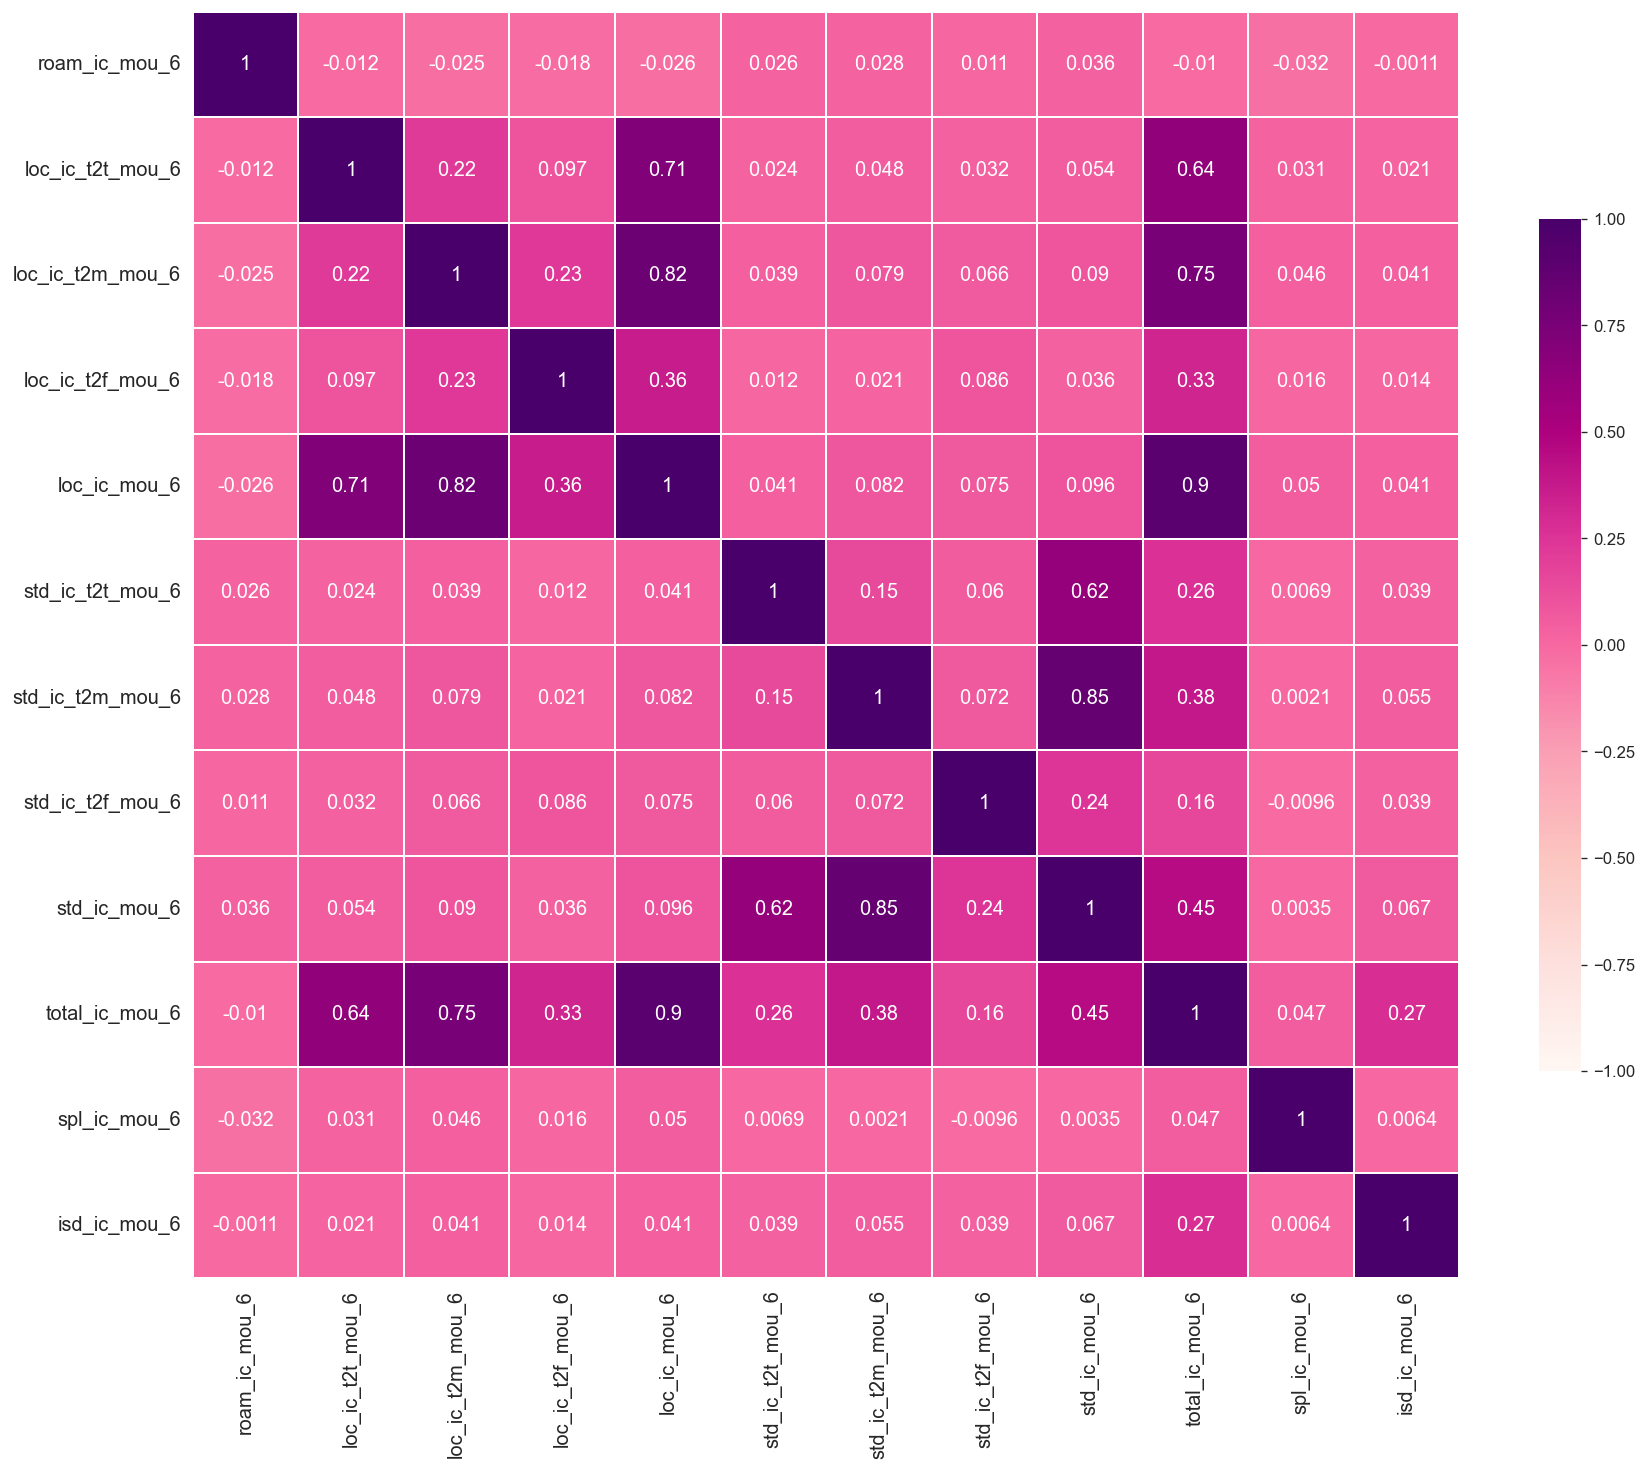

In [59]:
##Let's check the correlation between these variables to see if there is pattern between variables

#Plotting a heatmap to understand the correlation between the independent variables
plt.figure(figsize = (12,10), dpi=120)
corr_matrix_new = telecom_df[ic_mou_features].corr()
f, ax_corr1 = plt.subplots(figsize=(15, 15), dpi=120)
ax_corr1 = sns.heatmap(corr_matrix_new, cmap= 'RdPu', cbar_kws={"shrink": .5}, vmin= -1, vmax=1, center=0,
            square=True, annot=True, linewidths=0.01, annot_kws={"size":12})
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.autoscale()
plt.show()

In [60]:
##Let's check for a record (i.e. index 8: example)

print("'loc_ic_mou_6' = 'loc_ic_t2t_mou_6' + 'loc_ic_t2m_mou_6' + 'loc_ic_t2f_mou_6'")
print(telecom_df.loc[18,'loc_ic_mou_6'],"==",telecom_df.loc[18,['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6']].sum())

print("\n'std_ic_mou_6' = 'std_ic_t2t_mou_6' + 'std_ic_t2m_mou_6' + 'std_ic_t2f_mou_6'")
print(telecom_df.loc[18,'std_ic_mou_6'],"==",telecom_df.loc[18,['std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6']].sum())

print("\n'total_ic_mou_6' = 'loc_ic_mou_6' + 'std_ic_mou_6' + 'isd_ic_mou_6' + 'spl_ic_mou_6'")
print(telecom_df.loc[18,'total_ic_mou_6'],"==",telecom_df.loc[18,['loc_ic_mou_6','std_ic_mou_6','isd_ic_mou_6', 'spl_ic_mou_6']].sum())

'loc_ic_mou_6' = 'loc_ic_t2t_mou_6' + 'loc_ic_t2m_mou_6' + 'loc_ic_t2f_mou_6'
25.48 == 25.47

'std_ic_mou_6' = 'std_ic_t2t_mou_6' + 'std_ic_t2m_mou_6' + 'std_ic_t2f_mou_6'
0.86 == 0.86

'total_ic_mou_6' = 'loc_ic_mou_6' + 'std_ic_mou_6' + 'isd_ic_mou_6' + 'spl_ic_mou_6'
26.71 == 26.6


In [61]:
##Dropping 'loc_ic_mou', 'std_ic_mou' and 'total_ic_mou' for all 3 months
drop_ic_mou_features = list(telecom_df.columns[telecom_df.columns.str.contains('loc_ic_mou_|std_ic_mou_|total_ic_mou_')])
print('List of features dropped:\n', drop_ic_mou_features)

telecom_df.drop(drop_ic_mou_features, axis=1, inplace= True)

List of features dropped:
 ['loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']


In [62]:
##Check for outgoing(og) mou features (just for 6th month)
og_mou_features = list(telecom_df.columns[telecom_df.columns.str.contains('.*_og_.*mou_6')])
og_mou_features

['roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'total_og_mou_6']

<Figure size 1440x1200 with 0 Axes>

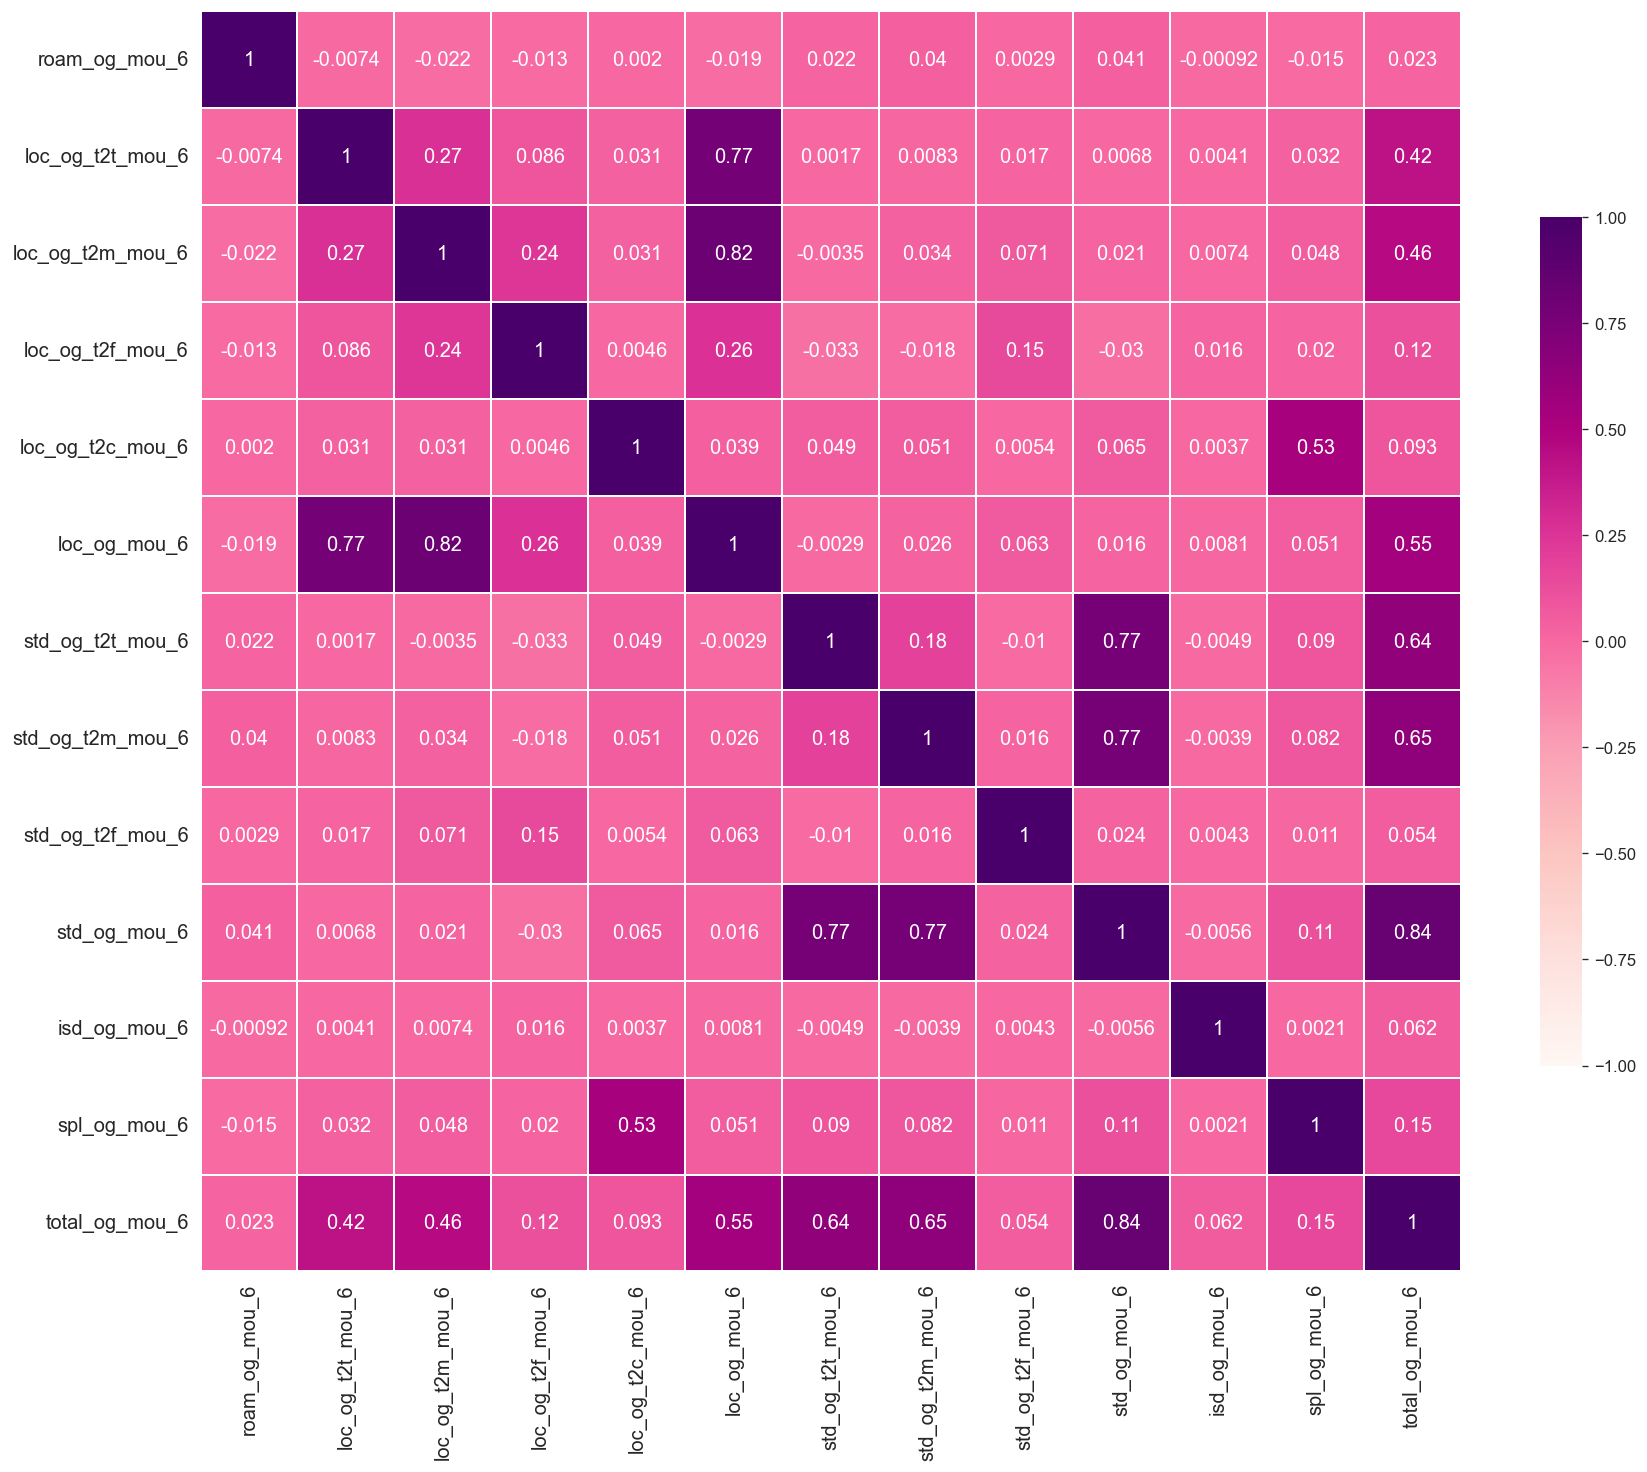

In [63]:
##Let's check the correlation between these variables to see if there is pattern between variables

#Plotting a heatmap to understand the correlation between the independent variables
plt.figure(figsize = (12,10), dpi=120)
corr_matrix_new = telecom_df[og_mou_features].corr()
f, ax_corr1 = plt.subplots(figsize=(15, 15), dpi=120)
ax_corr1 = sns.heatmap(corr_matrix_new, cmap= 'RdPu', cbar_kws={"shrink": .5}, vmin= -1, vmax=1, center=0,
            square=True, annot=True, linewidths=0.01, annot_kws={"size":12})
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.autoscale()
plt.show()

In [64]:
##Let's check for a record (i.e. index 21: example)

print("'loc_og_mou_6' = 'loc_og_t2t_mou_6' + 'loc_og_t2m_mou_6' + 'loc_og_t2f_mou_6'")
print(telecom_df.loc[21,'loc_og_mou_6'],"==",telecom_df.loc[21,['loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6']].sum())

print("\n'std_og_mou_6' = 'std_og_t2t_mou_6' + 'std_og_t2m_mou_6' + 'std_og_t2f_mou_6'")
print(telecom_df.loc[21,'std_og_mou_6'],"==",telecom_df.loc[21,['std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6']].sum())

print("\n'total_og_mou_6' = 'loc_og_mou_6' + 'std_og_mou_6' +  'spl_og_mou_6' + 'isd_og_mou_6'")
print(telecom_df.loc[21,'total_og_mou_6'],"==",telecom_df.loc[21,['loc_og_mou_6','std_og_mou_6','spl_og_mou_6','isd_og_mou_6']].sum())

'loc_og_mou_6' = 'loc_og_t2t_mou_6' + 'loc_og_t2m_mou_6' + 'loc_og_t2f_mou_6'
191.74 == 191.74

'std_og_mou_6' = 'std_og_t2t_mou_6' + 'std_og_t2m_mou_6' + 'std_og_t2f_mou_6'
21.78 == 21.77

'total_og_mou_6' = 'loc_og_mou_6' + 'std_og_mou_6' +  'spl_og_mou_6' + 'isd_og_mou_6'
213.53 == 213.52


In [65]:
##Dropping 'loc_og_mou', 'std_og_mou' and 'total_og_mou' for all 3 months
drop_og_mou_features = list(telecom_df.columns[telecom_df.columns.str.contains('loc_og_mou_|std_og_mou_|total_og_mou_')])
print('List of features dropped:\n', drop_og_mou_features)

telecom_df.drop(drop_og_mou_features, axis=1, inplace= True)

List of features dropped:
 ['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']


In [66]:
offnet_usage_cols = list(telecom_df.columns[telecom_df.columns.str.contains('offnet.*mou')])
offnet_usage_cols

['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8']

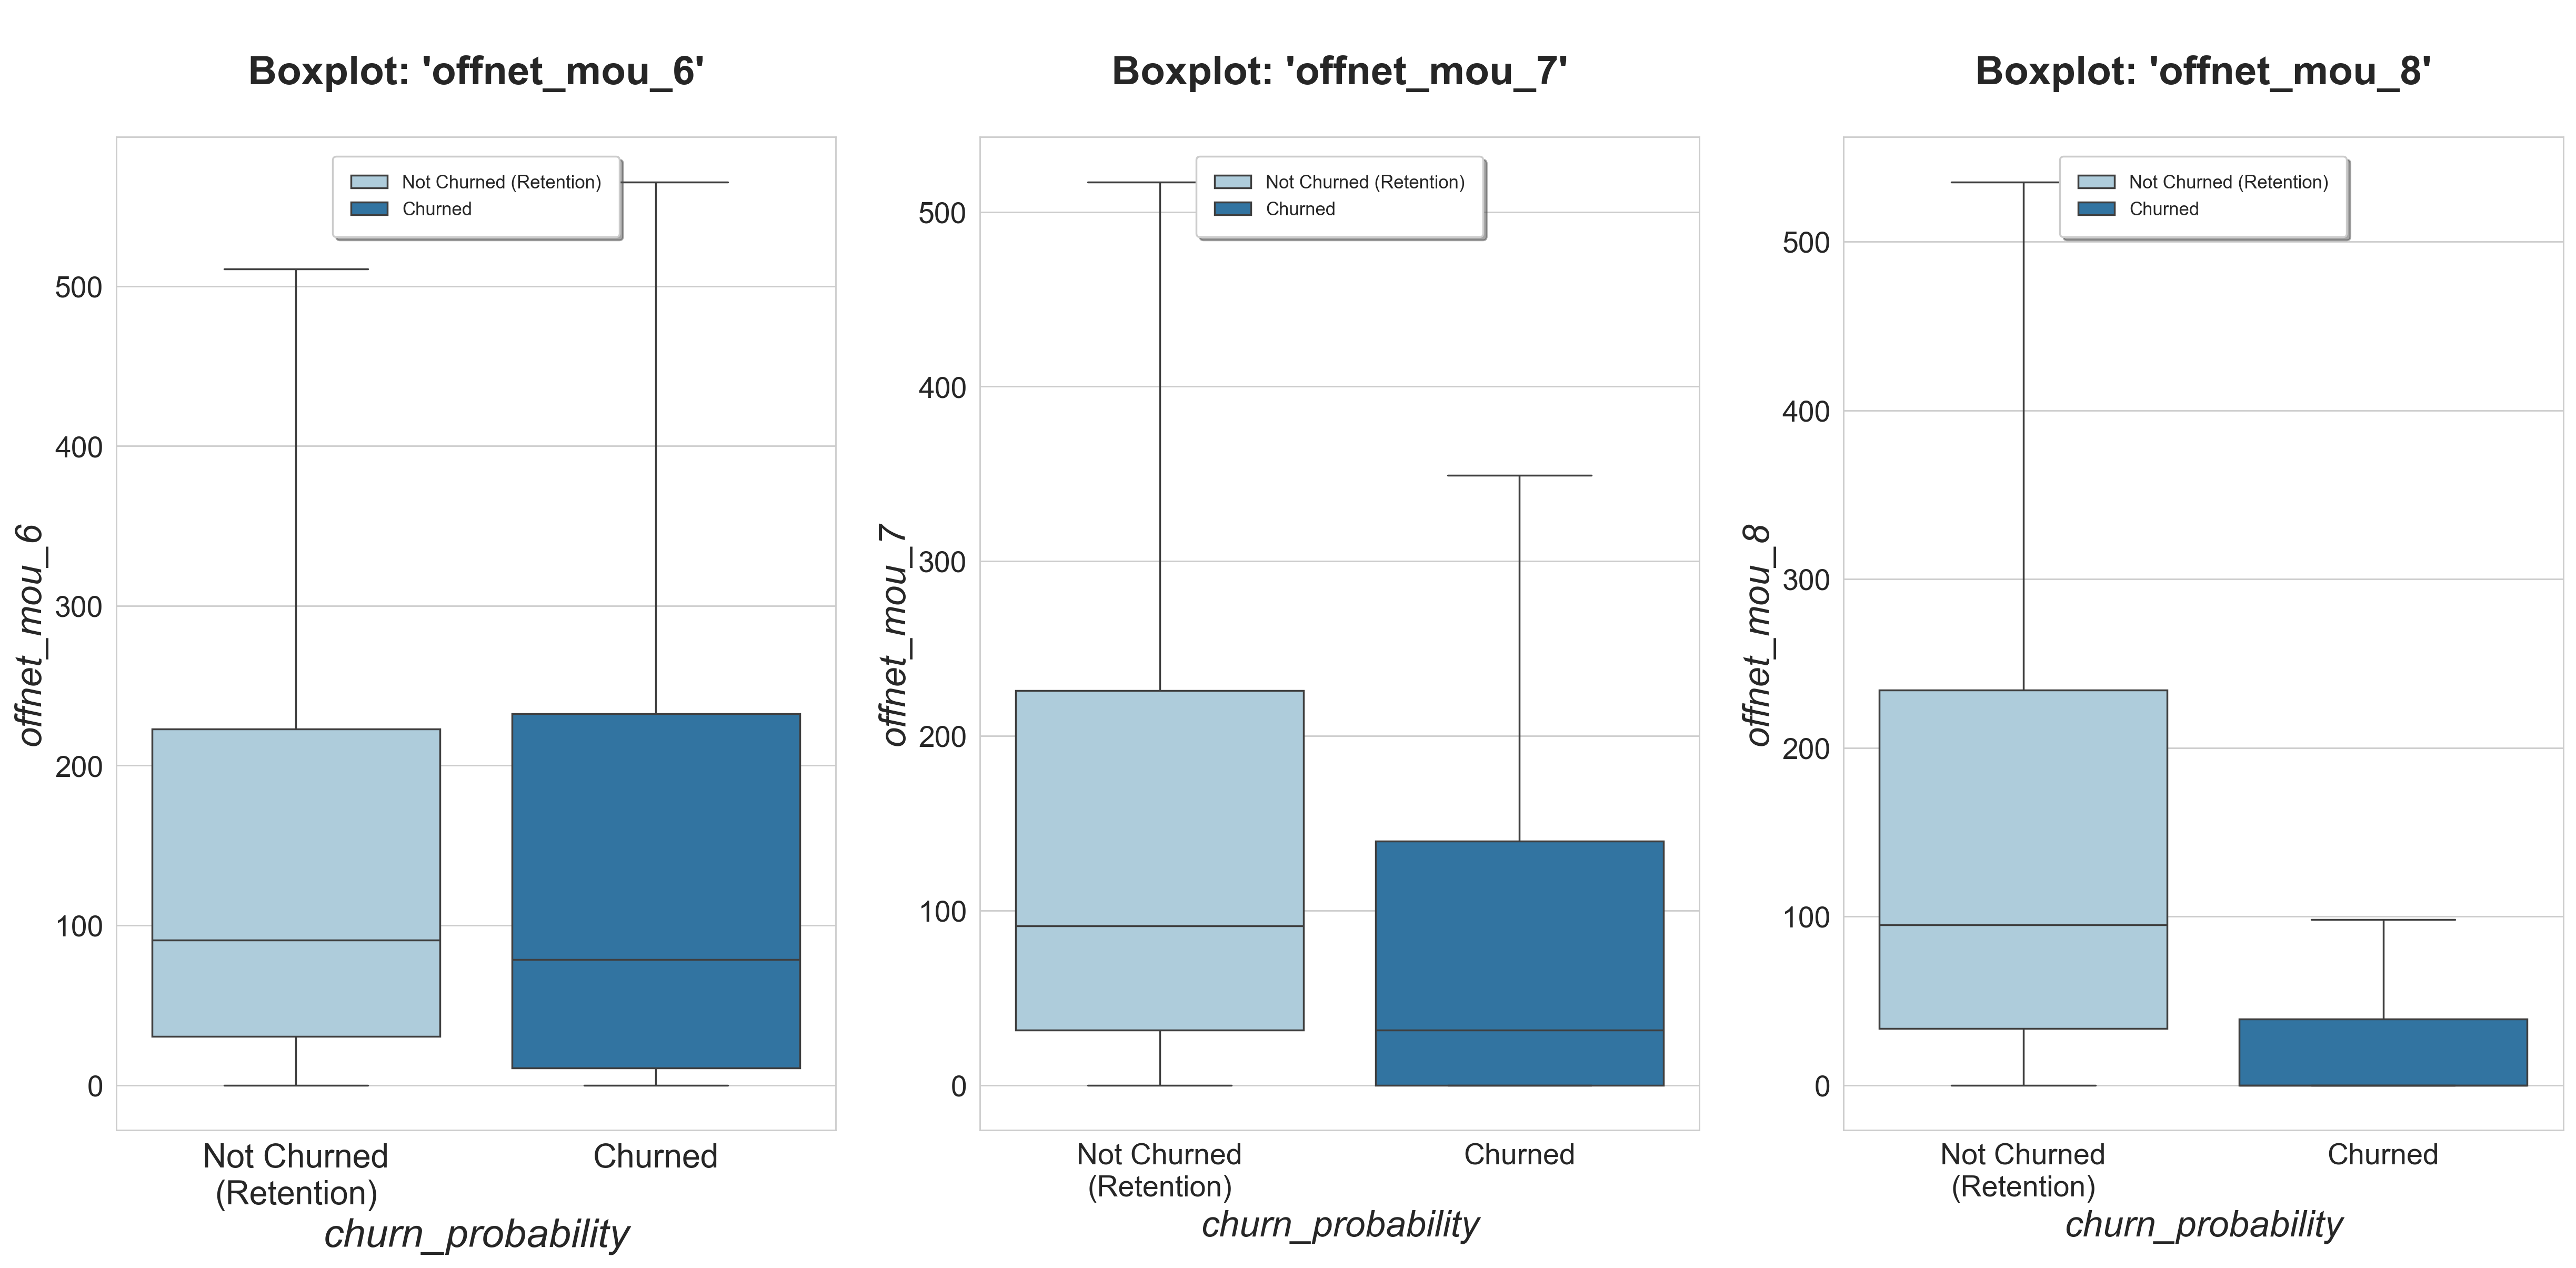

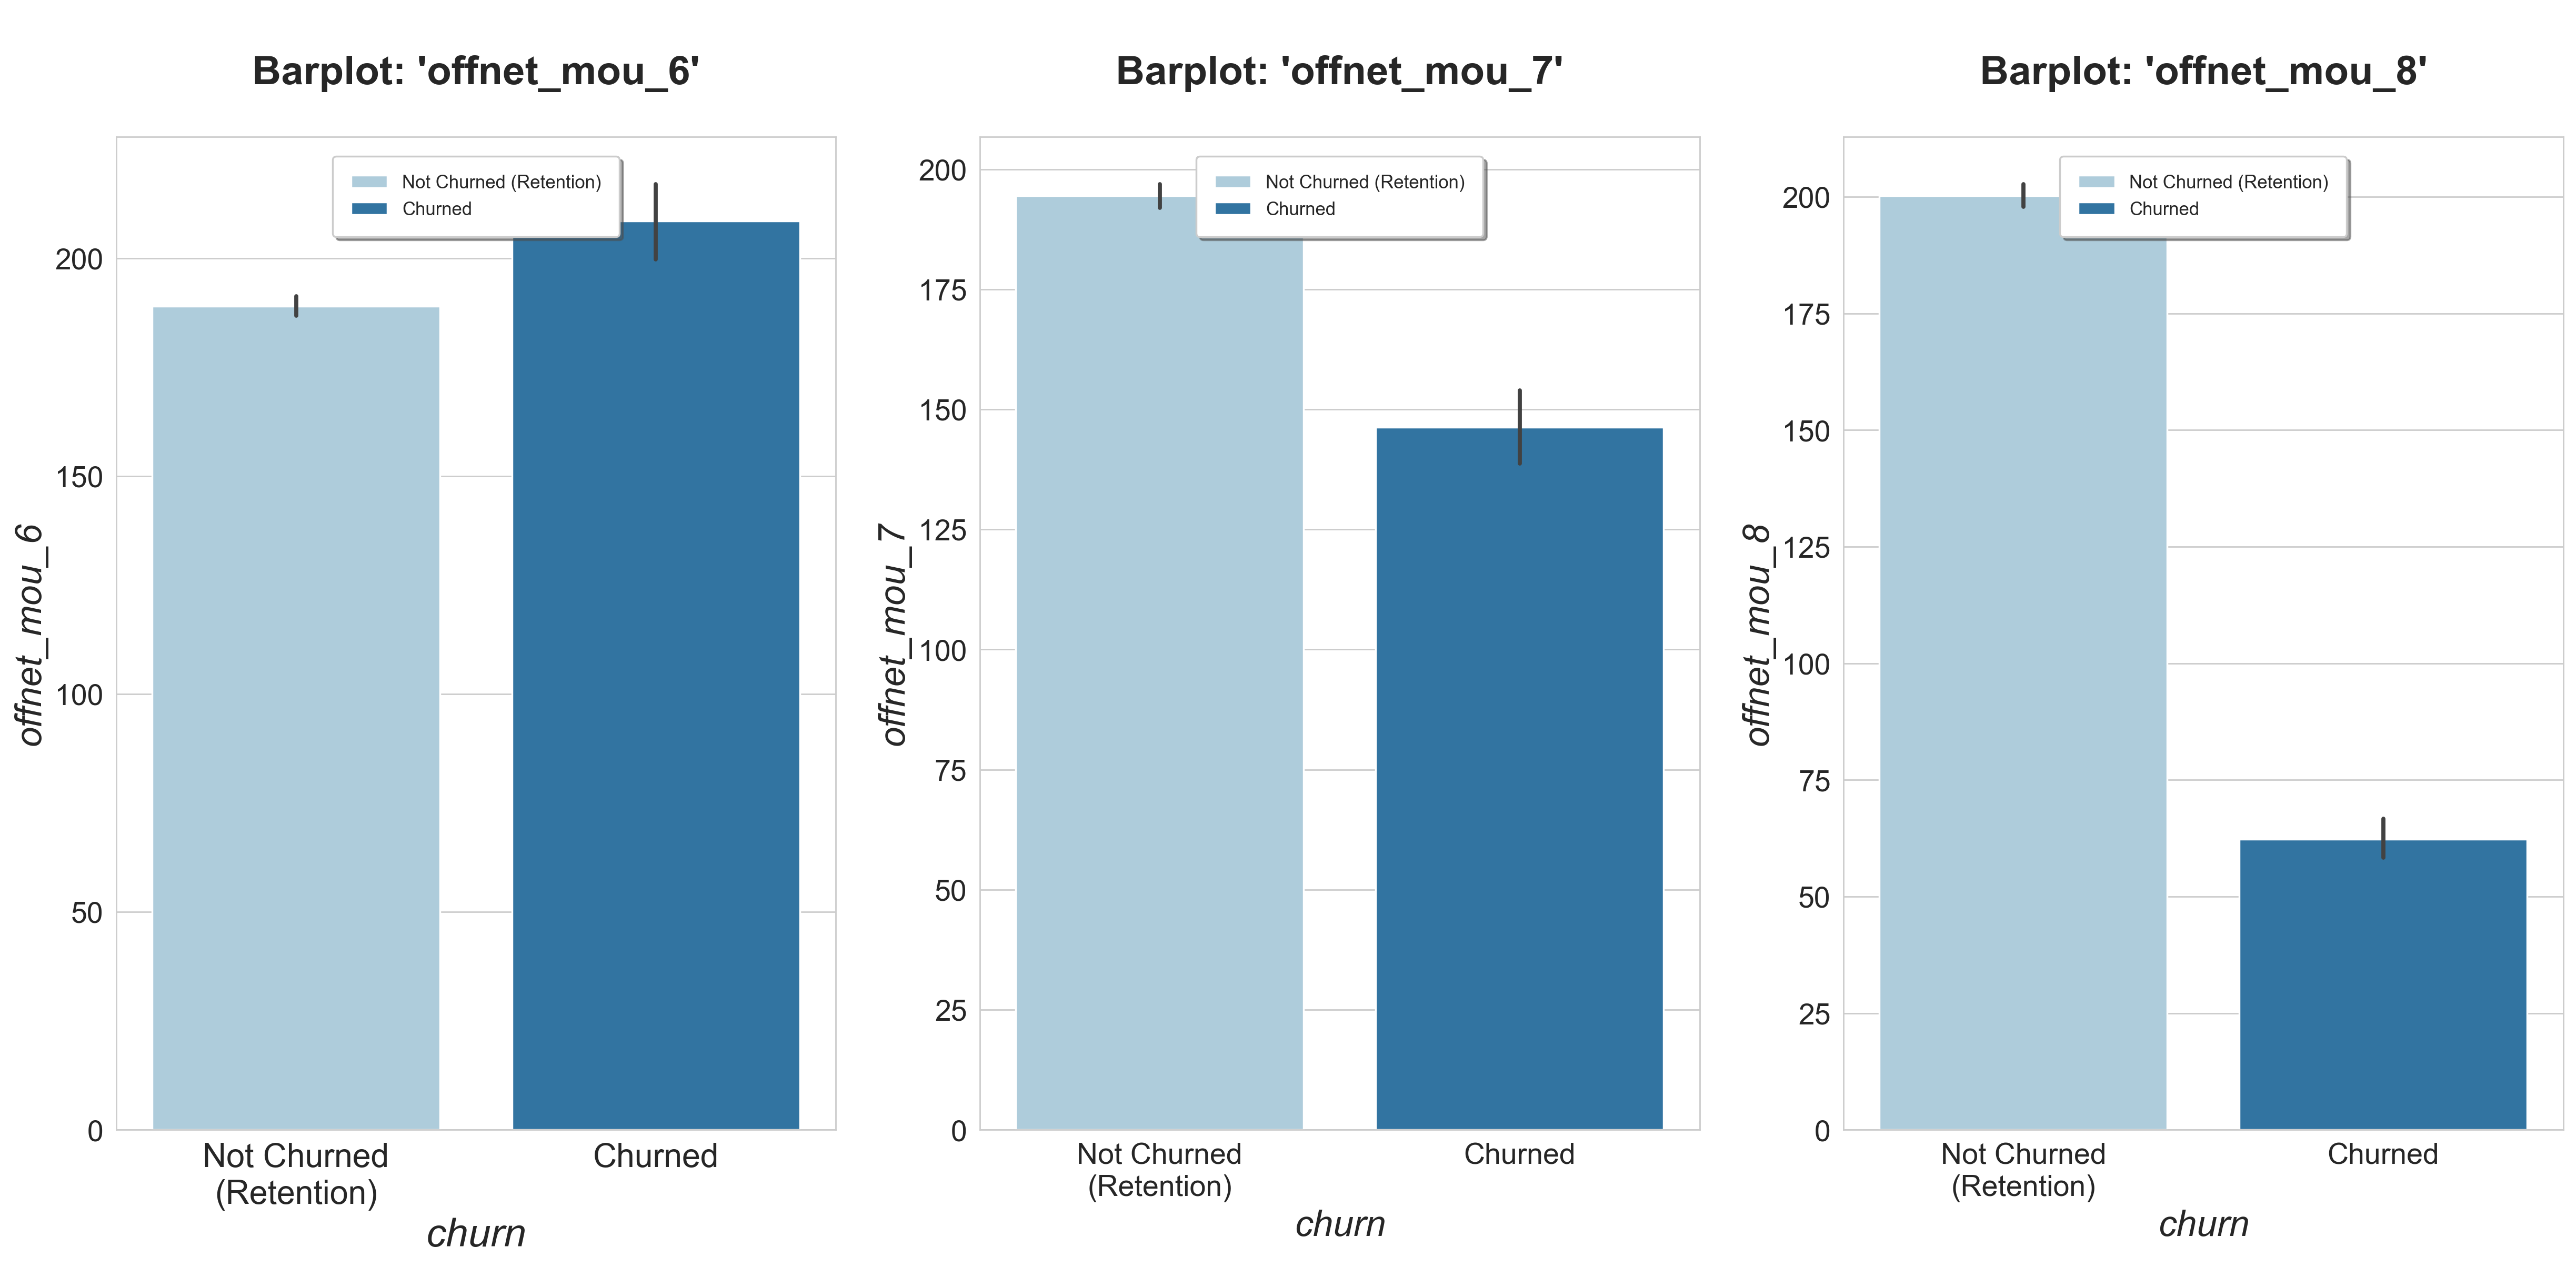

In [67]:
# Plotting 'offnet_mou' boxplots and barplots
plot_boxplots_6_7_8('offnet_mou')  #Suppresses outliers
plot_barplots_6_7_8('offnet_mou')

In [68]:
onnet_usage_cols = list(telecom_df.columns[telecom_df.columns.str.contains('onnet.*mou')])
onnet_usage_cols

['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8']

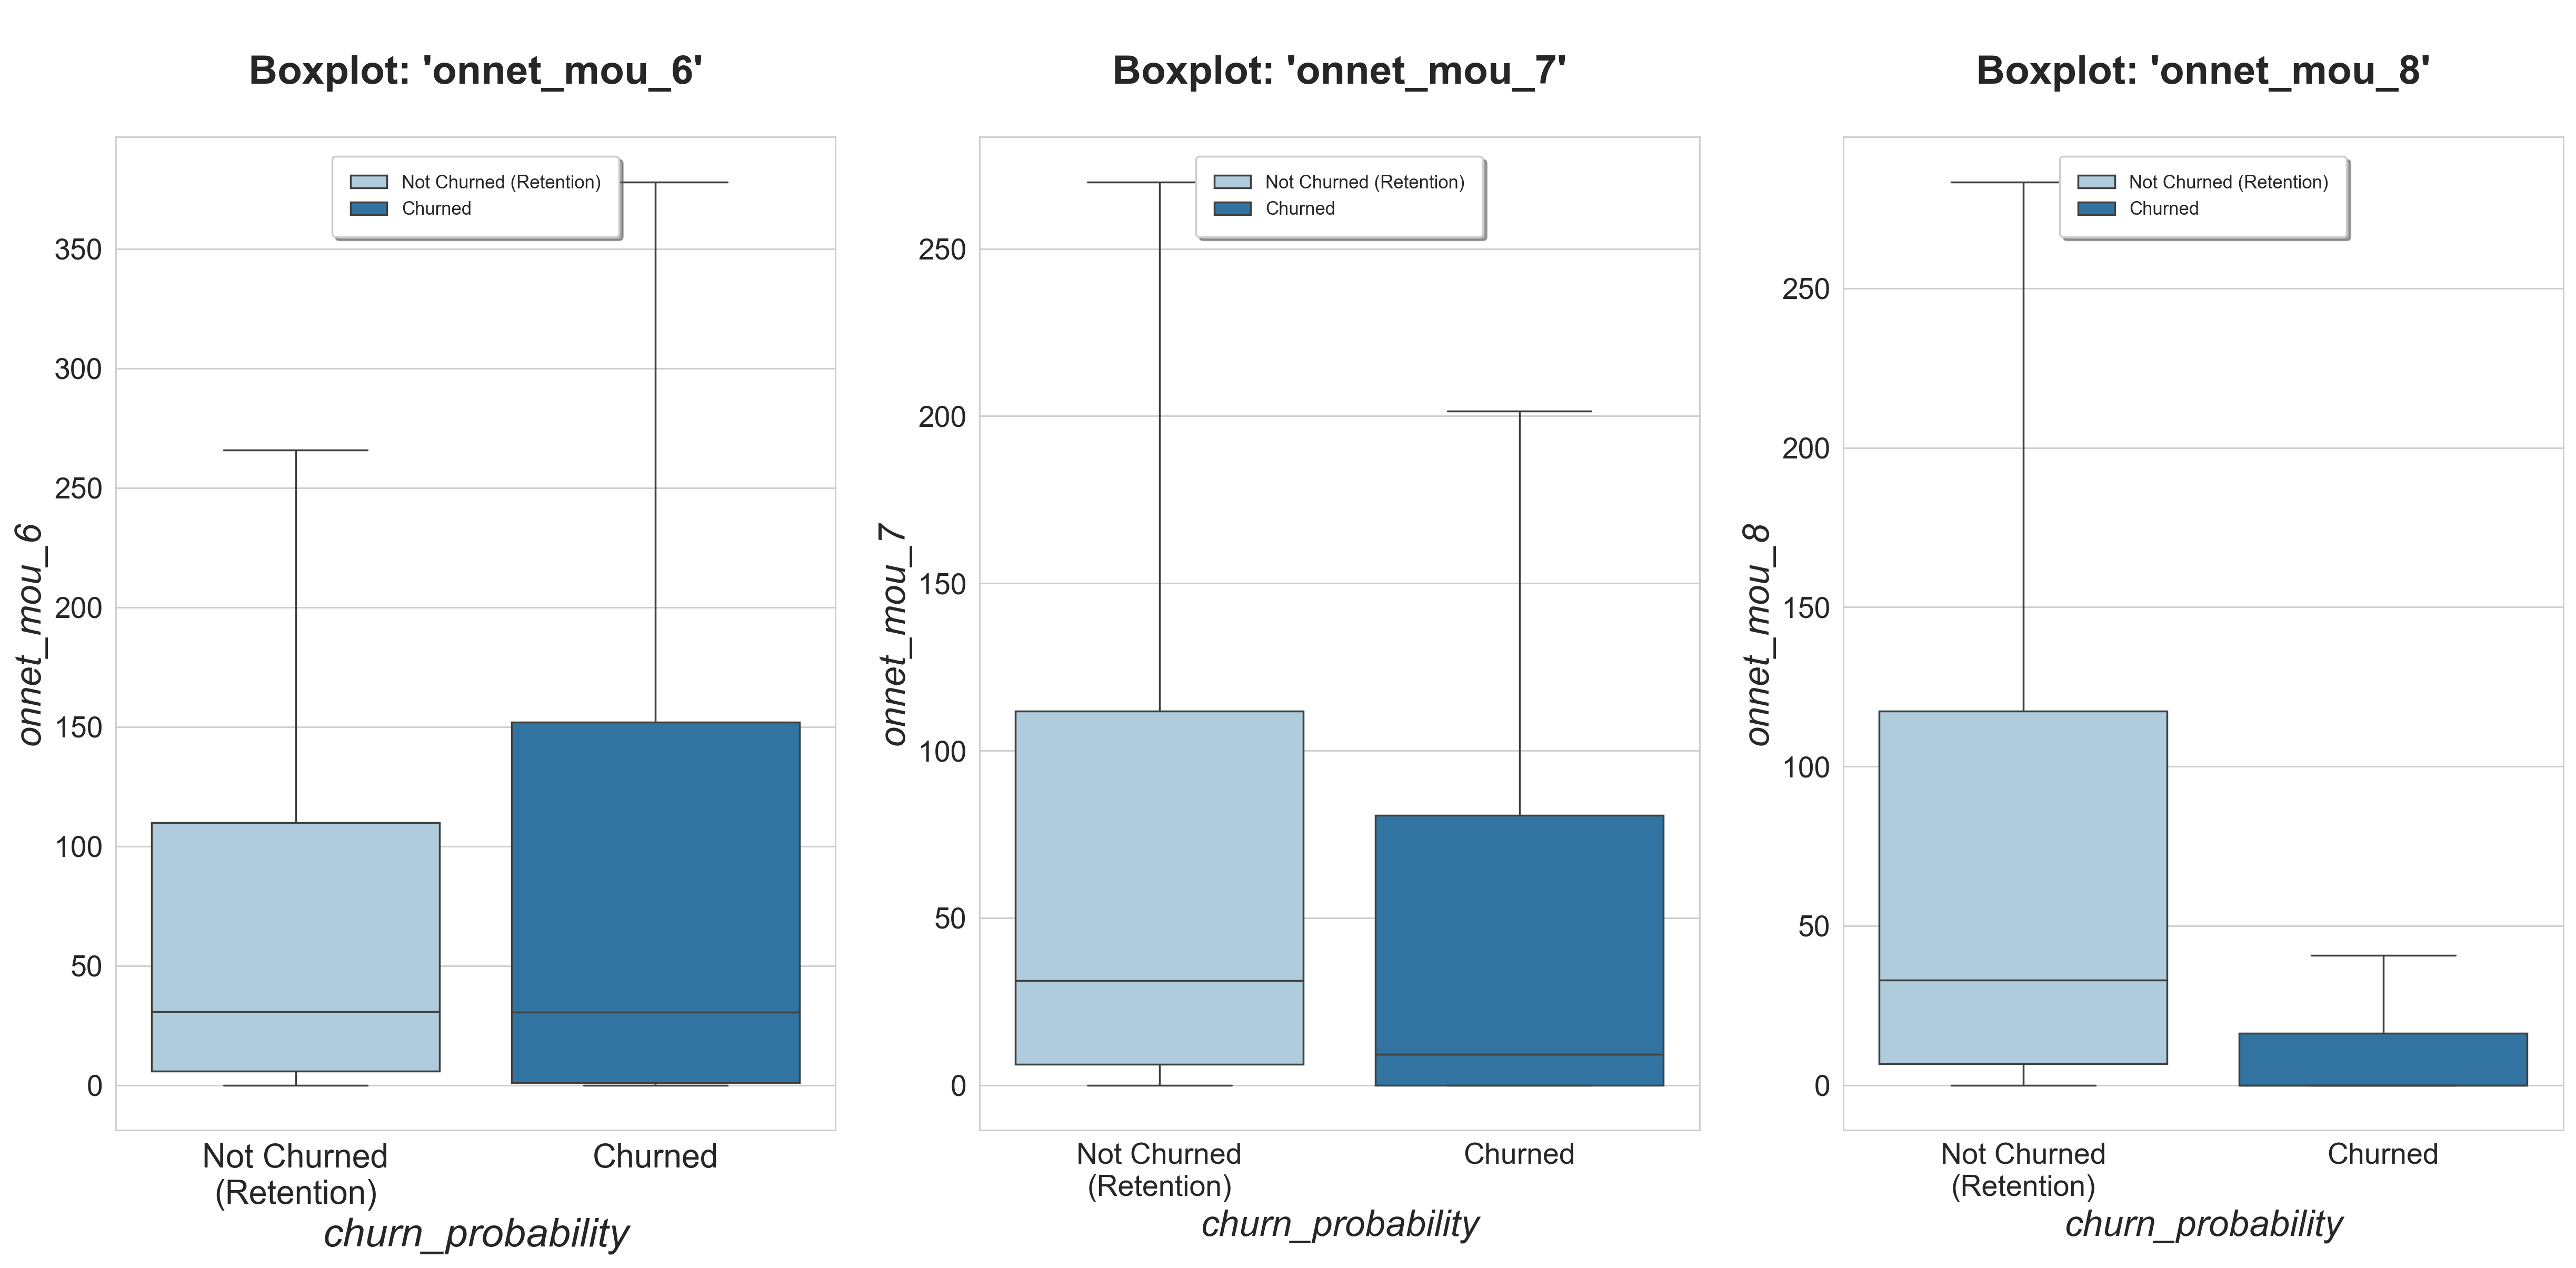

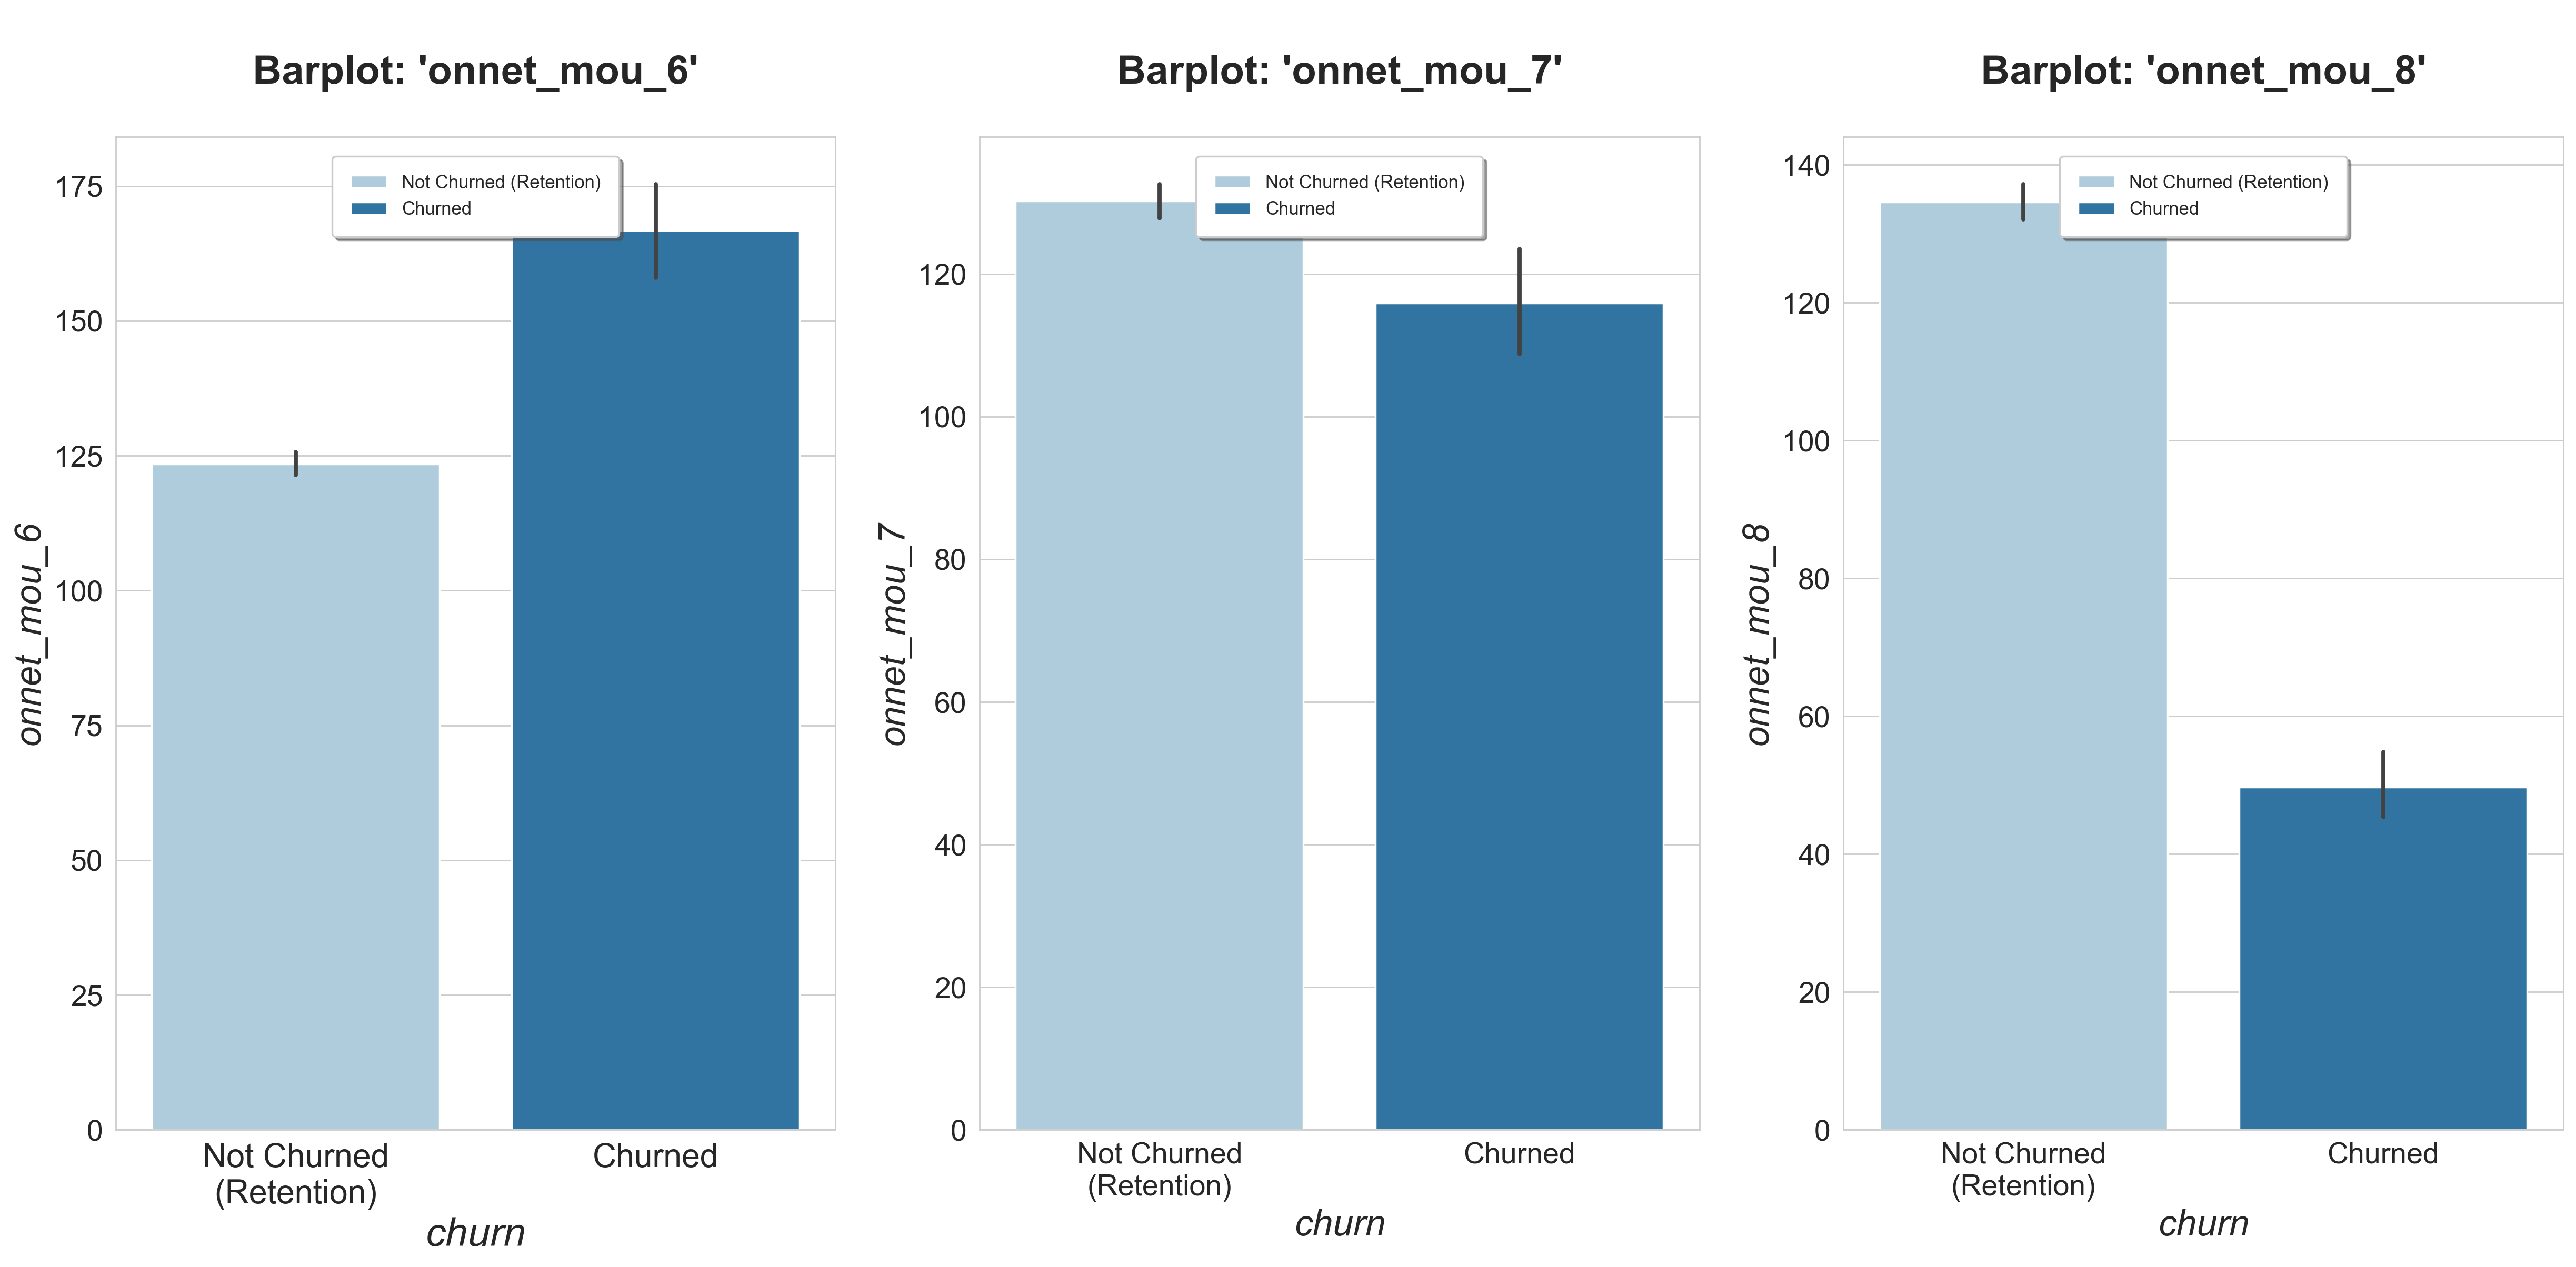

In [69]:
# Plotting 'onnet_mou' boxplots and barplots
plot_boxplots_6_7_8('onnet_mou')  #Suppresses outliers
plot_barplots_6_7_8('onnet_mou')

In [70]:
##Creating  a new column tenure_year to store the number of years the customer has been on network T
telecom_df['tenure_year'] = round(telecom_df['aon']/365, 1)

print(telecom_df.tenure_year.value_counts())
print("Min:",telecom_df.tenure_year.min())
print("Max:",telecom_df.tenure_year.max())

tenure_year
1.3     3334
0.6     2531
0.8     2366
1.0     2316
0.9     2293
        ... 
11.7       2
11.9       1
11.6       1
10.7       1
11.0       1
Name: count, Length: 107, dtype: int64
Min: 0.5
Max: 11.9


In [71]:
##Creating bins
my_bins = [0,1,2,3,5,12]
my_labels_aon= ['0_1_year','1_2_year','2_3_year','3_5_year','5_12_year']
telecom_df['tenure'] = pd.cut(telecom_df['tenure_year'], bins= my_bins, labels= my_labels_aon)

##Dropping 'tenure_year' and 'aon' column as we have already created bins in 'tenure' column
telecom_df.drop(['tenure_year','aon'] , axis=1, inplace= True)

telecom_df.tenure.value_counts()

tenure
1_2_year     18059
5_12_year    17218
0_1_year     13103
3_5_year     11043
2_3_year     10576
Name: count, dtype: int64

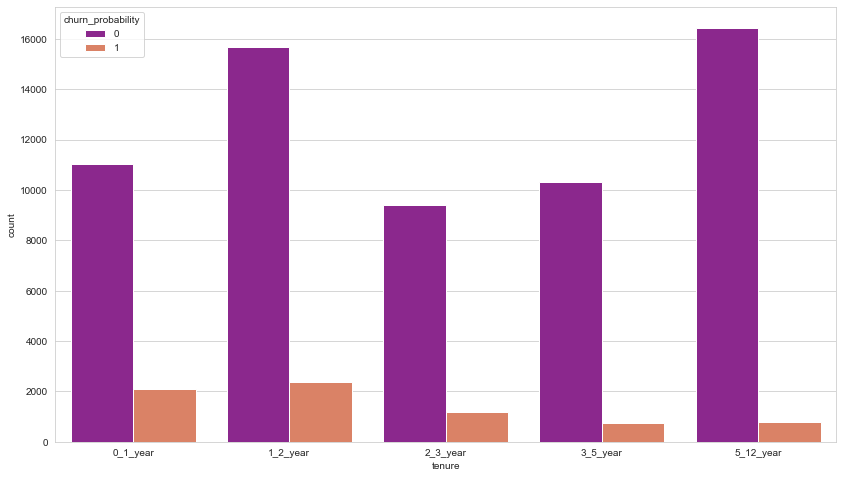

In [72]:
##Visualizing 'age of network' and 'churn'
plt.figure(figsize=(14,8))
tenure_df= telecom_df[['tenure','churn_probability']]
sns.countplot(x = 'tenure', hue = 'churn_probability',data = tenure_df,palette=("plasma"))
plt.show()

In [73]:
##Check for missing values in telecom_hv dataframe (show only missing value columns)
missing_val_cols_prcnt = round(100*telecom_df.isnull().sum()/len(telecom_df.index),2)
missing = pd.DataFrame(missing_val_cols_prcnt[missing_val_cols_prcnt!=0].sort_values(ascending=False))  #Descending order(% NaN)
missing.reset_index(inplace=True)
missing= missing.rename(columns={'index':'features',0:'Null_Percentage'})
missing

features  Null_Percentage
0   night_pck_user_6            74.90
1          fb_user_6            74.90
2   night_pck_user_7            74.48
3          fb_user_7            74.48
4   night_pck_user_8            73.69
5          fb_user_8            73.69
6        og_others_8             5.29
7        ic_others_8             5.29
8        og_others_6             3.95
9        ic_others_6             3.95
10       og_others_7             3.84
11       ic_others_7             3.84

In [74]:
##Dropping 'fb_user_*' and 'night_pck_user_*' features
cols_to_drop = ['fb_user_6', 'fb_user_7', 'fb_user_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8']
telecom_df.drop(cols_to_drop, axis=1, inplace= True)

##Imputing 'ic_others' and 'og_others' with 0 (<=3.91% missing values)
cols_to_impute = telecom_df.columns[telecom_df.columns.str.contains('ic_others|og_others')]
telecom_df[cols_to_impute] = telecom_df[cols_to_impute].replace(np.nan, 0)

In [75]:
##Checking the entire high-value customer dataframe for null (missing) values
null_prcnt_df(telecom_df)

In [76]:
telecom_df.shape

(69999, 120)

In [77]:
##Continuous features
cont_cols_df= [i for i in telecom_df.columns if i not in ['churn_probability', 'tenure']]
cont_cols_df

##Using numpy clip() to cap the values of outliers in between 1 and 99.9 percentiles
import numpy as np
for col in cont_cols_df:
    percentiles = telecom_df[col].quantile([0.01,0.999]).values
    telecom_df[col] = np.clip(telecom_df[col], percentiles[0], percentiles[1])

In [78]:
##Checking categorical column 'tenure'
telecom_df.tenure.head()

0    5_12_year
1     1_2_year
2     2_3_year
3     2_3_year
4     1_2_year
Name: tenure, dtype: category
Categories (5, object): ['0_1_year' < '1_2_year' < '2_3_year' < '3_5_year' < '5_12_year']

In [79]:
#'tenure' is a categorical variable. Converting it into numeric using get_dummies
###Creating dummies for categorical variable 'tenure'
cat_cols= ['tenure']
d_tenure = pd.get_dummies(telecom_df['tenure'], prefix='tenure', drop_first = True)
d_tenure = d_tenure.astype(int)
telecom_df = pd.concat([telecom_df, d_tenure], axis = 1)

##Dropping the 'tenure' column
telecom_df.drop(cat_cols, axis=1, inplace=True)

In [80]:
telecom_df.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  699.98   31.277   87.009    7.527        48.58       124.38         1.29   
1  699.98    0.000  122.787   42.953         0.00         0.00         0.00   
2  699.98   60.806  103.176    0.000         0.53        15.93         0.00   
3  699.98  156.362  205.260  111.095         7.26        16.01         0.00   
4  699.98  240.708  128.191  101.565        21.28         4.83         6.13   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  ...  vbc_3g_7  vbc_3g_6  \
0         32.24         96.68          2.33  ...       0.0       0.0   
1          0.00         25.99         30.89  ...       0.0       0.0   
2         53.99         82.05          0.00  ...       0.0       0.0   
3         68.76         78.48         50.23  ...       0.0       0.0   
4         56.99         38.11          9.63  ...       0.0       0.0   

   churn_probability  total_rech_data_amt_6  total_rech_data_amt_7  \
0                  0                    0.0                    0.0   
1                  0                    0.0                  145.0   
2                  0                    0.0                    0.0   
3                  0                    0.0                    0.0   
4                  0                 1225.0                 1337.0   

   total_rech_data_amt_8  tenure_1_2_year  tenure_2_3_year  tenure_3_5_year  \
0                    0.0                0                0                0   
1                    0.0                1                0                0   
2                    0.0                0                1                0   
3                    0.0                0                1                0   
4                  852.0                1                0                0   

   tenure_5_12_year  
0                 1  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 123 columns]

In [81]:
X = telecom_df.drop(columns=['churn_probability'])
y = telecom_df['churn_probability']

Class Distribution: Counter({0: 62867, 1: 7132})


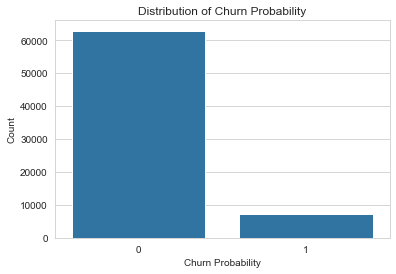

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Check the distribution of the target variable
class_distribution = Counter(y)
print("Class Distribution:", class_distribution)

# Plot the distribution
sns.countplot(x=y)
plt.title("Distribution of Churn Probability")
plt.xlabel("Churn Probability")
plt.ylabel("Count")
plt.show()

In [84]:
from imblearn.over_sampling import SMOTE

In [85]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

Class Distribution: Counter({0: 62867, 1: 7132})


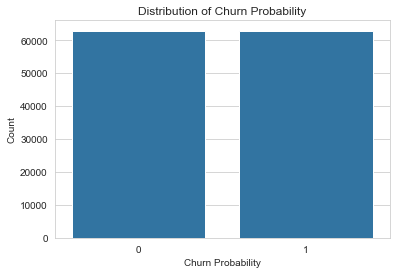

In [86]:
class_distribution = Counter(y)
print("Class Distribution:", class_distribution)

# Plot the distribution
sns.countplot(x=y_resampled)
plt.title("Distribution of Churn Probability")
plt.xlabel("Churn Probability")
plt.ylabel("Count")
plt.show()

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [114]:
from sklearn.preprocessing import StandardScaler

In [119]:
from sklearn.linear_model import LogisticRegression

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [93]:
# Define the Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('pca', PCA()),                # PCA step
    ('rf', RandomForestClassifier())  # Random Forest classifier
])

In [94]:
# Define the hyperparameters grid
param_grid = {
    'pca__n_components': [2, 3, 4],  # Number of PCA components
    'rf__n_estimators': [100, 200, 300],  # Number of trees in the forest
    'rf__max_depth': [None, 10, 20],      # Maximum depth of the tree
    'rf__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'rf__min_samples_leaf': [1, 2, 4]     # Minimum number of samples required to be at a leaf node
}


In [97]:
# Set up the GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=1)

In [98]:
# Fit the model
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=1,
             param_grid={'pca__n_components': [2, 3, 4],
                         'rf__max_depth': [None, 10, 20],
                         'rf__min_samples_leaf': [1, 2, 4],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [99]:
import joblib

In [101]:
# Save the grid search model to a file
joblib.dump(grid_search, 'grid_search_results_2.pkl')

['grid_search_results_2.pkl']

In [104]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score

In [105]:
# Best parameters and model evaluation
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
print("Best Random Forest - Classification Report:\n", classification_report(y_test, y_pred_best_rf))
print("Best Random Forest - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))
print("Best Random Forest - AUC-ROC:", roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1]))
print("Best Random Forest - Best Parameters:", grid_search.best_params_)

Best Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80     19009
           1       0.80      0.80      0.80     18712

    accuracy                           0.80     37721
   macro avg       0.80      0.80      0.80     37721
weighted avg       0.80      0.80      0.80     37721

Best Random Forest - Confusion Matrix:
 [[15298  3711]
 [ 3766 14946]]
Best Random Forest - AUC-ROC: 0.8823347170264366
Best Random Forest - Best Parameters: {'pca__n_components': 4, 'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 300}


In [139]:
print("Columns in X (original):", X.columns)
print("Columns in X_resampled (after preprocessing):", X_resampled.columns)


Columns in X (original): Index(['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       ...
       'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6', 'total_rech_data_amt_6',
       'total_rech_data_amt_7', 'total_rech_data_amt_8', 'tenure_1_2_year',
       'tenure_2_3_year', 'tenure_3_5_year', 'tenure_5_12_year'],
      dtype='object', length=122)
Columns in X_resampled (after preprocessing): Index(['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       ...
       'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6', 'total_rech_data_amt_6',
       'total_rech_data_amt_7', 'total_rech_data_amt_8', 'tenure_1_2_year',
       'tenure_2_3_year', 'tenure_3_5_year', 'tenure_5_12_year'],
      dtype='object', length=122)


In [140]:
test_df = pd.read_csv('test.csv')

# Ensure test data has the same preprocessing steps applied as training data
test_df = test_df.rename(columns= lambda x: x.strip(), inplace=False)

# Apply the same preprocessing steps to test data (as done for train data)
# - Fill missing values (similar strategies as training data)
# - Feature scaling (using the scaler fitted on the training data)
# - Drop unnecessary columns (if any)
# Identify non-numeric columns in the test dataset
non_numeric_columns = test_df.select_dtypes(exclude=[int, float]).columns.tolist()

# Display the non-numeric columns
print("Non-Numeric Columns:", non_numeric_columns)

# Optionally, inspect the first few rows of these columns to understand their content
print(test_df[non_numeric_columns].head())

Non-Numeric Columns: ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']
  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
0           6/21/2014           7/26/2014           8/24/2014   
1           6/19/2014           7/16/2014           8/24/2014   
2           6/29/2014           7/27/2014           8/28/2014   
3           6/25/2014           7/30/2014           8/24/2014   
4           6/29/20

In [141]:
last_day_rech_cols = list(test_df.columns[test_df.columns.str.contains('last_day_rch_amt')])
last_day_rech_cols

['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8']

In [142]:
##Correcting name of 'last_day_rch_amt_*' to 'last_day_rech_amt_*' columns (for months 6,7,and 8)
test_df = test_df.rename(columns= {'last_day_rch_amt_6':'last_day_rech_amt_6', 'last_day_rch_amt_7':'last_day_rech_amt_7',\
                                     'last_day_rch_amt_8':'last_day_rech_amt_8'})
correct_last_day_rech_amt_cols = list(test_df.columns[test_df.columns.str.contains('last_day')])
correct_last_day_rech_amt_cols

['last_day_rech_amt_6', 'last_day_rech_amt_7', 'last_day_rech_amt_8']

In [143]:
# Handling missing values in test data (as done in training)
test_df['av_rech_amt_data_6'] = test_df['av_rech_amt_data_6'].fillna(0)
test_df['av_rech_amt_data_7'] = test_df['av_rech_amt_data_7'].fillna(0)
test_df['av_rech_amt_data_8'] = test_df['av_rech_amt_data_8'].fillna(0)

test_df['total_rech_data_6'] = test_df['total_rech_data_6'].fillna(0)
test_df['total_rech_data_7'] = test_df['total_rech_data_7'].fillna(0)
test_df['total_rech_data_8'] = test_df['total_rech_data_8'].fillna(0)

In [144]:
# Create total recharge amount for data columns if they were generated
test_df['total_rech_data_amt_6'] = test_df['av_rech_amt_data_6'] * test_df['total_rech_data_6']
test_df['total_rech_data_amt_7'] = test_df['av_rech_amt_data_7'] * test_df['total_rech_data_7']
test_df['total_rech_data_amt_8'] = test_df['av_rech_amt_data_8'] * test_df['total_rech_data_8']

In [145]:
test_df= remove_single_val_uniq_col(test_df)

Columns that are dropped are:
['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']

Number of columns dropped:
13


In [146]:
##Since this is not a time-series based analysis, we might also eliminate date columns as they won't be useful for our analysis
date_columns_list= list(test_df.columns[test_df.columns.str.contains('date')])
date_columns_list

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [147]:
##Dropping the date columns
test_df.drop(date_columns_list, axis=1, inplace=True)
test_df.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  69999   91.882   65.330   64.445        31.78        20.23        23.11   
1  70000  414.168  515.568  360.868        75.51        41.21        19.84   
2  70001  329.844  434.884  746.239         7.54         7.86         8.40   
3  70002   43.550  171.390   24.400         5.31         2.16         0.00   
4  70003  306.854  406.289  413.329       450.93       609.03       700.68   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  ...  fb_user_6  fb_user_7  \
0         60.16         32.16         34.83  ...        NaN        NaN   
1        474.34        621.84        394.94  ...        NaN        NaN   
2         16.98         45.81         45.04  ...        NaN        NaN   
3         40.04        205.01         24.01  ...        NaN        NaN   
4         60.94         23.84         74.16  ...        NaN        NaN   

   fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  total_rech_data_amt_6  \
0        NaN  1692        0.00        0.00        0.00                    0.0   
1        NaN  2533        0.00        0.00        0.00                    0.0   
2        NaN   277      525.61      758.41      241.84                    0.0   
3        NaN  1244        0.00        0.00        0.00                    0.0   
4        NaN   462        0.00        0.00        0.00                    0.0   

   total_rech_data_amt_7  total_rech_data_amt_8  
0                    0.0                    0.0  
1                    0.0                    0.0  
2                    0.0                    0.0  
3                    0.0                    0.0  
4                    0.0                    0.0  

[5 rows x 155 columns]

In [148]:
##Imputing 'max_rech_data_*' columns with 0 (*columns: all 3 months - month 6, 7 and 8)
test_df[['max_rech_data_6','max_rech_data_7','max_rech_data_8']] = test_df[['max_rech_data_6','max_rech_data_7',\
                                                                                  'max_rech_data_8']].replace(np.nan, 0)

In [149]:
##Recheck for missing values in 'recharge' plans for calling and data features
all_rech_vars = list(test_df.columns[test_df.columns.str.contains('rech_amt|rech_data_amt|rech_num|max_rech_data')])  ##Excluding 2g_3g
all_rech = test_df[all_rech_vars]
null_prcnt_df(all_rech)

In [150]:
##Dropping 'arpu_2g', 'arpu_3g', 'count_rech_2g' and 'count_rech_3g' based features (revenue_based)
drop_vars = list(test_df.columns[test_df.columns.str.contains('arpu_2g|arpu_3g|count_rech_2g_|count_rech_3g')])
test_df.drop(drop_vars, axis=1, inplace=True)

In [151]:
##Volume Based Cost (vbc) based features
vbc_cols_list = list(test_df.columns[test_df.columns.str.contains('vbc')])
vbc_cols_list

['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g']

In [152]:
##Rename vbc features to the desired format ending with month number
test_df.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8'}, inplace=True)

In [153]:
##Recheck rename Volume Based Cost (vbc) based features
vbc_cols_list = list(test_df.columns[test_df.columns.str.contains('vbc')])
vbc_cols_list

['vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6']

In [154]:
test_df[mou_cols] = test_df[mou_cols].replace(np.nan, 0)

In [155]:
##Reheck for missing value percentages in 'mou_cols'

mou_cols_df = test_df[mou_cols]
null_prcnt_df(mou_cols_df)

In [156]:
##Dropping 'loc_ic_mou', 'std_ic_mou' and 'total_ic_mou' for all 3 months
drop_ic_mou_features = list(test_df.columns[test_df.columns.str.contains('loc_ic_mou_|std_ic_mou_|total_ic_mou_')])
print('List of features dropped:\n', drop_ic_mou_features)

test_df.drop(drop_ic_mou_features, axis=1, inplace= True)

List of features dropped:
 ['loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']


In [157]:
##Dropping 'loc_og_mou', 'std_og_mou' and 'total_og_mou' for all 3 months
drop_og_mou_features = list(test_df.columns[test_df.columns.str.contains('loc_og_mou_|std_og_mou_|total_og_mou_')])
print('List of features dropped:\n', drop_og_mou_features)

test_df.drop(drop_og_mou_features, axis=1, inplace= True)

List of features dropped:
 ['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']


In [158]:
offnet_usage_cols = list(test_df.columns[test_df.columns.str.contains('offnet.*mou')])
offnet_usage_cols

['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8']

In [159]:
##Creating  a new column tenure_year to store the number of years the customer has been on network T
test_df['tenure_year'] = round(test_df['aon']/365, 1)

print(test_df.tenure_year.value_counts())
print("Min:",test_df.tenure_year.min())
print("Max:",test_df.tenure_year.max())

tenure_year
1.3     1418
0.6     1106
0.8     1049
1.0     1017
0.9     1002
        ... 
10.1       8
10.8       6
10.7       2
10.4       1
10.3       1
Name: count, Length: 103, dtype: int64
Min: 0.5
Max: 11.5


In [160]:
##Creating bins
my_bins = [0,1,2,3,5,12]
my_labels_aon= ['0_1_year','1_2_year','2_3_year','3_5_year','5_12_year']
test_df['tenure'] = pd.cut(test_df['tenure_year'], bins= my_bins, labels= my_labels_aon)

##Dropping 'tenure_year' and 'aon' column as we have already created bins in 'tenure' column
test_df.drop(['tenure_year','aon'] , axis=1, inplace= True)

test_df.tenure.value_counts()

tenure
1_2_year     7787
5_12_year    7296
0_1_year     5726
3_5_year     4784
2_3_year     4407
Name: count, dtype: int64

In [161]:
##Check for missing values in telecom_hv dataframe (show only missing value columns)
missing_val_cols_prcnt = round(100*test_df.isnull().sum()/len(test_df.index),2)
missing = pd.DataFrame(missing_val_cols_prcnt[missing_val_cols_prcnt!=0].sort_values(ascending=False))  #Descending order(% NaN)
missing.reset_index(inplace=True)
missing= missing.rename(columns={'index':'features',0:'Null_Percentage'})
missing

features  Null_Percentage
0   night_pck_user_6            74.72
1          fb_user_6            74.72
2   night_pck_user_7            74.31
3          fb_user_7            74.31
4   night_pck_user_8            73.59
5          fb_user_8            73.59
6        og_others_8             5.58
7        ic_others_8             5.58
8        og_others_7             3.91
9        ic_others_7             3.91
10       og_others_6             3.90
11       ic_others_6             3.90

In [162]:
##Dropping 'fb_user_*' and 'night_pck_user_*' features
cols_to_drop = ['fb_user_6', 'fb_user_7', 'fb_user_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8']
test_df.drop(cols_to_drop, axis=1, inplace= True)

In [163]:
##Imputing 'ic_others' and 'og_others' with 0 (<=3.91% missing values)
cols_to_impute = test_df.columns[test_df.columns.str.contains('ic_others|og_others')]
test_df[cols_to_impute] = test_df[cols_to_impute].replace(np.nan, 0)

In [164]:
null_prcnt_df(test_df)

In [165]:
test_df.shape

(30000, 119)

In [166]:
##Checking categorical column 'tenure'
test_df.tenure.head()

0     3_5_year
1    5_12_year
2     0_1_year
3     3_5_year
4     1_2_year
Name: tenure, dtype: category
Categories (5, object): ['0_1_year' < '1_2_year' < '2_3_year' < '3_5_year' < '5_12_year']

In [167]:
#'tenure' is a categorical variable. Converting it into numeric using get_dummies
###Creating dummies for categorical variable 'tenure'
cat_cols= ['tenure']
d_tenure = pd.get_dummies(test_df['tenure'], prefix='tenure', drop_first = True)
d_tenure = d_tenure.astype(int)
test_df = pd.concat([test_df, d_tenure], axis = 1)

##Dropping the 'tenure' column
test_df.drop(cat_cols, axis=1, inplace=True)

In [168]:
test_df.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  69999   91.882   65.330   64.445        31.78        20.23        23.11   
1  70000  414.168  515.568  360.868        75.51        41.21        19.84   
2  70001  329.844  434.884  746.239         7.54         7.86         8.40   
3  70002   43.550  171.390   24.400         5.31         2.16         0.00   
4  70003  306.854  406.289  413.329       450.93       609.03       700.68   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  ...  vbc_3g_8  vbc_3g_7  \
0         60.16         32.16         34.83  ...      0.00      0.00   
1        474.34        621.84        394.94  ...      0.00      0.00   
2         16.98         45.81         45.04  ...    525.61    758.41   
3         40.04        205.01         24.01  ...      0.00      0.00   
4         60.94         23.84         74.16  ...      0.00      0.00   

   vbc_3g_6  total_rech_data_amt_6  total_rech_data_amt_7  \
0      0.00                    0.0                    0.0   
1      0.00                    0.0                    0.0   
2    241.84                    0.0                    0.0   
3      0.00                    0.0                    0.0   
4      0.00                    0.0                    0.0   

   total_rech_data_amt_8  tenure_1_2_year  tenure_2_3_year  tenure_3_5_year  \
0                    0.0                0                0                1   
1                    0.0                0                0                0   
2                    0.0                0                0                0   
3                    0.0                0                0                1   
4                    0.0                1                0                0   

   tenure_5_12_year  
0                 0  
1                 1  
2                 0  
3                 0  
4                 0  

[5 rows x 122 columns]

In [172]:
# Proceed with scaling and prediction
X_test_unseen_scaled = scaler.transform(test_df)
churn_probabilities = best_rf_model.predict_proba(X_test_unseen_scaled)[:, 1]

# Convert probabilities to binary classifications with a threshold of 0.5
churn_probabilities = (churn_probabilities >= 0.5).astype(int)

solution_df = pd.DataFrame({
    'id': test_df['id'],
    'churn_probability': churn_probabilities
})

solution_df.to_csv('solution.csv', index=False)